In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d47V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d29V0.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 21s 575us/step - loss: 2.3831 - acc: 0.2890 - val_loss: 4.3224 - val_acc: 0.5197

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 4.322366635883526, 'val_acc': 0.5197472338176765, 'loss': 2.383129414168915, 'acc': 0.2890287161433921, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

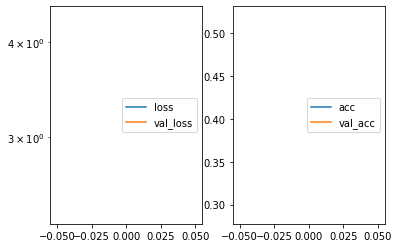

Predicted cell: Normal Probability: [[0.98585874]]
True Cell type: MatureP1
X [[0.6052911]]
True positional value X 0.3148148148148148
Y [[0.47623348]]
True positional value Y 0.3148148148148148
H [[0.33943626]]
True positional value H 0.4074074074074074
W [[0.3316651]]
True positional value W 0.3888888888888889


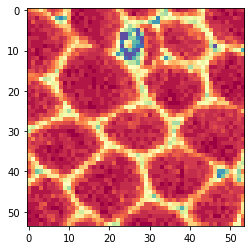

Epoch 2/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.8735 - acc: 0.8682 - val_loss: 0.8026 - val_acc: 0.9089

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.802574174601257, 'val_acc': 0.9088994281551849, 'loss': 0.8734580591719171, 'acc': 0.868222641586689, 'lr': 1e-04}


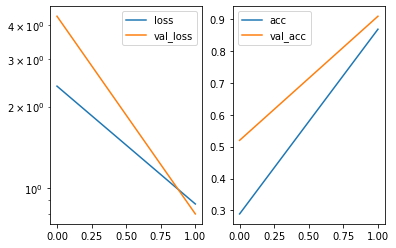

Predicted cell: MatureP1 Probability: [[0.8173413]]
True Cell type: MacroCheate
X [[0.48902732]]
True positional value X 0.5
Y [[0.692823]]
True positional value Y 0.6851851851851862
H [[0.33205485]]
True positional value H 0.37037037037037035
W [[0.33889982]]
True positional value W 0.42592592592592593


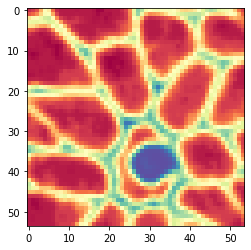

Epoch 3/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.6895 - acc: 0.9336 - val_loss: 0.6936 - val_acc: 0.9431

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.6935638626542073, 'val_acc': 0.9431279629955422, 'loss': 0.6894773372407366, 'acc': 0.933640093982636, 'lr': 1e-04}


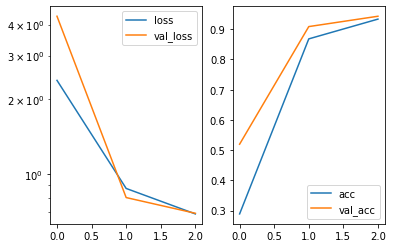

Predicted cell: NonMatureP1 Probability: [[0.95766026]]
True Cell type: NonMatureP1
X [[0.521694]]
True positional value X 0.5
Y [[0.4352629]]
True positional value Y 0.3148148148148148
H [[0.33231083]]
True positional value H 0.37037037037037035
W [[0.2855998]]
True positional value W 0.35185185185185186


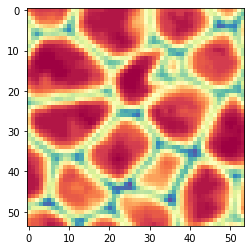

Epoch 4/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.6169 - acc: 0.9532 - val_loss: 0.6359 - val_acc: 0.9563

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.6359466814002971, 'val_acc': 0.9562927886584736, 'loss': 0.6169275675113112, 'acc': 0.9531821719438832, 'lr': 1e-04}


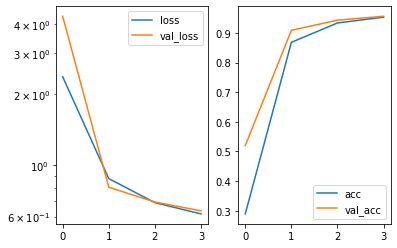

Predicted cell: NonMatureP1 Probability: [[0.96208483]]
True Cell type: NonMatureP1
X [[0.50262547]]
True positional value X 0.5
Y [[0.5378528]]
True positional value Y 0.5
H [[0.39473876]]
True positional value H 0.42592592592592593
W [[0.31139165]]
True positional value W 0.37037037037037035


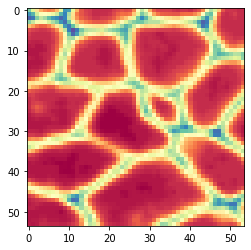

Epoch 5/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.5696 - acc: 0.9662 - val_loss: 0.5900 - val_acc: 0.9637

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5899924150324295, 'val_acc': 0.9636650943580334, 'loss': 0.5695873750017466, 'acc': 0.9662102284406608, 'lr': 1e-04}


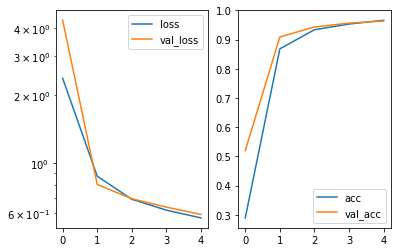

Predicted cell: MatureP1 Probability: [[0.991165]]
True Cell type: MatureP1
X [[0.64851445]]
True positional value X 0.6851851851851852
Y [[0.47229084]]
True positional value Y 0.5
H [[0.28553313]]
True positional value H 0.35185185185185186
W [[0.27759913]]
True positional value W 0.2777777777777778


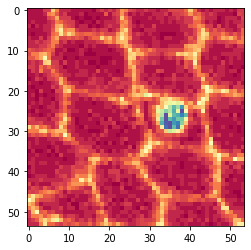

Epoch 6/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.5316 - acc: 0.9724 - val_loss: 0.5907 - val_acc: 0.9616

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5907088018455525, 'val_acc': 0.9615587266637753, 'loss': 0.5316418506761046, 'acc': 0.9723916259239143, 'lr': 1e-04}


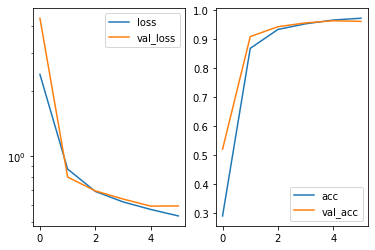

Predicted cell: Normal Probability: [[0.9986216]]
True Cell type: Normal
X [[0.5274217]]
True positional value X 0.5
Y [[0.45034277]]
True positional value Y 0.5
H [[0.5068332]]
True positional value H 0.5370370370370371
W [[0.49342996]]
True positional value W 0.4444444444444444


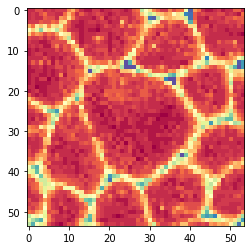

Epoch 7/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.5078 - acc: 0.9768 - val_loss: 0.5740 - val_acc: 0.9721

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5739649996247776, 'val_acc': 0.9720905849091187, 'loss': 0.5077915443643417, 'acc': 0.9768267105511015, 'lr': 1e-04}


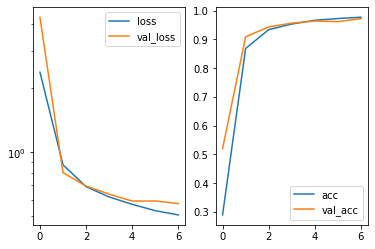

Predicted cell: Normal Probability: [[0.99971145]]
True Cell type: Normal
X [[0.4975634]]
True positional value X 0.5
Y [[0.50988615]]
True positional value Y 0.5
H [[0.20286433]]
True positional value H 0.2222222222222222
W [[0.22079258]]
True positional value W 0.25925925925925924


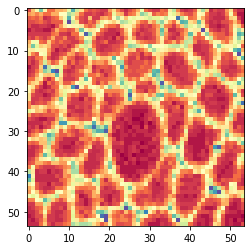

Epoch 8/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.4864 - acc: 0.9805 - val_loss: 0.5623 - val_acc: 0.9658

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5623165333566068, 'val_acc': 0.9657714661954264, 'loss': 0.48636695796468726, 'acc': 0.980485652599119, 'lr': 1e-04}


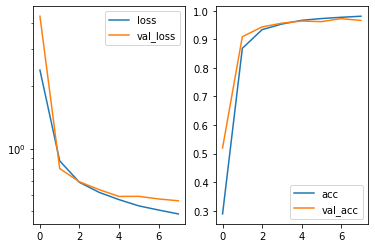

Predicted cell: MacroCheate Probability: [[0.99999654]]
True Cell type: MacroCheate
X [[0.71336925]]
True positional value X 0.6851851851851852
Y [[0.70409656]]
True positional value Y 0.6851851851851852
H [[0.78786325]]
True positional value H 0.8333333333333334
W [[0.81554556]]
True positional value W 0.8148148148148148


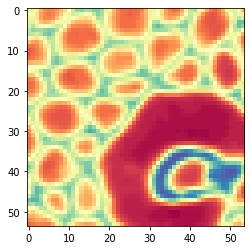

Epoch 9/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.4632 - acc: 0.9844 - val_loss: 0.5400 - val_acc: 0.9710

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5399756205904289, 'val_acc': 0.9710373948158999, 'loss': 0.46319289868469316, 'acc': 0.9844217858196613, 'lr': 1e-04}


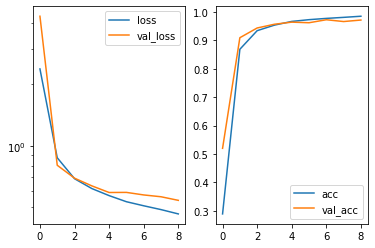

Predicted cell: MatureP1 Probability: [[0.9999436]]
True Cell type: MatureP1
X [[0.6916311]]
True positional value X 0.6851851851851852
Y [[0.6598984]]
True positional value Y 0.6851851851851852
H [[0.25188416]]
True positional value H 0.25925925925925924
W [[0.2514708]]
True positional value W 0.25925925925925924


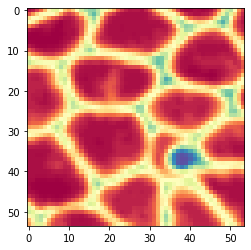

Epoch 10/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.4415 - acc: 0.9881 - val_loss: 0.5367 - val_acc: 0.9742

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5366941196407501, 'val_acc': 0.9741969578136828, 'loss': 0.44149670605913793, 'acc': 0.9880530080003291, 'lr': 1e-04}


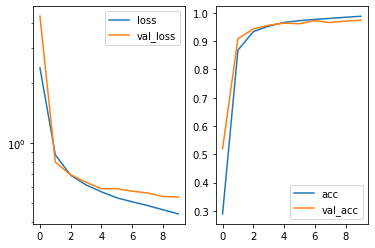

Predicted cell: MatureP1 Probability: [[0.9752206]]
True Cell type: MatureP1
X [[0.3244467]]
True positional value X 0.3148148148148148
Y [[0.3108367]]
True positional value Y 0.3148148148148148
H [[0.40339428]]
True positional value H 0.46296296296296297
W [[0.38447148]]
True positional value W 0.35185185185185186


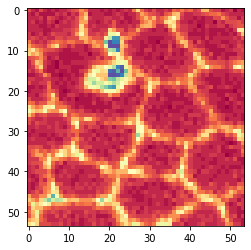

Epoch 11/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.4266 - acc: 0.9904 - val_loss: 0.5870 - val_acc: 0.9710

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5869836521311896, 'val_acc': 0.9710373948158999, 'loss': 0.4266285948775034, 'acc': 0.9904368639402055, 'lr': 1e-04}


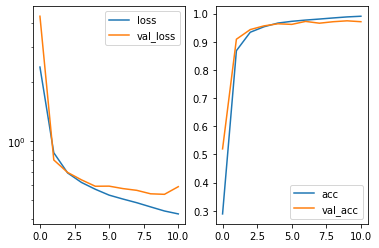

Predicted cell: NonMatureP1 Probability: [[0.9968393]]
True Cell type: NonMatureP1
X [[0.5967562]]
True positional value X 0.6851851851851852
Y [[0.37290967]]
True positional value Y 0.3148148148148148
H [[0.27841568]]
True positional value H 0.3333333333333333
W [[0.2584653]]
True positional value W 0.2777777777777778


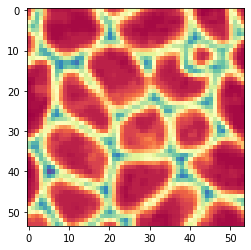

Epoch 12/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.4112 - acc: 0.9924 - val_loss: 0.5197 - val_acc: 0.9774

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5196820875416936, 'val_acc': 0.9773565114266374, 'loss': 0.41122832898951406, 'acc': 0.9923772101511196, 'lr': 1e-04}


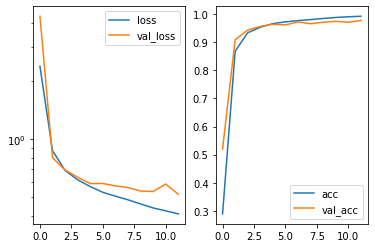

Predicted cell: Normal Probability: [[0.9999895]]
True Cell type: Normal
X [[0.4321267]]
True positional value X 0.5
Y [[0.46733412]]
True positional value Y 0.5
H [[0.44176182]]
True positional value H 0.3888888888888889
W [[0.42565042]]
True positional value W 0.3148148148148148


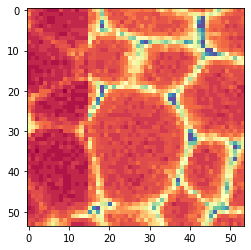

Epoch 13/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.3989 - acc: 0.9940 - val_loss: 0.5206 - val_acc: 0.9816

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5206428632226475, 'val_acc': 0.9815692509582885, 'loss': 0.3988659069931736, 'acc': 0.9939849262478637, 'lr': 1e-04}


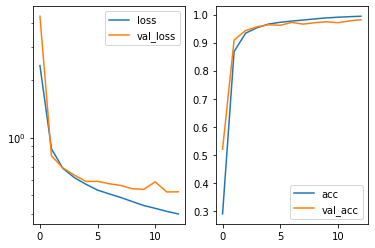

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.66888314]]
True positional value X 0.6851851851851852
Y [[0.33170384]]
True positional value Y 0.3148148148148148
H [[0.4587265]]
True positional value H 0.18518518518518517
W [[0.74333435]]
True positional value W 0.18518518518518517


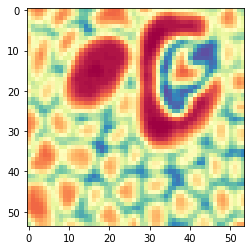

Epoch 14/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.3881 - acc: 0.9948 - val_loss: 0.5264 - val_acc: 0.9716

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5264199515780127, 'val_acc': 0.9715639914318785, 'loss': 0.3880740375347763, 'acc': 0.9947887838369252, 'lr': 1e-04}


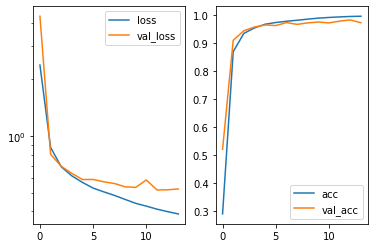

Predicted cell: MatureP1 Probability: [[0.92956024]]
True Cell type: MatureP1
X [[0.6471748]]
True positional value X 0.6851851851851852
Y [[0.29362732]]
True positional value Y 0.3148148148148148
H [[0.4220863]]
True positional value H 0.4074074074074074
W [[0.4123353]]
True positional value W 0.37037037037037035


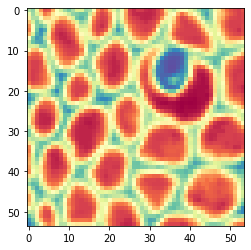

Epoch 15/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.3778 - acc: 0.9963 - val_loss: 0.5069 - val_acc: 0.9821

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5069164053084286, 'val_acc': 0.982095849677222, 'loss': 0.37775196583285037, 'acc': 0.996257903557657, 'lr': 1e-04}


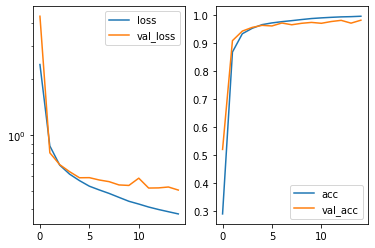

Predicted cell: MatureP1 Probability: [[0.9999596]]
True Cell type: MatureP1
X [[0.51113373]]
True positional value X 0.5
Y [[0.3225475]]
True positional value Y 0.3148148148148148
H [[0.2968036]]
True positional value H 0.3148148148148148
W [[0.30750024]]
True positional value W 0.2962962962962963


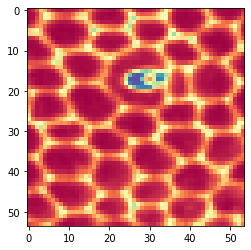

Epoch 16/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.3687 - acc: 0.9962 - val_loss: 0.5435 - val_acc: 0.9647

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5434887105380315, 'val_acc': 0.9647182823796847, 'loss': 0.36868046553400063, 'acc': 0.9962024650918445, 'lr': 1e-04}


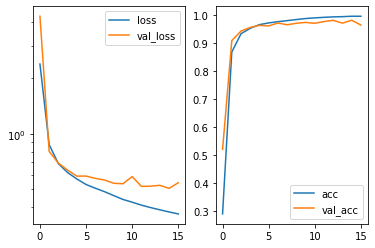

Predicted cell: MacroCheate Probability: [[0.9950948]]
True Cell type: MacroCheate
X [[0.69465333]]
True positional value X 0.6851851851851852
Y [[0.29889098]]
True positional value Y 0.3148148148148148
H [[0.6858444]]
True positional value H 0.6851851851851852
W [[0.60354173]]
True positional value W 0.5370370370370371


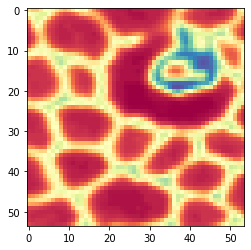

Epoch 17/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.3606 - acc: 0.9970 - val_loss: 0.4980 - val_acc: 0.9789

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.498046107233167, 'val_acc': 0.9789362918897451, 'loss': 0.3605948052519718, 'acc': 0.9970063228461256, 'lr': 1e-04}


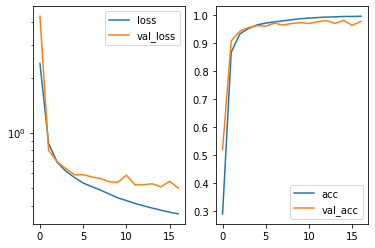

Predicted cell: MacroCheate Probability: [[0.9998568]]
True Cell type: MacroCheate
X [[0.6539926]]
True positional value X 0.6851851851851852
Y [[0.32145587]]
True positional value Y 0.3148148148148148
H [[0.76116]]
True positional value H 0.6111111111111112
W [[0.8587506]]
True positional value W 0.6851851851851852


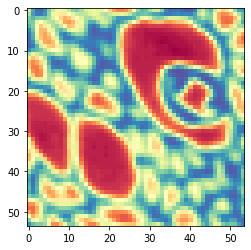

Epoch 18/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.3514 - acc: 0.9979 - val_loss: 0.4975 - val_acc: 0.9826

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4974983565866351, 'val_acc': 0.9826224389799398, 'loss': 0.35143865056584583, 'acc': 0.9979487767649379, 'lr': 1e-04}


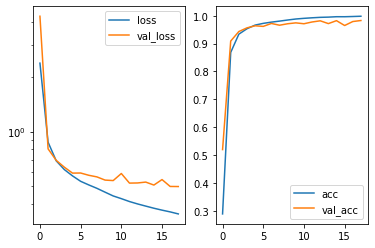

Predicted cell: NonMatureP1 Probability: [[0.9986628]]
True Cell type: NonMatureP1
X [[0.3707439]]
True positional value X 0.3148148148148148
Y [[0.5156884]]
True positional value Y 0.5
H [[0.2857175]]
True positional value H 0.3333333333333333
W [[0.329837]]
True positional value W 0.3148148148148148


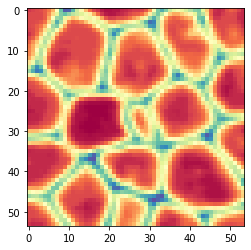

Epoch 19/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.3448 - acc: 0.9984 - val_loss: 0.5300 - val_acc: 0.9753

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5300451843220036, 'val_acc': 0.9752501447995504, 'loss': 0.34481218777087247, 'acc': 0.998420003724344, 'lr': 1e-04}


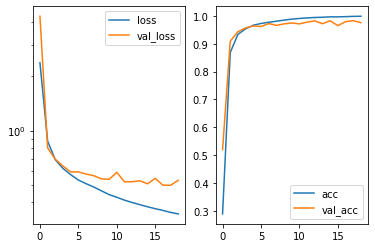

Predicted cell: MacroCheate Probability: [[0.99999905]]
True Cell type: MacroCheate
X [[0.45535773]]
True positional value X 0.5
Y [[0.5233053]]
True positional value Y 0.5
H [[0.71046793]]
True positional value H 0.7037037037037037
W [[0.5935042]]
True positional value W 0.5370370370370371


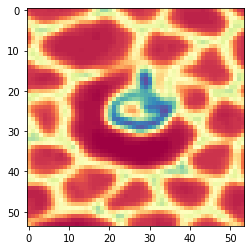

Epoch 20/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.3400 - acc: 0.9983 - val_loss: 0.4877 - val_acc: 0.9831

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4877330565088482, 'val_acc': 0.9831490345601348, 'loss': 0.3400375149422916, 'acc': 0.9983091267927191, 'lr': 1e-04}


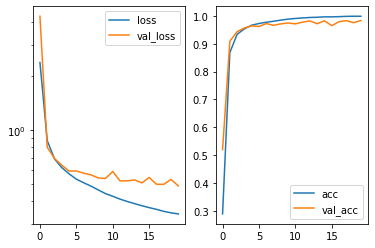

Predicted cell: Normal Probability: [[0.9998758]]
True Cell type: Normal
X [[0.57644284]]
True positional value X 0.5
Y [[0.5558582]]
True positional value Y 0.5
H [[0.31757468]]
True positional value H 0.24074074074074073
W [[0.3371152]]
True positional value W 0.3148148148148148


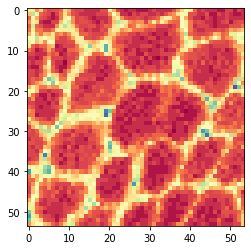

Epoch 21/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.3346 - acc: 0.9984 - val_loss: 0.4968 - val_acc: 0.9847

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4968112347124752, 'val_acc': 0.9847288150232425, 'loss': 0.334646708114222, 'acc': 0.9983645652585316, 'lr': 1e-04}


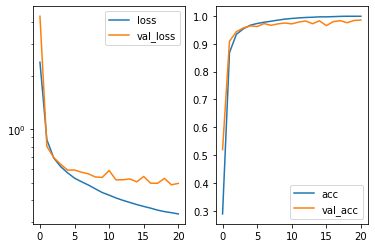

Predicted cell: MatureP1 Probability: [[0.9552228]]
True Cell type: MatureP1
X [[0.26843196]]
True positional value X 0.3148148148148148
Y [[0.753677]]
True positional value Y 0.6851851851851852
H [[0.35056388]]
True positional value H 0.3888888888888889
W [[0.41474736]]
True positional value W 0.4074074074074074


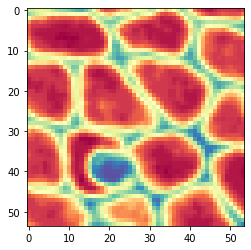

Epoch 22/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.3290 - acc: 0.9990 - val_loss: 0.5030 - val_acc: 0.9810

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5029985946124952, 'val_acc': 0.9810426616555706, 'loss': 0.328970819222635, 'acc': 0.998974388382469, 'lr': 1e-04}


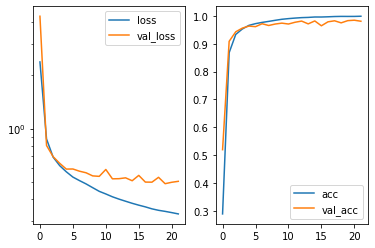

Predicted cell: MatureP1 Probability: [[0.89475757]]
True Cell type: MatureP1
X [[0.7103329]]
True positional value X 0.6851851851851852
Y [[0.7083903]]
True positional value Y 0.6851851851851852
H [[0.5967553]]
True positional value H 0.5925925925925926
W [[0.57741266]]
True positional value W 0.5555555555555556


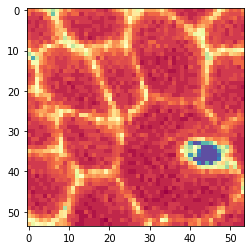

Epoch 23/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.3248 - acc: 0.9986 - val_loss: 0.4935 - val_acc: 0.9789

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.49348945539835065, 'val_acc': 0.9789362887510066, 'loss': 0.32483628176773105, 'acc': 0.9986140383546878, 'lr': 1e-04}


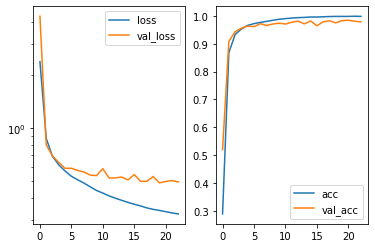

Predicted cell: NonMatureP1 Probability: [[0.99256647]]
True Cell type: NonMatureP1
X [[0.6461461]]
True positional value X 0.6851851851851852
Y [[0.36246216]]
True positional value Y 0.3148148148148148
H [[0.33876532]]
True positional value H 0.4444444444444444
W [[0.35276112]]
True positional value W 0.3888888888888889


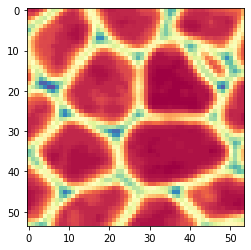

Epoch 24/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.3202 - acc: 0.9991 - val_loss: 0.4796 - val_acc: 0.9842

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47957491507462413, 'val_acc': 0.984202216304309, 'loss': 0.32015850811565594, 'acc': 0.9990852653140939, 'lr': 1e-04}


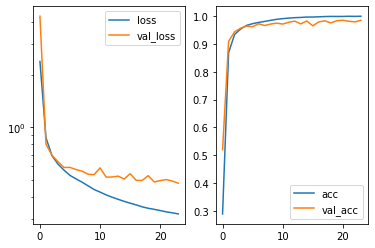

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.68829715]]
True positional value X 0.6851851851851852
Y [[0.47189426]]
True positional value Y 0.5
H [[0.5659795]]
True positional value H 0.5555555555555556
W [[0.6502793]]
True positional value W 0.6296296296296297


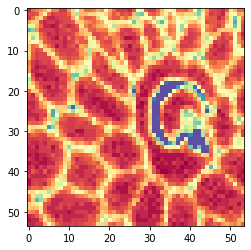

Epoch 25/250
36076/36076 [==============================] - 16s 454us/step - loss: 0.3156 - acc: 0.9990 - val_loss: 0.4814 - val_acc: 0.9853

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4814063416084784, 'val_acc': 0.9852554043259603, 'loss': 0.3156259351353487, 'acc': 0.9990021076153752, 'lr': 1e-04}


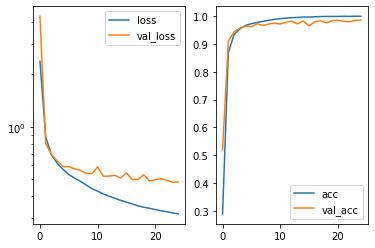

Predicted cell: NonMatureP1 Probability: [[0.99953306]]
True Cell type: NonMatureP1
X [[0.5664228]]
True positional value X 0.6851851851851852
Y [[0.47466162]]
True positional value Y 0.3148148148148148
H [[0.3057934]]
True positional value H 0.3148148148148148
W [[0.3196532]]
True positional value W 0.3333333333333333


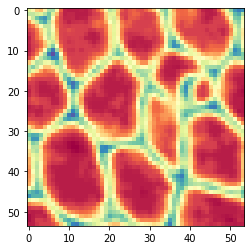

Epoch 26/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.3126 - acc: 0.9990 - val_loss: 0.4868 - val_acc: 0.9821

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48678933378267814, 'val_acc': 0.9820958465384835, 'loss': 0.3125928173058312, 'acc': 0.9990021076153752, 'lr': 1e-04}


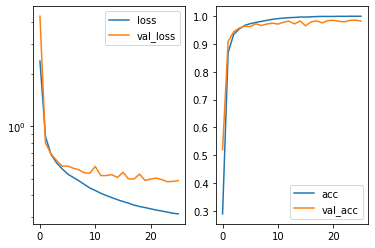

Predicted cell: Normal Probability: [[0.99999845]]
True Cell type: Normal
X [[0.51550424]]
True positional value X 0.5
Y [[0.54129803]]
True positional value Y 0.5
H [[0.25369]]
True positional value H 0.3888888888888889
W [[0.3860293]]
True positional value W 0.42592592592592593


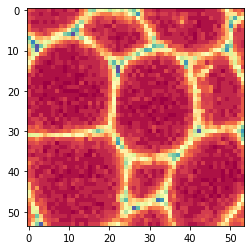

Epoch 27/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.3119 - acc: 0.9985 - val_loss: 0.4816 - val_acc: 0.9821

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4815862756016507, 'val_acc': 0.9820958465384835, 'loss': 0.3119259979821637, 'acc': 0.9985031614230628, 'lr': 1e-04}


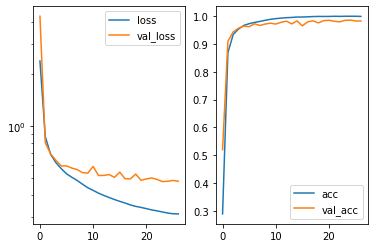

Predicted cell: MatureP1 Probability: [[0.9999982]]
True Cell type: MatureP1
X [[0.28965354]]
True positional value X 0.3148148148148148
Y [[0.2874997]]
True positional value Y 0.3148148148148148
H [[0.29448608]]
True positional value H 0.3333333333333333
W [[0.31793892]]
True positional value W 0.35185185185185186


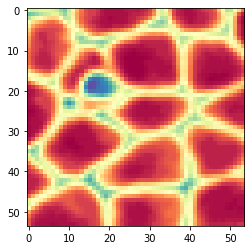

Epoch 28/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.3074 - acc: 0.9990 - val_loss: 0.4839 - val_acc: 0.9847

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4838577784821509, 'val_acc': 0.9847288118845039, 'loss': 0.307387080755238, 'acc': 0.998974388382469, 'lr': 1e-04}


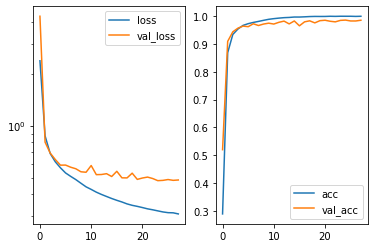

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.6477485]]
True positional value X 0.6851851851851852
Y [[0.6754349]]
True positional value Y 0.6851851851851852
H [[0.32115114]]
True positional value H 0.37037037037037035
W [[0.40296143]]
True positional value W 0.42592592592592593


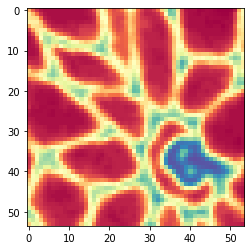

Epoch 29/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.3040 - acc: 0.9991 - val_loss: 0.4858 - val_acc: 0.9826

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48584562860205655, 'val_acc': 0.9826224389799398, 'loss': 0.30403875593190605, 'acc': 0.9991129845470001, 'lr': 1e-04}


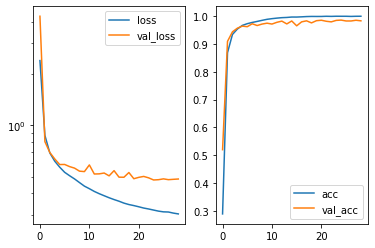

Predicted cell: Normal Probability: [[0.9999502]]
True Cell type: Normal
X [[0.4903671]]
True positional value X 0.5
Y [[0.5726626]]
True positional value Y 0.5
H [[0.50758445]]
True positional value H 0.5370370370370371
W [[0.3415271]]
True positional value W 0.3888888888888889


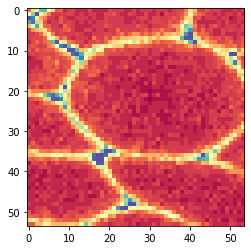

Epoch 30/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.3007 - acc: 0.9993 - val_loss: 0.4750 - val_acc: 0.9853

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47496281773746485, 'val_acc': 0.9852554043259603, 'loss': 0.300746072910223, 'acc': 0.9992792999444376, 'lr': 1e-04}


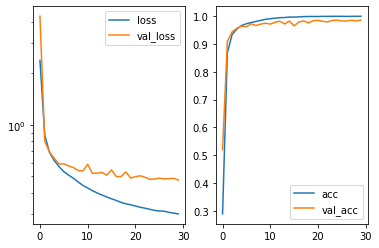

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.50313014]]
True positional value X 0.5
Y [[0.35757506]]
True positional value Y 0.3148148148148148
H [[0.4817867]]
True positional value H 0.48148148148148145
W [[0.70522416]]
True positional value W 0.7777777777777778


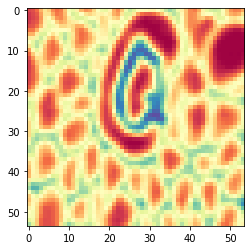

Epoch 31/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2981 - acc: 0.9994 - val_loss: 0.4756 - val_acc: 0.9853

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47558276194406224, 'val_acc': 0.9852554074646989, 'loss': 0.2981199198134499, 'acc': 0.9993624576431563, 'lr': 1e-04}


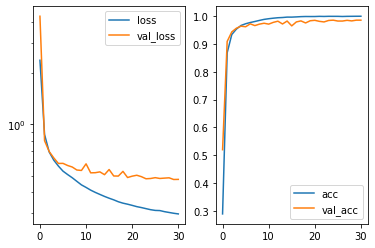

Predicted cell: Normal Probability: [[0.9997801]]
True Cell type: Normal
X [[0.51507306]]
True positional value X 0.5
Y [[0.4716968]]
True positional value Y 0.5
H [[0.21225499]]
True positional value H 0.12962962962962962
W [[0.37232393]]
True positional value W 0.16666666666666666


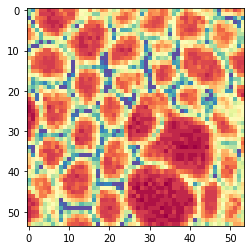

Epoch 32/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2965 - acc: 0.9992 - val_loss: 0.4901 - val_acc: 0.9810

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4901197338305127, 'val_acc': 0.9810426616555706, 'loss': 0.2964911028628789, 'acc': 0.9992238614786252, 'lr': 1e-04}


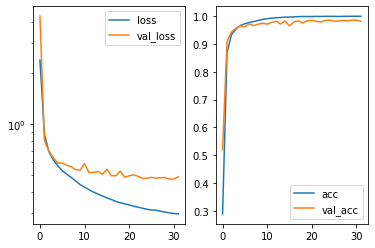

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.54701364]]
True positional value X 0.5
Y [[0.6789802]]
True positional value Y 0.6851851851851852
H [[0.36021638]]
True positional value H 0.18518518518518517
W [[0.43210176]]
True positional value W 0.18518518518518517


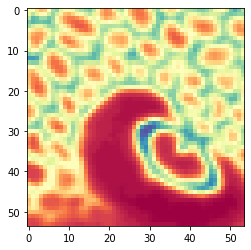

Epoch 33/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2942 - acc: 0.9993 - val_loss: 0.4806 - val_acc: 0.9847

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48059025929437427, 'val_acc': 0.9847288118845039, 'loss': 0.29424013554461714, 'acc': 0.9992792999444376, 'lr': 1e-04}


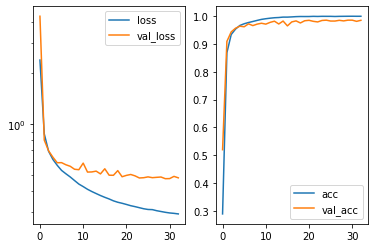

Predicted cell: NonMatureP1 Probability: [[0.99995625]]
True Cell type: NonMatureP1
X [[0.52550673]]
True positional value X 0.5
Y [[0.4940145]]
True positional value Y 0.5
H [[0.3782645]]
True positional value H 0.42592592592592593
W [[0.35863677]]
True positional value W 0.4074074074074074


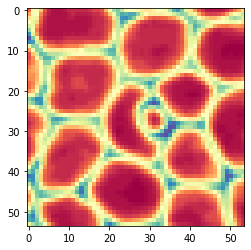

Epoch 34/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2924 - acc: 0.9991 - val_loss: 0.4804 - val_acc: 0.9853

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48037294998741453, 'val_acc': 0.9852554064289152, 'loss': 0.2924070803080738, 'acc': 0.9991129845470001, 'lr': 1e-04}


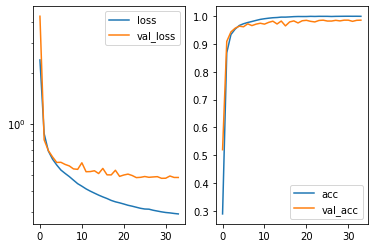

Predicted cell: MacroCheate Probability: [[0.9999964]]
True Cell type: MacroCheate
X [[0.2922392]]
True positional value X 0.3148148148148148
Y [[0.65557456]]
True positional value Y 0.6851851851851852
H [[0.543273]]
True positional value H 0.48148148148148145
W [[0.6094164]]
True positional value W 0.6666666666666666


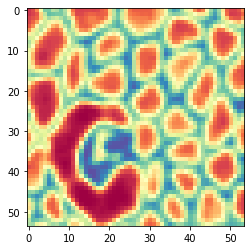

Epoch 35/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2914 - acc: 0.9989 - val_loss: 0.4775 - val_acc: 0.9868

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4775434309649053, 'val_acc': 0.9868351847890681, 'loss': 0.2913758785064554, 'acc': 0.9989189499166564, 'lr': 1e-04}


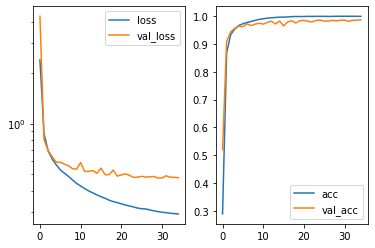

Predicted cell: Normal Probability: [[0.99995327]]
True Cell type: Normal
X [[0.47393394]]
True positional value X 0.5
Y [[0.5053115]]
True positional value Y 0.5
H [[0.47285688]]
True positional value H 0.46296296296296297
W [[0.4655034]]
True positional value W 0.3333333333333333


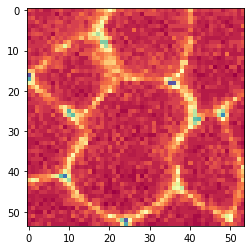

Epoch 36/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2888 - acc: 0.9992 - val_loss: 0.4730 - val_acc: 0.9853

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47304112714111585, 'val_acc': 0.9852554043259603, 'loss': 0.28883481554398716, 'acc': 0.9992238614786252, 'lr': 1e-04}


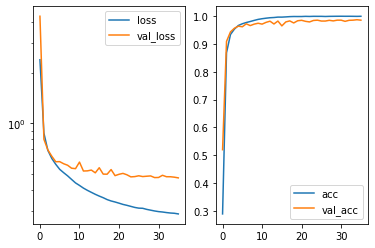

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.42922944]]
True positional value X 0.5
Y [[0.6503072]]
True positional value Y 0.6851851851851852
H [[0.3014157]]
True positional value H 0.3333333333333333
W [[0.34010893]]
True positional value W 0.35185185185185186


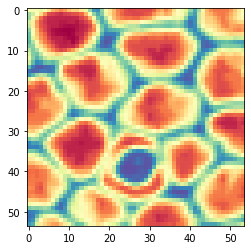

Epoch 37/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2868 - acc: 0.9993 - val_loss: 0.4778 - val_acc: 0.9863

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47776258575596137, 'val_acc': 0.9863085892088731, 'loss': 0.2867997258700028, 'acc': 0.9993347384102501, 'lr': 1e-04}


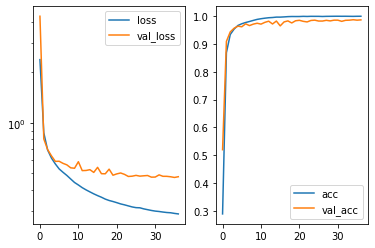

Predicted cell: MatureP1 Probability: [[0.9999974]]
True Cell type: MatureP1
X [[0.71223974]]
True positional value X 0.6851851851851852
Y [[0.30465856]]
True positional value Y 0.3148148148148148
H [[0.41099748]]
True positional value H 0.3888888888888889
W [[0.38077748]]
True positional value W 0.3888888888888889


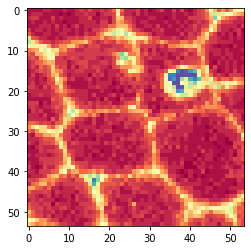

Epoch 38/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.2855 - acc: 0.9993 - val_loss: 0.4922 - val_acc: 0.9821

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4922436776131062, 'val_acc': 0.982095849677222, 'loss': 0.28552903508397187, 'acc': 0.9992515807115314, 'lr': 1e-04}


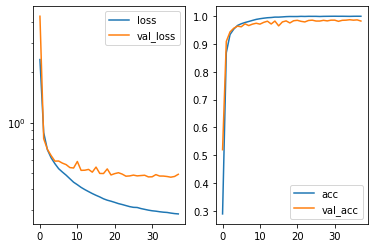

Predicted cell: Normal Probability: [[0.99999845]]
True Cell type: Normal
X [[0.4614069]]
True positional value X 0.5
Y [[0.5058441]]
True positional value Y 0.5
H [[0.37416855]]
True positional value H 0.35185185185185186
W [[0.29982004]]
True positional value W 0.2962962962962963


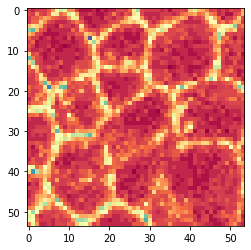

Epoch 39/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2839 - acc: 0.9993 - val_loss: 0.4808 - val_acc: 0.9837

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4808147548373716, 'val_acc': 0.9836756270015912, 'loss': 0.28386069885285203, 'acc': 0.9992792999444376, 'lr': 1e-04}


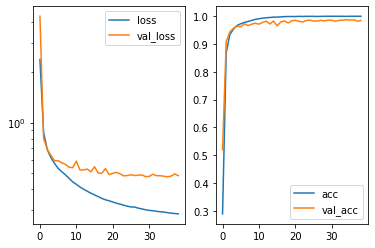

Predicted cell: MacroCheate Probability: [[0.99999917]]
True Cell type: MacroCheate
X [[0.30467004]]
True positional value X 0.3148148148148148
Y [[0.4866829]]
True positional value Y 0.5
H [[0.84235847]]
True positional value H 0.9259259259259259
W [[0.57119364]]
True positional value W 0.6666666666666666


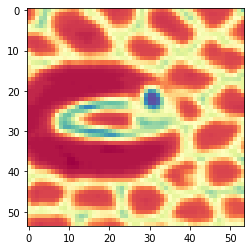

Epoch 40/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2838 - acc: 0.9990 - val_loss: 0.4734 - val_acc: 0.9853

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4733879285903276, 'val_acc': 0.9852554043259603, 'loss': 0.28375007058342516, 'acc': 0.9990298268482815, 'lr': 1e-04}


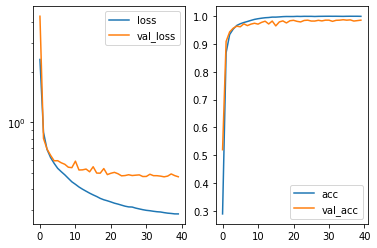

Predicted cell: MatureP1 Probability: [[0.9999987]]
True Cell type: MatureP1
X [[0.33591664]]
True positional value X 0.3148148148148148
Y [[0.66380125]]
True positional value Y 0.6851851851851852
H [[0.4209642]]
True positional value H 0.4444444444444444
W [[0.33280316]]
True positional value W 0.35185185185185186


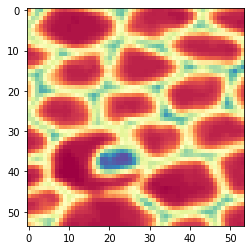

Epoch 41/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2830 - acc: 0.9988 - val_loss: 0.5419 - val_acc: 0.9631

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5418814195966394, 'val_acc': 0.9631384914331903, 'loss': 0.28302640998650314, 'acc': 0.9988357922179377, 'lr': 1e-04}


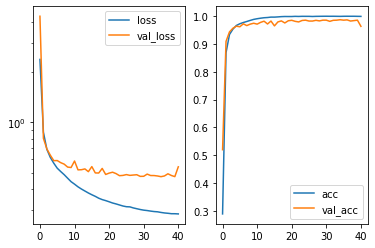

Predicted cell: MatureP1 Probability: [[0.99986386]]
True Cell type: MatureP1
X [[0.7062074]]
True positional value X 0.6851851851851852
Y [[0.6460838]]
True positional value Y 0.6851851851851852
H [[0.26013297]]
True positional value H 0.24074074074074073
W [[0.27647978]]
True positional value W 0.2777777777777778


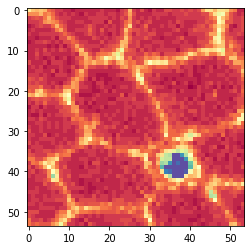

Epoch 42/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2829 - acc: 0.9990 - val_loss: 0.4745 - val_acc: 0.9863

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47446015789484963, 'val_acc': 0.9863085923476116, 'loss': 0.28290753182028305, 'acc': 0.9990021076153752, 'lr': 1e-04}


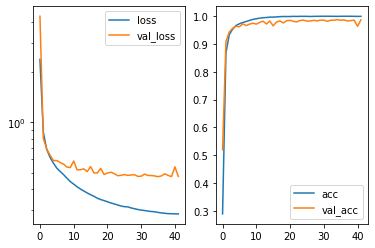

Predicted cell: MatureP1 Probability: [[0.9999732]]
True Cell type: MatureP1
X [[0.47716695]]
True positional value X 0.5
Y [[0.4926071]]
True positional value Y 0.5
H [[0.262184]]
True positional value H 0.25925925925925924
W [[0.26707792]]
True positional value W 0.24074074074074073


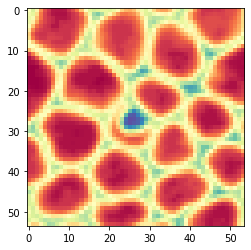

Epoch 43/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2794 - acc: 0.9991 - val_loss: 0.4695 - val_acc: 0.9868

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4695468416585616, 'val_acc': 0.9868351847890681, 'loss': 0.27944570980046646, 'acc': 0.9991407037799064, 'lr': 1e-04}


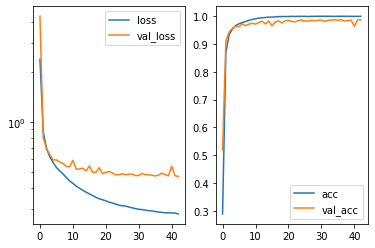

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7014202]]
True positional value X 0.6851851851851852
Y [[0.48227733]]
True positional value Y 0.5
H [[0.4040302]]
True positional value H 0.48148148148148145
W [[0.5969536]]
True positional value W 0.7407407407407407


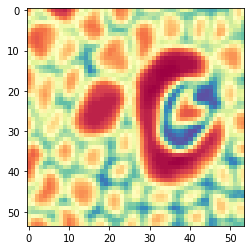

Epoch 44/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2775 - acc: 0.9992 - val_loss: 0.4661 - val_acc: 0.9868

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46612695124728104, 'val_acc': 0.9868351847890681, 'loss': 0.2775394557313838, 'acc': 0.9992238614786252, 'lr': 1e-04}


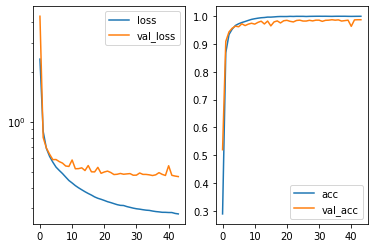

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5320103]]
True positional value X 0.5
Y [[0.5425993]]
True positional value Y 0.5
H [[0.7098211]]
True positional value H 0.5
W [[0.69141966]]
True positional value W 0.5


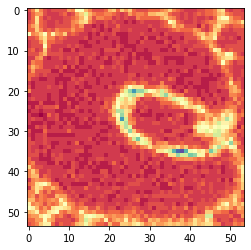

Epoch 45/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2758 - acc: 0.9993 - val_loss: 0.4738 - val_acc: 0.9831

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4737790644702439, 'val_acc': 0.9831490282826577, 'loss': 0.2758059146789162, 'acc': 0.9992792999444376, 'lr': 1e-04}


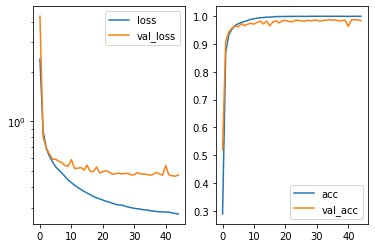

Predicted cell: MacroCheate Probability: [[0.9999788]]
True Cell type: MacroCheate
X [[0.28364992]]
True positional value X 0.3148148148148148
Y [[0.27619213]]
True positional value Y 0.3148148148148148
H [[0.59239596]]
True positional value H 0.5185185185185185
W [[0.88772595]]
True positional value W 0.9074074074074074


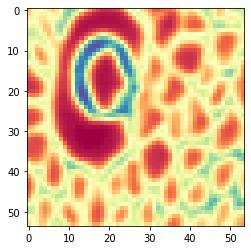

Epoch 46/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2753 - acc: 0.9992 - val_loss: 0.4753 - val_acc: 0.9826

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4753341779010807, 'val_acc': 0.9826224358412013, 'loss': 0.2752585247173874, 'acc': 0.9992238614786252, 'lr': 1e-04}


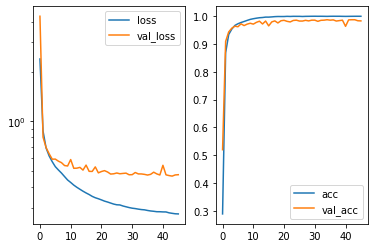

Predicted cell: NonMatureP1 Probability: [[0.9998369]]
True Cell type: NonMatureP1
X [[0.4788445]]
True positional value X 0.5
Y [[0.3876406]]
True positional value Y 0.3148148148148148
H [[0.23161873]]
True positional value H 0.2777777777777778
W [[0.34671134]]
True positional value W 0.42592592592592593


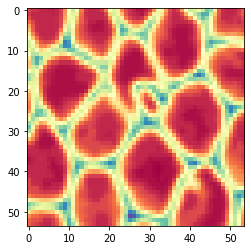

Epoch 47/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2743 - acc: 0.9993 - val_loss: 0.4705 - val_acc: 0.9874

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47051906745769023, 'val_acc': 0.9873617803692629, 'loss': 0.27426640924811035, 'acc': 0.9992515807115314, 'lr': 1e-04}


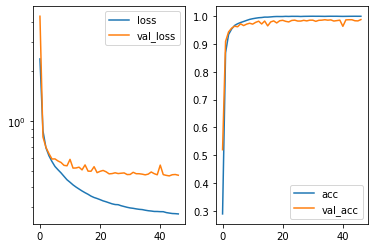

Predicted cell: MatureP1 Probability: [[0.99985147]]
True Cell type: MatureP1
X [[0.45075083]]
True positional value X 0.5
Y [[0.6542666]]
True positional value Y 0.6851851851851852
H [[0.273605]]
True positional value H 0.25925925925925924
W [[0.24028738]]
True positional value W 0.25925925925925924


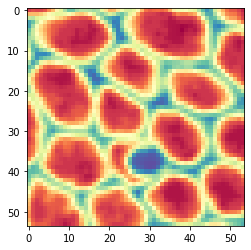

Epoch 48/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2728 - acc: 0.9993 - val_loss: 0.4706 - val_acc: 0.9884

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47062794103818295, 'val_acc': 0.9884149652521758, 'loss': 0.27279731411536845, 'acc': 0.9992792999444376, 'lr': 1e-04}


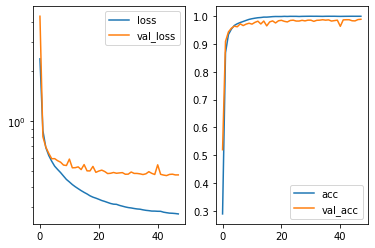

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.48308516]]
True positional value X 0.5
Y [[0.31242323]]
True positional value Y 0.3148148148148148
H [[0.7737515]]
True positional value H 0.8333333333333334
W [[0.63766265]]
True positional value W 0.6851851851851852


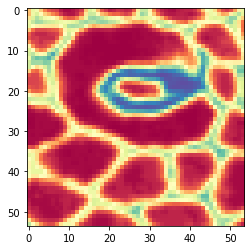

Epoch 49/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2723 - acc: 0.9993 - val_loss: 0.4679 - val_acc: 0.9853

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46788881696356543, 'val_acc': 0.9852554074646989, 'loss': 0.2723282499540168, 'acc': 0.9992515807115314, 'lr': 1e-04}


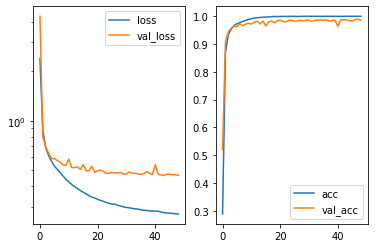

Predicted cell: MatureP1 Probability: [[0.999995]]
True Cell type: MatureP1
X [[0.50738454]]
True positional value X 0.5
Y [[0.68815625]]
True positional value Y 0.6851851851851852
H [[0.30250335]]
True positional value H 0.3148148148148148
W [[0.3212784]]
True positional value W 0.2962962962962963


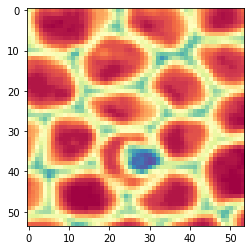

Epoch 50/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2705 - acc: 0.9993 - val_loss: 0.4812 - val_acc: 0.9847

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48121317689076043, 'val_acc': 0.9847288087457654, 'loss': 0.27053013856665553, 'acc': 0.9992515806652699, 'lr': 1e-04}


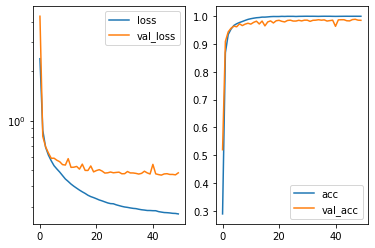

Predicted cell: NonMatureP1 Probability: [[0.9975848]]
True Cell type: NonMatureP1
X [[0.68986696]]
True positional value X 0.6851851851851852
Y [[0.36028478]]
True positional value Y 0.3148148148148148
H [[0.52181983]]
True positional value H 0.48148148148148145
W [[0.43129197]]
True positional value W 0.46296296296296297


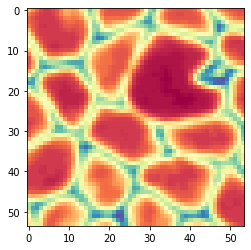

Epoch 51/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.2702 - acc: 0.9994 - val_loss: 0.4701 - val_acc: 0.9858

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47007085179705066, 'val_acc': 0.9857819999061552, 'loss': 0.2701500511041223, 'acc': 0.9993901768760626, 'lr': 1e-04}


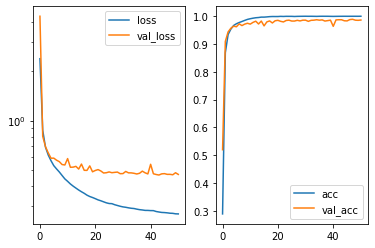

Predicted cell: MatureP1 Probability: [[0.99975234]]
True Cell type: MatureP1
X [[0.6592234]]
True positional value X 0.6851851851851852
Y [[0.32058388]]
True positional value Y 0.3148148148148148
H [[0.18784595]]
True positional value H 0.14814814814814814
W [[0.19921729]]
True positional value W 0.16666666666666666


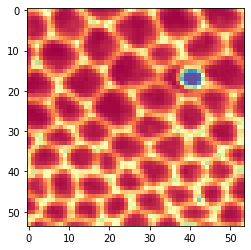

Epoch 52/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2690 - acc: 0.9993 - val_loss: 0.4713 - val_acc: 0.9842

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4712543777882143, 'val_acc': 0.984202222581786, 'loss': 0.2689595175022058, 'acc': 0.9993347384102501, 'lr': 1e-04}


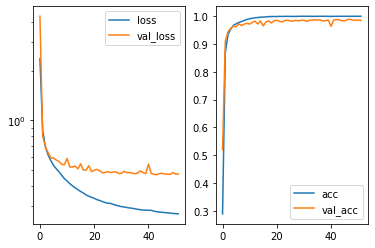

Predicted cell: MatureP1 Probability: [[0.99990904]]
True Cell type: MatureP1
X [[0.6975954]]
True positional value X 0.6851851851851852
Y [[0.50575453]]
True positional value Y 0.5
H [[0.39915824]]
True positional value H 0.35185185185185186
W [[0.3110352]]
True positional value W 0.3333333333333333


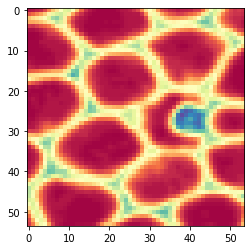

Epoch 53/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2681 - acc: 0.9993 - val_loss: 0.4665 - val_acc: 0.9884

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4664760134356972, 'val_acc': 0.9884149621134372, 'loss': 0.2680948799882261, 'acc': 0.9992515807115314, 'lr': 1e-04}


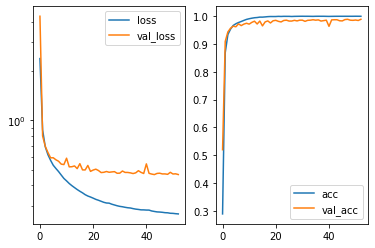

Predicted cell: Normal Probability: [[0.9999629]]
True Cell type: Normal
X [[0.48714465]]
True positional value X 0.5
Y [[0.5201703]]
True positional value Y 0.5
H [[0.25771376]]
True positional value H 0.3148148148148148
W [[0.240426]]
True positional value W 0.2962962962962963


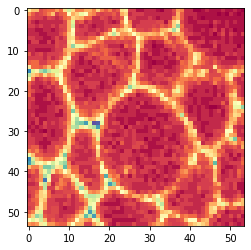

Epoch 54/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2675 - acc: 0.9993 - val_loss: 0.4633 - val_acc: 0.9884

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46325412152502776, 'val_acc': 0.9884149621134372, 'loss': 0.26753339470457194, 'acc': 0.9992792999444376, 'lr': 1e-04}


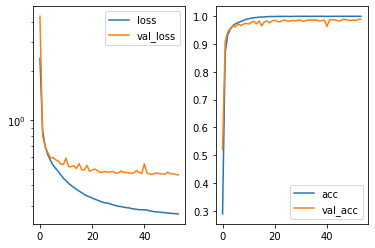

Predicted cell: MacroCheate Probability: [[0.99978656]]
True Cell type: MacroCheate
X [[0.32909685]]
True positional value X 0.3148148148148148
Y [[0.47918442]]
True positional value Y 0.5
H [[0.39165774]]
True positional value H 0.3333333333333333
W [[0.40410954]]
True positional value W 0.4074074074074074


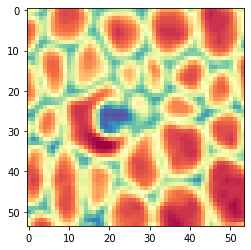

Epoch 55/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2667 - acc: 0.9994 - val_loss: 0.4620 - val_acc: 0.9889

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4620243235284746, 'val_acc': 0.9889415545548935, 'loss': 0.2666603335025424, 'acc': 0.9994456153418751, 'lr': 1e-04}


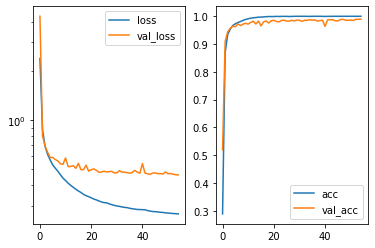

Predicted cell: Normal Probability: [[0.9999993]]
True Cell type: Normal
X [[0.5596777]]
True positional value X 0.5
Y [[0.495785]]
True positional value Y 0.5
H [[0.20126238]]
True positional value H 0.3888888888888889
W [[0.29749078]]
True positional value W 0.4444444444444444


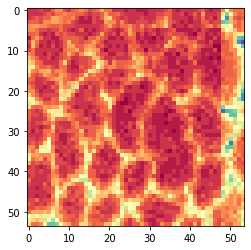

Epoch 56/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2659 - acc: 0.9994 - val_loss: 0.4572 - val_acc: 0.9884

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4571605104405733, 'val_acc': 0.9884149621134372, 'loss': 0.2659079225004638, 'acc': 0.9993624576431563, 'lr': 1e-04}


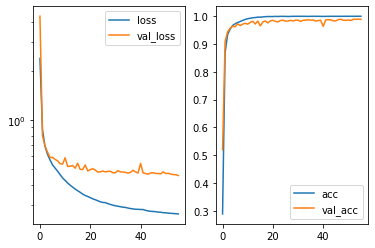

Predicted cell: MacroCheate Probability: [[0.9999616]]
True Cell type: MacroCheate
X [[0.6739541]]
True positional value X 0.6851851851851852
Y [[0.4921923]]
True positional value Y 0.5
H [[0.3999514]]
True positional value H 0.4074074074074074
W [[0.38081267]]
True positional value W 0.5


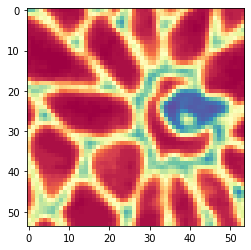

Epoch 57/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2645 - acc: 0.9993 - val_loss: 0.4723 - val_acc: 0.9842

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4722690267146042, 'val_acc': 0.9842022194430475, 'loss': 0.264536656932485, 'acc': 0.9992792999444376, 'lr': 1e-04}


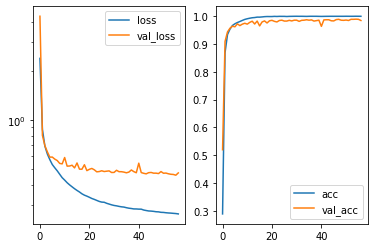

Predicted cell: Normal Probability: [[0.9999298]]
True Cell type: Normal
X [[0.5269535]]
True positional value X 0.5
Y [[0.5401859]]
True positional value Y 0.5
H [[0.3247931]]
True positional value H 0.2962962962962963
W [[0.31389123]]
True positional value W 0.24074074074074073


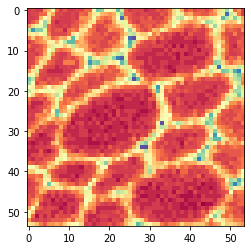

Epoch 58/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2638 - acc: 0.9992 - val_loss: 0.4614 - val_acc: 0.9879

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4613662096561414, 'val_acc': 0.9878883696719808, 'loss': 0.263781819656559, 'acc': 0.9992238614786252, 'lr': 1e-04}


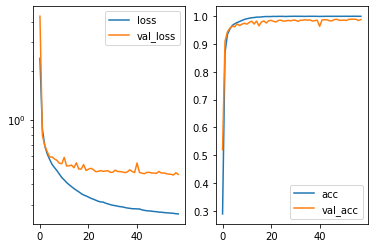

Predicted cell: NonMatureP1 Probability: [[0.9483445]]
True Cell type: NonMatureP1
X [[0.5960558]]
True positional value X 0.5
Y [[0.3214885]]
True positional value Y 0.3148148148148148
H [[0.50011635]]
True positional value H 0.42592592592592593
W [[0.3416826]]
True positional value W 0.4074074074074074


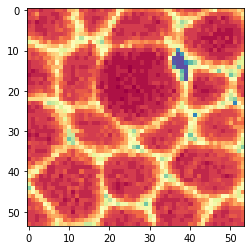

Epoch 59/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2631 - acc: 0.9994 - val_loss: 0.4600 - val_acc: 0.9863

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46004770968448744, 'val_acc': 0.9863085923476116, 'loss': 0.2630524401760429, 'acc': 0.9994178961089688, 'lr': 1e-04}


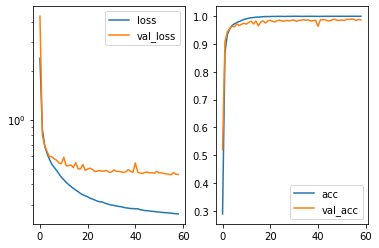

Predicted cell: MacroCheate Probability: [[0.9999746]]
True Cell type: MacroCheate
X [[0.5543066]]
True positional value X 0.5
Y [[0.69003856]]
True positional value Y 0.6851851851851852
H [[0.33566666]]
True positional value H 0.3888888888888889
W [[0.4136273]]
True positional value W 0.3888888888888889


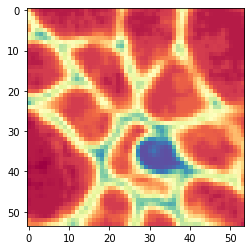

Epoch 60/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2624 - acc: 0.9993 - val_loss: 0.4603 - val_acc: 0.9874

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46030891114250494, 'val_acc': 0.9873617740917858, 'loss': 0.2623841794463163, 'acc': 0.9993070191773439, 'lr': 1e-04}


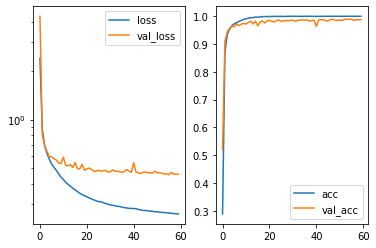

Predicted cell: MacroCheate Probability: [[0.9999993]]
True Cell type: MacroCheate
X [[0.71733326]]
True positional value X 0.6851851851851852
Y [[0.5456746]]
True positional value Y 0.5
H [[0.33724412]]
True positional value H 0.2777777777777778
W [[0.57080173]]
True positional value W 0.37037037037037035


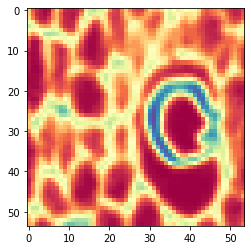

Epoch 61/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2619 - acc: 0.9993 - val_loss: 0.4618 - val_acc: 0.9879

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4617894670409614, 'val_acc': 0.9878883728107193, 'loss': 0.26193000859492027, 'acc': 0.9992792999444376, 'lr': 1e-04}


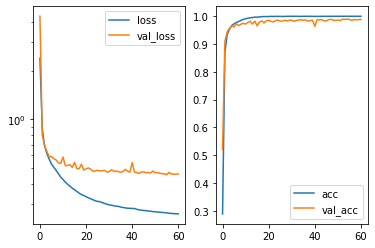

Predicted cell: MatureP1 Probability: [[0.9999982]]
True Cell type: MatureP1
X [[0.6506536]]
True positional value X 0.6851851851851852
Y [[0.4757297]]
True positional value Y 0.5
H [[0.43038288]]
True positional value H 0.3888888888888889
W [[0.36400822]]
True positional value W 0.35185185185185186


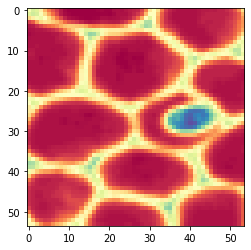

Epoch 62/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2608 - acc: 0.9993 - val_loss: 0.4594 - val_acc: 0.9889

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45942273109821724, 'val_acc': 0.9889415576936321, 'loss': 0.2607959343841433, 'acc': 0.9993070191773439, 'lr': 1e-04}


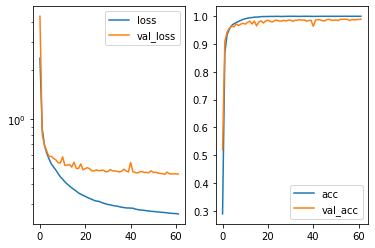

Predicted cell: MacroCheate Probability: [[0.99995816]]
True Cell type: MacroCheate
X [[0.72603154]]
True positional value X 0.6851851851851852
Y [[0.54468286]]
True positional value Y 0.5
H [[0.43095323]]
True positional value H 0.4444444444444444
W [[0.40336165]]
True positional value W 0.46296296296296297


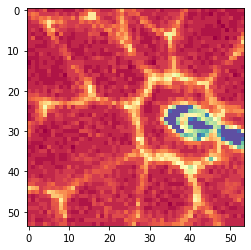

Epoch 63/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2603 - acc: 0.9993 - val_loss: 0.4633 - val_acc: 0.9874

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4632568181094651, 'val_acc': 0.9873617772305244, 'loss': 0.2602941973740199, 'acc': 0.9992792999444376, 'lr': 1e-04}


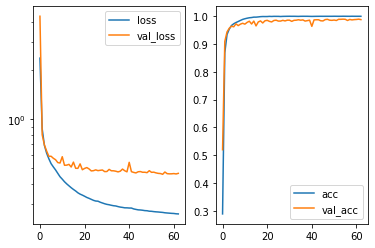

Predicted cell: MacroCheate Probability: [[0.9999931]]
True Cell type: MacroCheate
X [[0.49144977]]
True positional value X 0.5
Y [[0.27625373]]
True positional value Y 0.3148148148148148
H [[0.79283226]]
True positional value H 0.7962962962962963
W [[0.6659695]]
True positional value W 0.6111111111111112


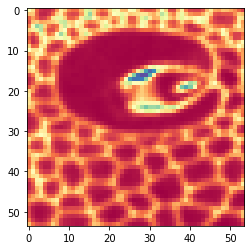

Epoch 64/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2603 - acc: 0.9993 - val_loss: 0.4869 - val_acc: 0.9805

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.48689333111314537, 'val_acc': 0.9805160754915914, 'loss': 0.26033230077825165, 'acc': 0.9993347384102501, 'lr': 1e-04}


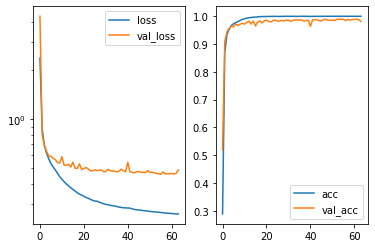

Predicted cell: MatureP1 Probability: [[0.9999988]]
True Cell type: MatureP1
X [[0.5091107]]
True positional value X 0.5
Y [[0.29426205]]
True positional value Y 0.3148148148148148
H [[0.45155862]]
True positional value H 0.42592592592592593
W [[0.42539763]]
True positional value W 0.4074074074074074


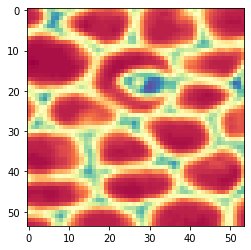

Epoch 65/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2597 - acc: 0.9993 - val_loss: 0.4588 - val_acc: 0.9874

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45878683227561157, 'val_acc': 0.9873617803692629, 'loss': 0.25968455314662664, 'acc': 0.9993070191773439, 'lr': 1e-04}


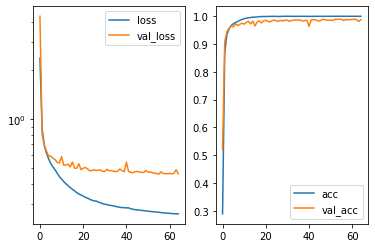

Predicted cell: Normal Probability: [[0.9999429]]
True Cell type: Normal
X [[0.52504694]]
True positional value X 0.5
Y [[0.4815847]]
True positional value Y 0.5
H [[0.29291016]]
True positional value H 0.3333333333333333
W [[0.3562409]]
True positional value W 0.6296296296296297


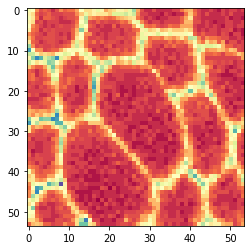

Epoch 66/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2582 - acc: 0.9994 - val_loss: 0.4617 - val_acc: 0.9853

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4616717702781231, 'val_acc': 0.9852554011872218, 'loss': 0.2582179042793111, 'acc': 0.9993624576431563, 'lr': 1e-04}


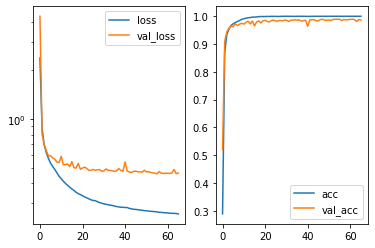

Predicted cell: Normal Probability: [[0.9994986]]
True Cell type: Normal
X [[0.50727916]]
True positional value X 0.5
Y [[0.5175699]]
True positional value Y 0.5
H [[0.17710084]]
True positional value H 0.18518518518518517
W [[0.20702901]]
True positional value W 0.18518518518518517


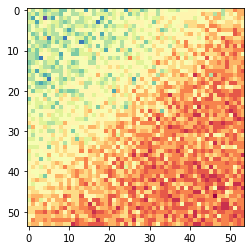

Epoch 67/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2580 - acc: 0.9992 - val_loss: 0.4579 - val_acc: 0.9884

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.457924835615374, 'val_acc': 0.9884149621134372, 'loss': 0.25795426498840385, 'acc': 0.9991684230128126, 'lr': 1e-04}


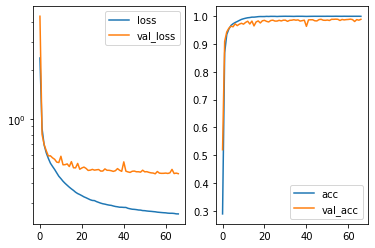

Predicted cell: MatureP1 Probability: [[0.99999845]]
True Cell type: MatureP1
X [[0.6142302]]
True positional value X 0.6851851851851852
Y [[0.47198674]]
True positional value Y 0.5
H [[0.40478414]]
True positional value H 0.3888888888888889
W [[0.4707139]]
True positional value W 0.4074074074074074


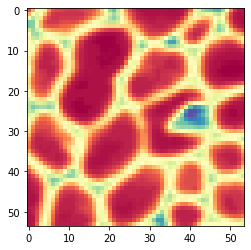

Epoch 68/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2573 - acc: 0.9992 - val_loss: 0.4538 - val_acc: 0.9900

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45381022730019294, 'val_acc': 0.9899947425765449, 'loss': 0.2573005223118264, 'acc': 0.9992238614786252, 'lr': 1e-04}


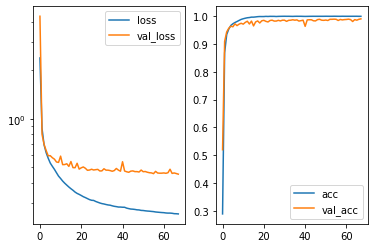

Predicted cell: NonMatureP1 Probability: [[0.99993837]]
True Cell type: NonMatureP1
X [[0.46107253]]
True positional value X 0.5
Y [[0.5162151]]
True positional value Y 0.5
H [[0.45950913]]
True positional value H 0.42592592592592593
W [[0.43112355]]
True positional value W 0.3888888888888889


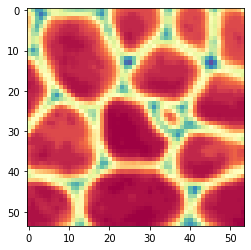

Epoch 69/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2565 - acc: 0.9993 - val_loss: 0.4590 - val_acc: 0.9858

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45901536398526555, 'val_acc': 0.9857820030448937, 'loss': 0.25647707196921754, 'acc': 0.9992792999444376, 'lr': 1e-04}


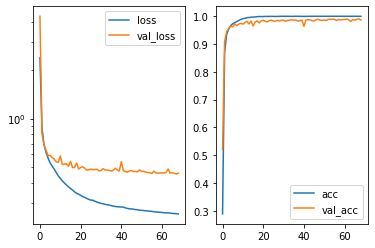

Predicted cell: MatureP1 Probability: [[0.9999713]]
True Cell type: MatureP1
X [[0.3277952]]
True positional value X 0.3148148148148148
Y [[0.31491208]]
True positional value Y 0.3148148148148148
H [[0.37935582]]
True positional value H 0.3148148148148148
W [[0.3342389]]
True positional value W 0.2777777777777778


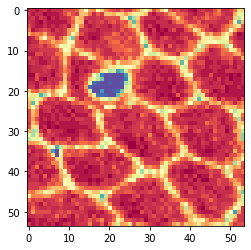

Epoch 70/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2561 - acc: 0.9992 - val_loss: 0.4656 - val_acc: 0.9821

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4655640583530484, 'val_acc': 0.9820958433997449, 'loss': 0.2560957772945377, 'acc': 0.9992238614786252, 'lr': 1e-04}


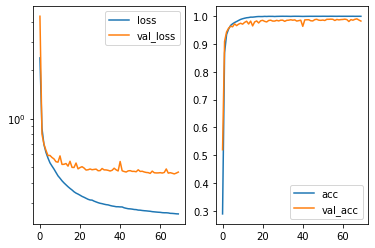

Predicted cell: NonMatureP1 Probability: [[0.95205986]]
True Cell type: MatureP1
X [[0.5245512]]
True positional value X 0.6851851851851852
Y [[0.40655276]]
True positional value Y 0.3148148148148148
H [[0.40517932]]
True positional value H 0.4074074074074074
W [[0.4756657]]
True positional value W 0.3888888888888889


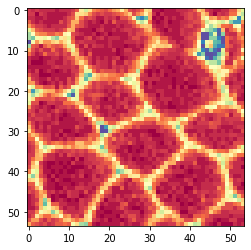

Epoch 71/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2550 - acc: 0.9994 - val_loss: 0.4515 - val_acc: 0.9889

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4514921804739966, 'val_acc': 0.9889415576936321, 'loss': 0.2549934674705763, 'acc': 0.9993624576431563, 'lr': 1e-04}


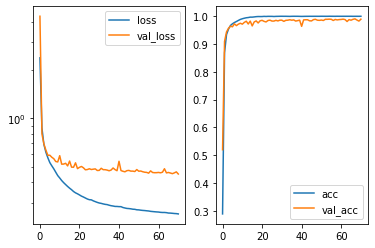

Predicted cell: NonMatureP1 Probability: [[0.99999464]]
True Cell type: NonMatureP1
X [[0.29913282]]
True positional value X 0.3148148148148148
Y [[0.69427335]]
True positional value Y 0.6851851851851852
H [[0.4543187]]
True positional value H 0.37037037037037035
W [[0.38073188]]
True positional value W 0.37037037037037035


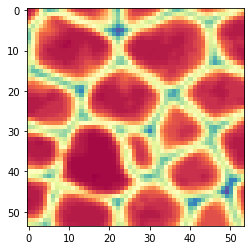

Epoch 72/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.2554 - acc: 0.9993 - val_loss: 0.5206 - val_acc: 0.9779

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.5205874690386796, 'val_acc': 0.977883108042616, 'loss': 0.25535759116332035, 'acc': 0.9992515807115314, 'lr': 1e-04}


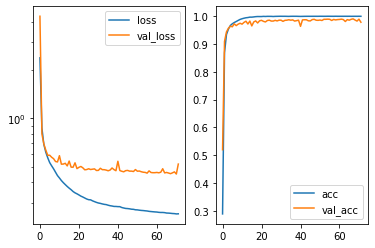

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.44827998]]
True positional value X 0.5
Y [[0.3605546]]
True positional value Y 0.3148148148148148
H [[0.891825]]
True positional value H 0.8518518518518519
W [[0.9272132]]
True positional value W 0.8703703703703703


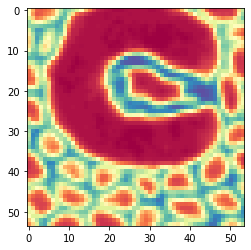

Epoch 73/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2545 - acc: 0.9991 - val_loss: 0.4653 - val_acc: 0.9853

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46526595418110467, 'val_acc': 0.9852554043259603, 'loss': 0.25452530697981074, 'acc': 0.9991407037799064, 'lr': 1e-04}


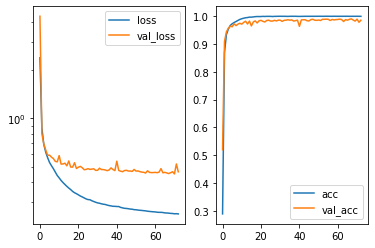

Predicted cell: NonMatureP1 Probability: [[0.9994809]]
True Cell type: NonMatureP1
X [[0.5069782]]
True positional value X 0.3148148148148148
Y [[0.5368521]]
True positional value Y 0.3148148148148148
H [[0.27221122]]
True positional value H 0.2962962962962963
W [[0.32672924]]
True positional value W 0.37037037037037035


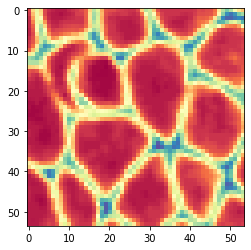

Epoch 74/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2542 - acc: 0.9993 - val_loss: 0.4662 - val_acc: 0.9831

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46622685334003244, 'val_acc': 0.9831490314213962, 'loss': 0.25418495171144645, 'acc': 0.9993070191773439, 'lr': 1e-04}


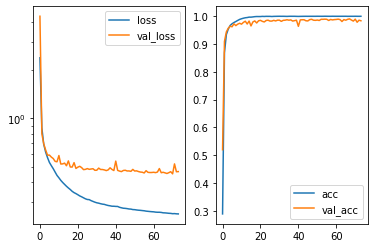

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49459523]]
True positional value X 0.5
Y [[0.477048]]
True positional value Y 0.5
H [[0.47823393]]
True positional value H 0.4444444444444444
W [[0.48240885]]
True positional value W 0.5185185185185185


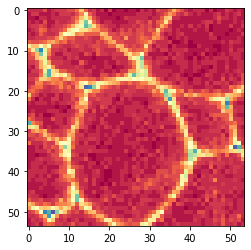

Epoch 75/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2530 - acc: 0.9991 - val_loss: 0.4772 - val_acc: 0.9826

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.47723131747293496, 'val_acc': 0.9826224389799398, 'loss': 0.2530382117284403, 'acc': 0.9991129845470001, 'lr': 1e-04}


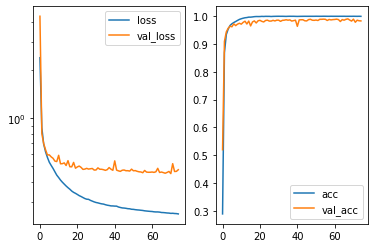

Predicted cell: MatureP1 Probability: [[0.99999547]]
True Cell type: MatureP1
X [[0.6696952]]
True positional value X 0.6851851851851852
Y [[0.53639126]]
True positional value Y 0.5
H [[0.5001901]]
True positional value H 0.5185185185185185
W [[0.43887988]]
True positional value W 0.42592592592592593


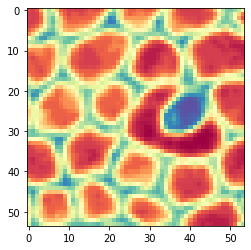

Epoch 76/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2524 - acc: 0.9992 - val_loss: 0.4577 - val_acc: 0.9863

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4576965600581719, 'val_acc': 0.9863085923476116, 'loss': 0.25236144685860235, 'acc': 0.9992238614786252, 'lr': 1e-04}


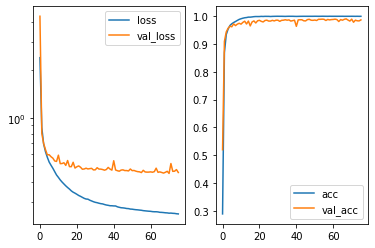

Predicted cell: Normal Probability: [[0.9999981]]
True Cell type: Normal
X [[0.5100175]]
True positional value X 0.5
Y [[0.48582423]]
True positional value Y 0.5
H [[0.26937824]]
True positional value H 0.2037037037037037
W [[0.3162534]]
True positional value W 0.16666666666666666


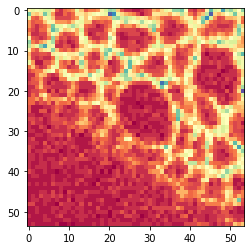

Epoch 77/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2514 - acc: 0.9993 - val_loss: 0.4689 - val_acc: 0.9858

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4689242142699404, 'val_acc': 0.9857819967674167, 'loss': 0.25137671362020075, 'acc': 0.9992515807115314, 'lr': 1e-04}


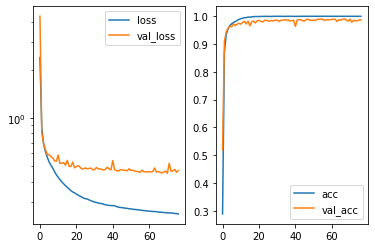

Predicted cell: NonMatureP1 Probability: [[0.99999857]]
True Cell type: NonMatureP1
X [[0.4972053]]
True positional value X 0.5
Y [[0.41078353]]
True positional value Y 0.3148148148148148
H [[0.23291287]]
True positional value H 0.25925925925925924
W [[0.34758726]]
True positional value W 0.3333333333333333


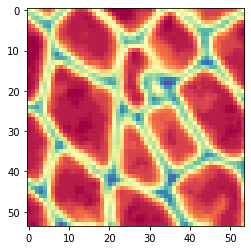

Epoch 78/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2510 - acc: 0.9993 - val_loss: 0.4494 - val_acc: 0.9879

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44943205010206716, 'val_acc': 0.9878883728107193, 'loss': 0.2509727068778244, 'acc': 0.9992792999444376, 'lr': 1e-04}


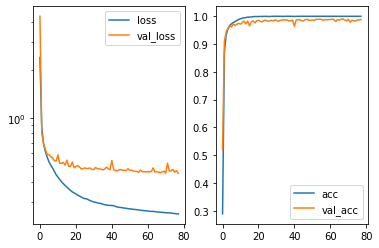

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.6742999]]
True positional value X 0.6851851851851852
Y [[0.64801574]]
True positional value Y 0.6851851851851852
H [[0.45054856]]
True positional value H 0.42592592592592593
W [[0.39269143]]
True positional value W 0.3333333333333333


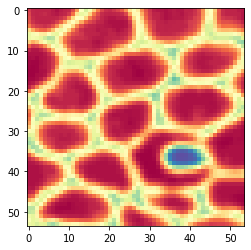

Epoch 79/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2504 - acc: 0.9994 - val_loss: 0.4573 - val_acc: 0.9884

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4572902019241096, 'val_acc': 0.9884149621134372, 'loss': 0.2503926845166011, 'acc': 0.9993901768760626, 'lr': 1e-04}


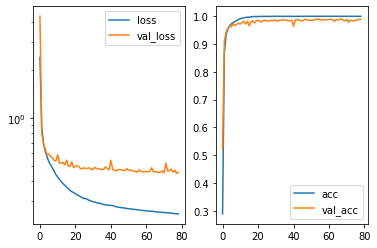

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5113354]]
True positional value X 0.5
Y [[0.53051776]]
True positional value Y 0.5
H [[0.40179813]]
True positional value H 0.37037037037037035
W [[0.4942255]]
True positional value W 0.4074074074074074


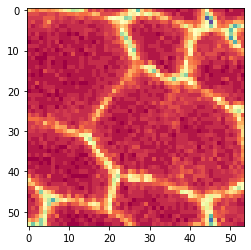

Epoch 80/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2502 - acc: 0.9993 - val_loss: 0.4542 - val_acc: 0.9858

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45418346389586706, 'val_acc': 0.9857819967674167, 'loss': 0.2501740101413011, 'acc': 0.9992792999444376, 'lr': 1e-04}


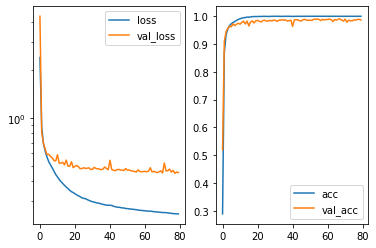

Predicted cell: Normal Probability: [[0.9999912]]
True Cell type: Normal
X [[0.4930275]]
True positional value X 0.5
Y [[0.4925868]]
True positional value Y 0.5
H [[0.36356837]]
True positional value H 0.3148148148148148
W [[0.33608896]]
True positional value W 0.3148148148148148


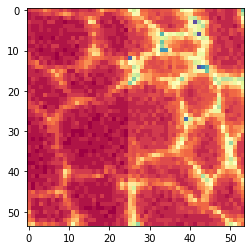

Epoch 81/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2488 - acc: 0.9994 - val_loss: 0.4644 - val_acc: 0.9863

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46443030252275874, 'val_acc': 0.9863085892088731, 'loss': 0.24884260801468525, 'acc': 0.9993624576431563, 'lr': 1e-04}


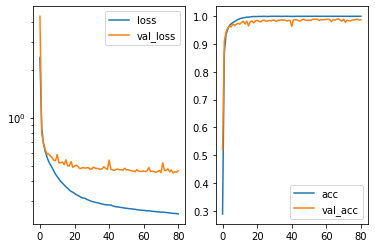

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.48788804]]
True positional value X 0.5
Y [[0.4832679]]
True positional value Y 0.5
H [[0.23102638]]
True positional value H 0.3148148148148148
W [[0.29331]]
True positional value W 0.35185185185185186


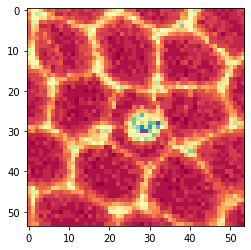

Epoch 82/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2484 - acc: 0.9994 - val_loss: 0.4501 - val_acc: 0.9874

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4500804914180199, 'val_acc': 0.9873617772305244, 'loss': 0.24844077644696824, 'acc': 0.9994178960627074, 'lr': 1e-04}


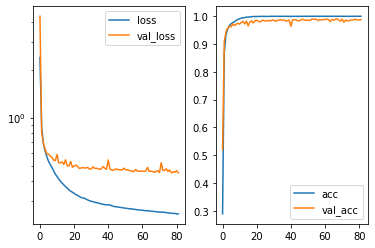

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.44252247]]
True positional value X 0.5
Y [[0.41166982]]
True positional value Y 0.5
H [[0.5082574]]
True positional value H 0.42592592592592593
W [[0.35192004]]
True positional value W 0.42592592592592593


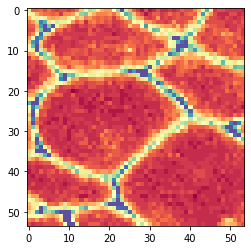

Epoch 83/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2477 - acc: 0.9993 - val_loss: 0.4584 - val_acc: 0.9853

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45839950647901523, 'val_acc': 0.9852554074646989, 'loss': 0.24772467976967819, 'acc': 0.9993070191773439, 'lr': 1e-04}


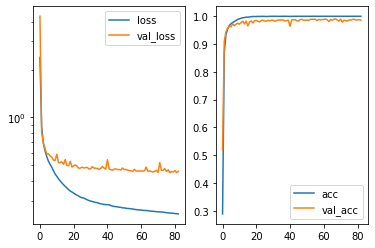

Predicted cell: MatureP1 Probability: [[0.99999344]]
True Cell type: MatureP1
X [[0.6714494]]
True positional value X 0.6851851851851852
Y [[0.63809204]]
True positional value Y 0.6851851851851852
H [[0.26883677]]
True positional value H 0.25925925925925924
W [[0.3257653]]
True positional value W 0.3148148148148148


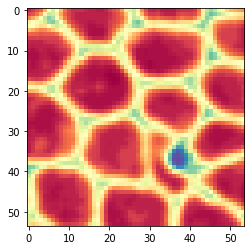

Epoch 84/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2482 - acc: 0.9992 - val_loss: 0.4671 - val_acc: 0.9853

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.46708740621193134, 'val_acc': 0.9852554043259603, 'loss': 0.24815286518676488, 'acc': 0.9991684230128126, 'lr': 1e-04}


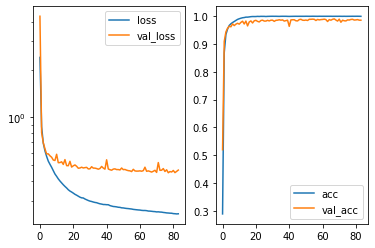

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49090427]]
True positional value X 0.5
Y [[0.33196557]]
True positional value Y 0.3148148148148148
H [[0.5353414]]
True positional value H 0.5370370370370371
W [[0.86127645]]
True positional value W 0.8888888888888888


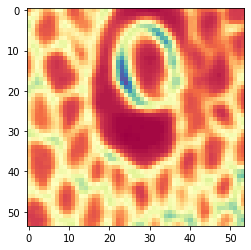

Epoch 85/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2471 - acc: 0.9994 - val_loss: 0.4534 - val_acc: 0.9868

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.453380760988353, 'val_acc': 0.9868351806145458, 'loss': 0.2471302857994042, 'acc': 0.9993624576431563, 'lr': 1e-04}


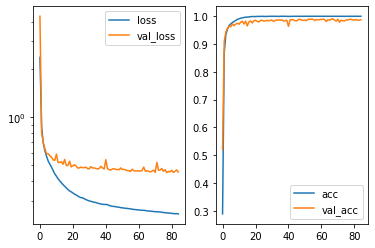

Predicted cell: MatureP1 Probability: [[0.9996137]]
True Cell type: MatureP1
X [[0.49087703]]
True positional value X 0.5
Y [[0.37136036]]
True positional value Y 0.3148148148148148
H [[0.36370134]]
True positional value H 0.37037037037037035
W [[0.25772578]]
True positional value W 0.2222222222222222


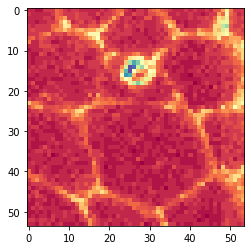

Epoch 86/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2471 - acc: 0.9994 - val_loss: 0.4471 - val_acc: 0.9874

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4471485271712489, 'val_acc': 0.9873617772305244, 'loss': 0.24705917361352564, 'acc': 0.9993901768760626, 'lr': 1e-04}


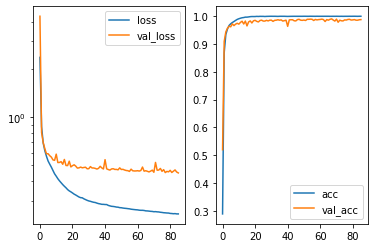

Predicted cell: MatureP1 Probability: [[0.9927609]]
True Cell type: MatureP1
X [[0.47054052]]
True positional value X 0.5
Y [[0.5295554]]
True positional value Y 0.5
H [[0.31080207]]
True positional value H 0.3333333333333333
W [[0.23724923]]
True positional value W 0.2037037037037037


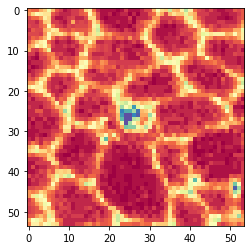

Epoch 87/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2462 - acc: 0.9993 - val_loss: 0.4479 - val_acc: 0.9884

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.447873679696415, 'val_acc': 0.9884149652521758, 'loss': 0.24618366328611754, 'acc': 0.9993347384102501, 'lr': 1e-04}


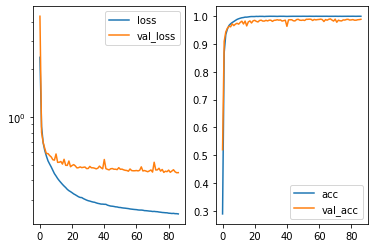

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.34182668]]
True positional value X 0.3148148148148148
Y [[0.6693626]]
True positional value Y 0.6851851851851852
H [[0.5739919]]
True positional value H 0.7407407407407407
W [[0.6067797]]
True positional value W 0.6666666666666666


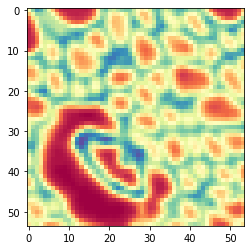

Epoch 88/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2456 - acc: 0.9993 - val_loss: 0.4634 - val_acc: 0.9858

Epoch 00088: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4633765831440609, 'val_acc': 0.9857819967674167, 'loss': 0.24558222121199214, 'acc': 0.9993070191773439, 'lr': 1e-04}


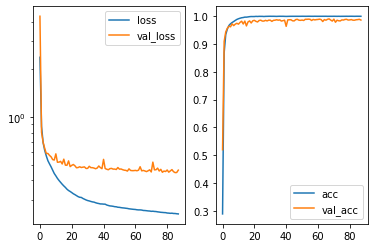

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.70015323]]
True positional value X 0.6851851851851852
Y [[0.62081575]]
True positional value Y 0.5
H [[0.86548483]]
True positional value H 0.9074074074074074
W [[0.8715054]]
True positional value W 0.9629629629629629


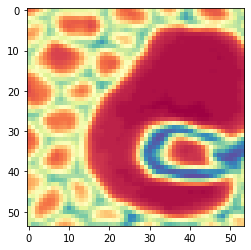

Epoch 89/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2451 - acc: 0.9994 - val_loss: 0.4473 - val_acc: 0.9879

Epoch 00089: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4473434086533959, 'val_acc': 0.9878883696719808, 'loss': 0.2450501858685812, 'acc': 0.9993624576431563, 'lr': 1e-04}


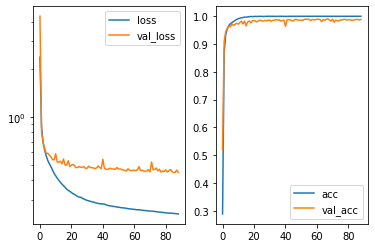

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.31915253]]
True positional value X 0.3148148148148148
Y [[0.32767254]]
True positional value Y 0.3148148148148148
H [[0.28669256]]
True positional value H 0.35185185185185186
W [[0.23829055]]
True positional value W 0.35185185185185186


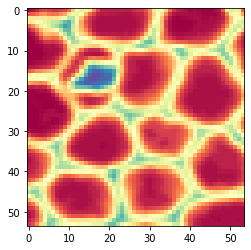

Epoch 90/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2448 - acc: 0.9994 - val_loss: 0.4483 - val_acc: 0.9879

Epoch 00090: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44829427392436305, 'val_acc': 0.9878883728107193, 'loss': 0.2447696802855754, 'acc': 0.9994178961089688, 'lr': 1e-04}


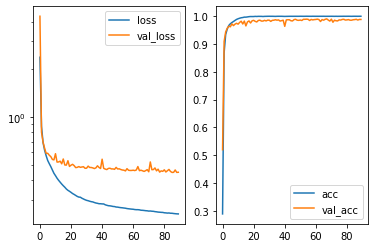

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49418443]]
True positional value X 0.5
Y [[0.5179806]]
True positional value Y 0.5
H [[0.37552014]]
True positional value H 0.48148148148148145
W [[0.36689365]]
True positional value W 0.5185185185185185


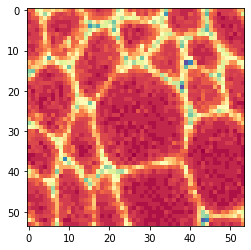

Epoch 91/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2442 - acc: 0.9994 - val_loss: 0.4609 - val_acc: 0.9821

Epoch 00091: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4609080086010516, 'val_acc': 0.982095849677222, 'loss': 0.24424908239213097, 'acc': 0.9994456153418751, 'lr': 1e-04}


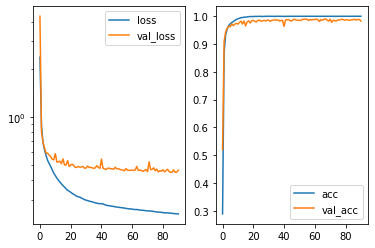

Predicted cell: MacroCheate Probability: [[0.9994917]]
True Cell type: MacroCheate
X [[0.657007]]
True positional value X 0.6851851851851852
Y [[0.36424947]]
True positional value Y 0.3148148148148148
H [[0.5695445]]
True positional value H 0.5185185185185185
W [[0.6512177]]
True positional value W 0.5555555555555556


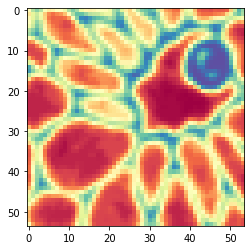

Epoch 92/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2440 - acc: 0.9994 - val_loss: 0.4593 - val_acc: 0.9863

Epoch 00092: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4592880497423205, 'val_acc': 0.9863085923476116, 'loss': 0.24399668876420819, 'acc': 0.9993901768760626, 'lr': 1e-04}


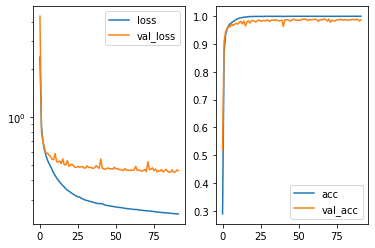

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.6926564]]
True positional value X 0.6851851851851852
Y [[0.69111365]]
True positional value Y 0.6851851851851852
H [[0.3017192]]
True positional value H 0.3148148148148148
W [[0.23317489]]
True positional value W 0.2777777777777778


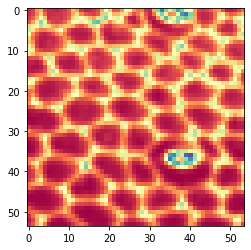

Epoch 93/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2434 - acc: 0.9994 - val_loss: 0.4437 - val_acc: 0.9884

Epoch 00093: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.443723899148024, 'val_acc': 0.9884149652521758, 'loss': 0.24342720568252782, 'acc': 0.9994456153418751, 'lr': 1e-04}


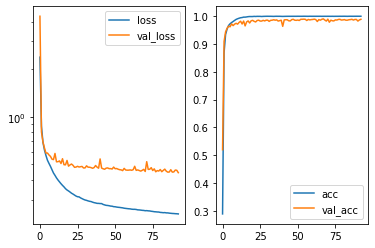

Predicted cell: MacroCheate Probability: [[0.9999875]]
True Cell type: MacroCheate
X [[0.49154133]]
True positional value X 0.5
Y [[0.3150196]]
True positional value Y 0.3148148148148148
H [[0.43210477]]
True positional value H 0.48148148148148145
W [[0.5392711]]
True positional value W 0.5185185185185185


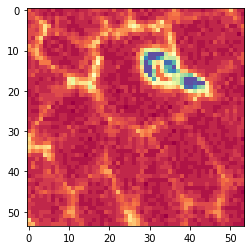

Epoch 94/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2434 - acc: 0.9993 - val_loss: 0.4450 - val_acc: 0.9884

Epoch 00094: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4450445447927277, 'val_acc': 0.9884149621134372, 'loss': 0.24340983985043746, 'acc': 0.9992792998981761, 'lr': 1e-04}


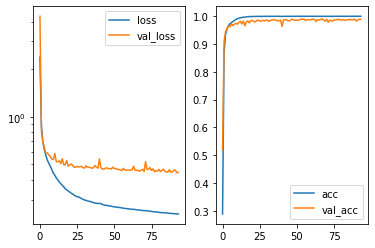

Predicted cell: NonMatureP1 Probability: [[0.99999917]]
True Cell type: NonMatureP1
X [[0.6544516]]
True positional value X 0.6851851851851852
Y [[0.7465699]]
True positional value Y 0.6851851851851852
H [[0.42654362]]
True positional value H 0.4444444444444444
W [[0.34721678]]
True positional value W 0.35185185185185186


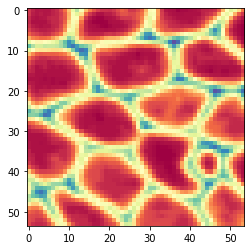

Epoch 95/250
36076/36076 [==============================] - 16s 452us/step - loss: 0.2424 - acc: 0.9992 - val_loss: 0.4525 - val_acc: 0.9868

Epoch 00095: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.45253579989428766, 'val_acc': 0.9868351816503295, 'loss': 0.24236701824591317, 'acc': 0.9992238614786252, 'lr': 1e-04}


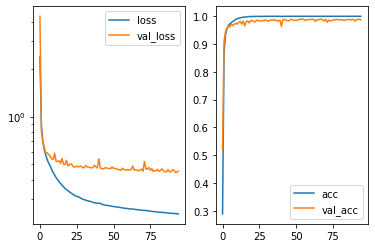

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4762683]]
True positional value X 0.5
Y [[0.707176]]
True positional value Y 0.6851851851851852
H [[0.7004454]]
True positional value H 0.7777777777777778
W [[0.63048893]]
True positional value W 0.7592592592592593


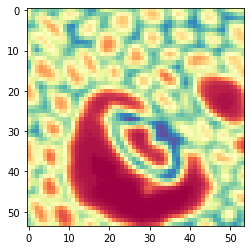

Epoch 96/250
36076/36076 [==============================] - 16s 451us/step - loss: 0.2418 - acc: 0.9992 - val_loss: 0.4436 - val_acc: 0.9879

Epoch 00096: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44356484872030544, 'val_acc': 0.9878883696719808, 'loss': 0.2417981988003915, 'acc': 0.9992238614323636, 'lr': 1e-04}


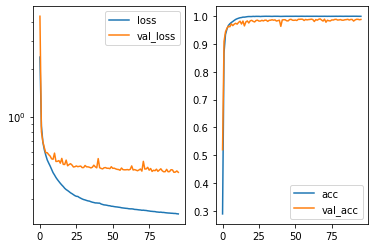

Predicted cell: MatureP1 Probability: [[0.99638677]]
True Cell type: MatureP1
X [[0.32540274]]
True positional value X 0.3148148148148148
Y [[0.4794789]]
True positional value Y 0.5
H [[0.2625574]]
True positional value H 0.25925925925925924
W [[0.2194524]]
True positional value W 0.25925925925925924


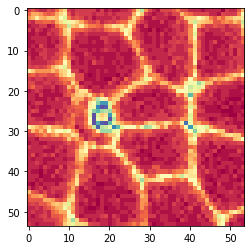

Epoch 97/250
36076/36076 [==============================] - 16s 454us/step - loss: 0.2416 - acc: 0.9993 - val_loss: 0.4443 - val_acc: 0.9884

Epoch 00097: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.444265326429129, 'val_acc': 0.9884149621134372, 'loss': 0.24162327566020225, 'acc': 0.9992792999444376, 'lr': 1e-04}


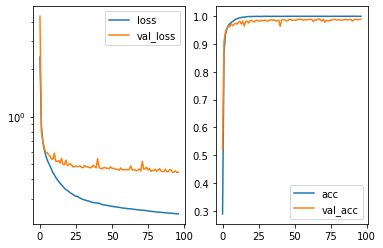

Predicted cell: Normal Probability: [[0.999912]]
True Cell type: Normal
X [[0.48864186]]
True positional value X 0.5
Y [[0.5520198]]
True positional value Y 0.5
H [[0.5309874]]
True positional value H 0.5555555555555556
W [[0.37273028]]
True positional value W 0.3148148148148148


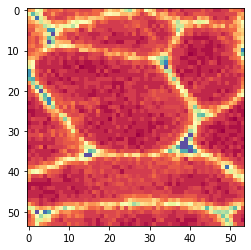

Epoch 98/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2413 - acc: 0.9995 - val_loss: 0.4459 - val_acc: 0.9884

Epoch 00098: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44585038405333527, 'val_acc': 0.9884149610776535, 'loss': 0.24132939469643794, 'acc': 0.9995287730405938, 'lr': 1e-04}


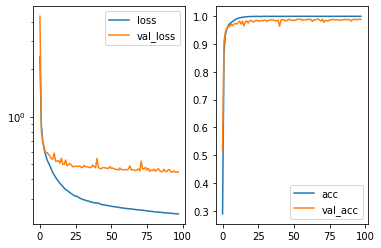

Predicted cell: MatureP1 Probability: [[0.99993193]]
True Cell type: MatureP1
X [[0.5235597]]
True positional value X 0.5
Y [[0.510153]]
True positional value Y 0.5
H [[0.38123947]]
True positional value H 0.4074074074074074
W [[0.40320003]]
True positional value W 0.3888888888888889


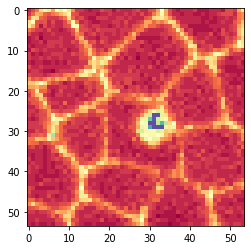

Epoch 99/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2408 - acc: 0.9994 - val_loss: 0.4525 - val_acc: 0.9826

Epoch 00099: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4525232454737341, 'val_acc': 0.9826224358412013, 'loss': 0.2408240400812343, 'acc': 0.9993901768760626, 'lr': 1e-04}


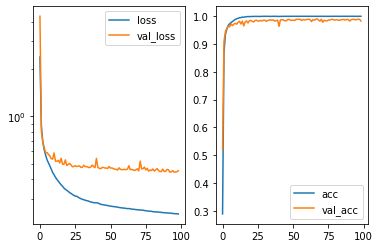

Predicted cell: MacroCheate Probability: [[0.99999833]]
True Cell type: MacroCheate
X [[0.6562521]]
True positional value X 0.6851851851851852
Y [[0.49999768]]
True positional value Y 0.5
H [[0.712553]]
True positional value H 0.7407407407407407
W [[0.5148437]]
True positional value W 0.5


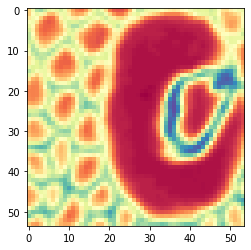

Epoch 100/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2402 - acc: 0.9994 - val_loss: 0.4395 - val_acc: 0.9884

Epoch 00100: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.439513821235263, 'val_acc': 0.9884149621134372, 'loss': 0.2401754790467848, 'acc': 0.9993624576431563, 'lr': 1e-04}


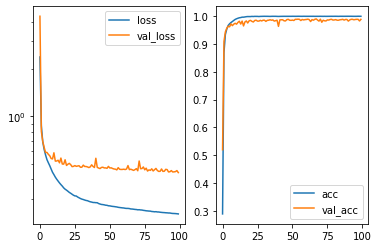

Predicted cell: MacroCheate Probability: [[0.99988353]]
True Cell type: MacroCheate
X [[0.5908226]]
True positional value X 0.6851851851851852
Y [[0.7049068]]
True positional value Y 0.6851851851851852
H [[0.33198065]]
True positional value H 0.42592592592592593
W [[0.42302406]]
True positional value W 0.4074074074074074


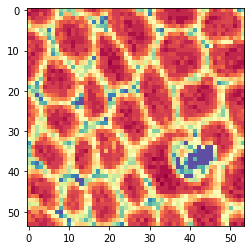

Epoch 101/250
36076/36076 [==============================] - 16s 453us/step - loss: 0.2398 - acc: 0.9993 - val_loss: 0.4406 - val_acc: 0.9879

Epoch 00101: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44055997094962396, 'val_acc': 0.9878883728107193, 'loss': 0.23978590481673048, 'acc': 0.9992515807115314, 'lr': 1e-04}


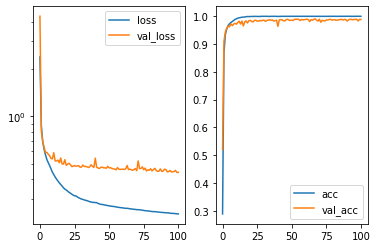

Predicted cell: MatureP1 Probability: [[0.99995935]]
True Cell type: MatureP1
X [[0.3155335]]
True positional value X 0.3148148148148148
Y [[0.3134656]]
True positional value Y 0.3148148148148148
H [[0.3842194]]
True positional value H 0.4444444444444444
W [[0.25948423]]
True positional value W 0.2777777777777778


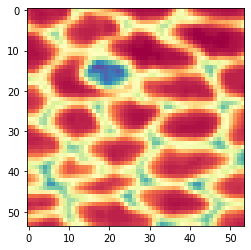

Epoch 102/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2399 - acc: 0.9992 - val_loss: 0.4381 - val_acc: 0.9900

Epoch 00102: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4381346624734968, 'val_acc': 0.9899947425765449, 'loss': 0.2398724459712264, 'acc': 0.9992238614786252, 'lr': 1e-04}


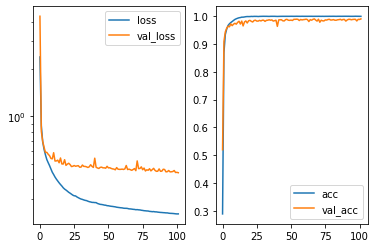

Predicted cell: Normal Probability: [[0.9999993]]
True Cell type: Normal
X [[0.4920767]]
True positional value X 0.5
Y [[0.49503192]]
True positional value Y 0.5
H [[0.34917027]]
True positional value H 0.3888888888888889
W [[0.28410563]]
True positional value W 0.3148148148148148


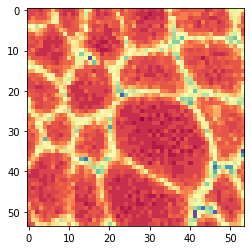

Epoch 103/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2391 - acc: 0.9993 - val_loss: 0.4433 - val_acc: 0.9884

Epoch 00103: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4432901671649658, 'val_acc': 0.9884149652521758, 'loss': 0.2391125062594777, 'acc': 0.9993347384102501, 'lr': 1e-04}


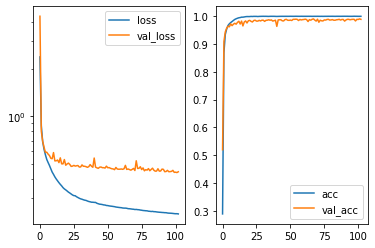

Predicted cell: NonMatureP1 Probability: [[0.6891965]]
True Cell type: NonMatureP1
X [[0.62255174]]
True positional value X 0.685185185185181
Y [[0.57251817]]
True positional value Y 0.6851851851851852
H [[0.27038538]]
True positional value H 0.3333333333333333
W [[0.33993804]]
True positional value W 0.3888888888888889


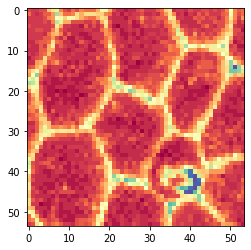

Epoch 104/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2383 - acc: 0.9993 - val_loss: 0.4562 - val_acc: 0.9831

Epoch 00104: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4562484840771724, 'val_acc': 0.9831490376988733, 'loss': 0.23826143521270726, 'acc': 0.9993347384102501, 'lr': 1e-04}


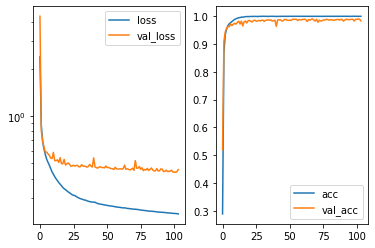

Predicted cell: Normal Probability: [[0.9954057]]
True Cell type: MacroCheate
X [[0.34319437]]
True positional value X 0.3148148148148148
Y [[0.54782176]]
True positional value Y 0.5
H [[0.28584707]]
True positional value H 0.2037037037037037
W [[0.3328467]]
True positional value W 0.3148148148148148


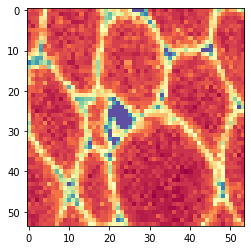

Epoch 105/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2387 - acc: 0.9993 - val_loss: 0.4397 - val_acc: 0.9874

Epoch 00105: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43967922509752366, 'val_acc': 0.9873617772305244, 'loss': 0.23867017263345225, 'acc': 0.9993347384102501, 'lr': 1e-04}


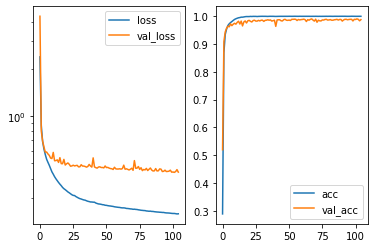

Predicted cell: NonMatureP1 Probability: [[0.9999336]]
True Cell type: NonMatureP1
X [[0.29640105]]
True positional value X 0.3148148148148148
Y [[0.701897]]
True positional value Y 0.6851851851851852
H [[0.28646252]]
True positional value H 0.2962962962962963
W [[0.33384466]]
True positional value W 0.35185185185185186


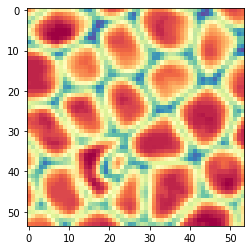

Epoch 106/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2371 - acc: 0.9993 - val_loss: 0.4457 - val_acc: 0.9889

Epoch 00106: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4456925683425815, 'val_acc': 0.9889415576936321, 'loss': 0.23712191170395208, 'acc': 0.9992515807115314, 'lr': 1e-04}


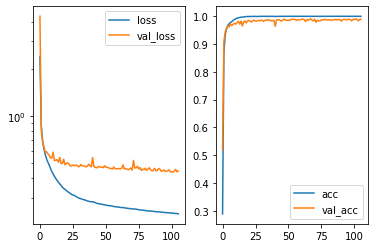

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.70825124]]
True positional value X 0.6851851851851852
Y [[0.51363456]]
True positional value Y 0.5
H [[0.79860926]]
True positional value H 0.7407407407407407
W [[0.74607503]]
True positional value W 0.7407407407407407


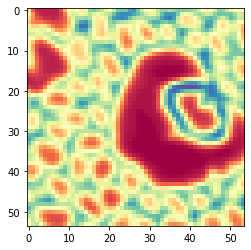

Epoch 107/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2372 - acc: 0.9994 - val_loss: 0.4432 - val_acc: 0.9874

Epoch 00107: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44318854912385747, 'val_acc': 0.9873617772305244, 'loss': 0.23715594500114917, 'acc': 0.9994178961089688, 'lr': 1e-04}


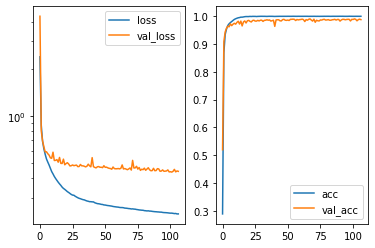

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.31109202]]
True positional value X 0.3148148148148148
Y [[0.31373733]]
True positional value Y 0.3148148148148148
H [[0.3462946]]
True positional value H 0.46296296296296297
W [[0.32311815]]
True positional value W 0.35185185185185186


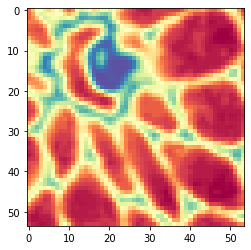

Epoch 108/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2374 - acc: 0.9994 - val_loss: 0.4438 - val_acc: 0.9847

Epoch 00108: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4437738750532089, 'val_acc': 0.9847288150232425, 'loss': 0.23735139716496315, 'acc': 0.9993624576431563, 'lr': 1e-04}


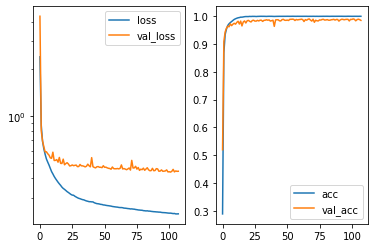

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3288897]]
True positional value X 0.3148148148148148
Y [[0.66853213]]
True positional value Y 0.6851851851851852
H [[0.44066104]]
True positional value H 0.48148148148148145
W [[0.48834246]]
True positional value W 0.6111111111111112


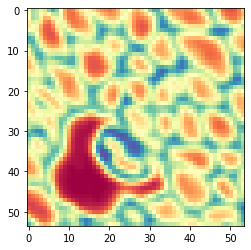

Epoch 109/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2362 - acc: 0.9993 - val_loss: 0.4367 - val_acc: 0.9905

Epoch 00109: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43668419756721105, 'val_acc': 0.9905213350180013, 'loss': 0.2362250153684526, 'acc': 0.9993070191773439, 'lr': 1e-04}


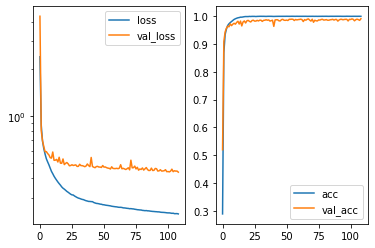

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3223585]]
True positional value X 0.3148148148148148
Y [[0.2947921]]
True positional value Y 0.3148148148148148
H [[0.4088736]]
True positional value H 0.46296296296296297
W [[0.42324963]]
True positional value W 0.5555555555555556


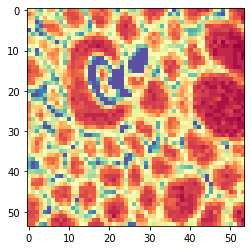

Epoch 110/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2355 - acc: 0.9993 - val_loss: 0.4363 - val_acc: 0.9895

Epoch 00110: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4363149961024099, 'val_acc': 0.9894681501350885, 'loss': 0.2354942850701652, 'acc': 0.9992792999444376, 'lr': 1e-04}


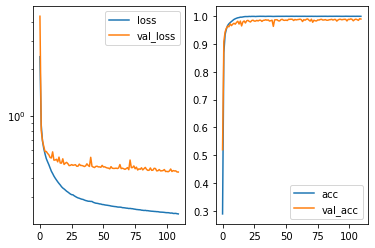

Predicted cell: MacroCheate Probability: [[0.9986891]]
True Cell type: MacroCheate
X [[0.4993569]]
True positional value X 0.5
Y [[0.68377686]]
True positional value Y 0.6851851851851852
H [[0.3699405]]
True positional value H 0.37037037037037035
W [[0.35321245]]
True positional value W 0.46296296296296297


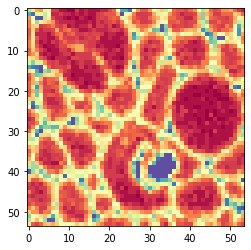

Epoch 111/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2355 - acc: 0.9994 - val_loss: 0.4385 - val_acc: 0.9868

Epoch 00111: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4384605903384433, 'val_acc': 0.9868351879278066, 'loss': 0.23554274658727756, 'acc': 0.9993901768760626, 'lr': 1e-04}


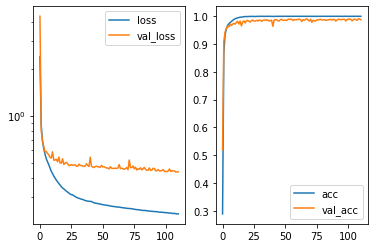

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.63508034]]
True positional value X 0.6851851851851852
Y [[0.31412858]]
True positional value Y 0.3148148148148148
H [[0.5406067]]
True positional value H 0.5185185185185185
W [[0.6538796]]
True positional value W 0.5


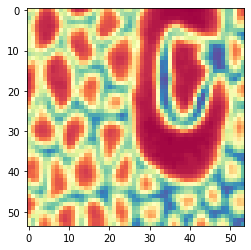

Epoch 112/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2350 - acc: 0.9994 - val_loss: 0.4449 - val_acc: 0.9884

Epoch 00112: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4448532563344374, 'val_acc': 0.9884149652521758, 'loss': 0.23497058294712672, 'acc': 0.9994456153418751, 'lr': 1e-04}


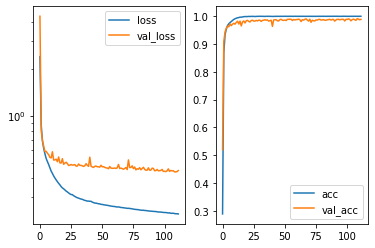

Predicted cell: MatureP1 Probability: [[0.999997]]
True Cell type: MatureP1
X [[0.46508846]]
True positional value X 0.5
Y [[0.3387462]]
True positional value Y 0.3148148148148148
H [[0.2364262]]
True positional value H 0.2962962962962963
W [[0.2667503]]
True positional value W 0.3333333333333333


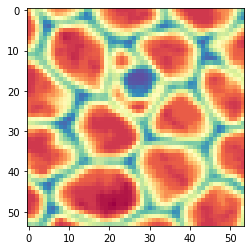

Epoch 113/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2347 - acc: 0.9994 - val_loss: 0.4366 - val_acc: 0.9895

Epoch 00113: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4365829185412519, 'val_acc': 0.9894681501350885, 'loss': 0.23469989198031904, 'acc': 0.9994456153418751, 'lr': 1e-04}


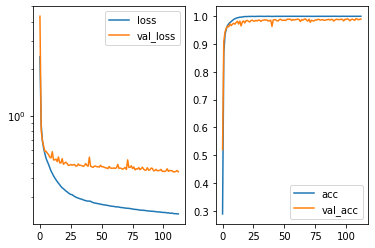

Predicted cell: Normal Probability: [[0.99927896]]
True Cell type: Normal
X [[0.50653785]]
True positional value X 0.5
Y [[0.5347922]]
True positional value Y 0.5
H [[0.38179466]]
True positional value H 0.3333333333333333
W [[0.38436872]]
True positional value W 0.4074074074074074


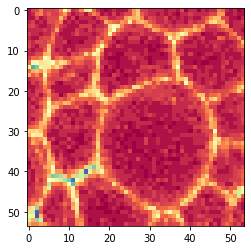

Epoch 114/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2343 - acc: 0.9995 - val_loss: 0.4330 - val_acc: 0.9889

Epoch 00114: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4329880776375203, 'val_acc': 0.9889415576936321, 'loss': 0.234338454313164, 'acc': 0.9994733345747814, 'lr': 1e-04}


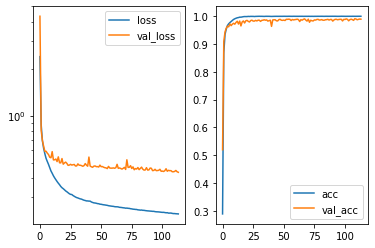

Predicted cell: MatureP1 Probability: [[0.9999397]]
True Cell type: MatureP1
X [[0.47634804]]
True positional value X 0.5
Y [[0.4937865]]
True positional value Y 0.5
H [[0.47223198]]
True positional value H 0.5
W [[0.44165224]]
True positional value W 0.4444444444444444


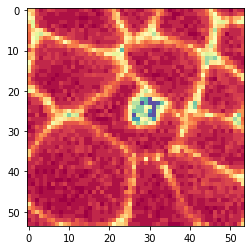

Epoch 115/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2337 - acc: 0.9994 - val_loss: 0.4416 - val_acc: 0.9884

Epoch 00115: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44164047663685146, 'val_acc': 0.9884149610776535, 'loss': 0.2337294161296602, 'acc': 0.9994178961089688, 'lr': 1e-04}


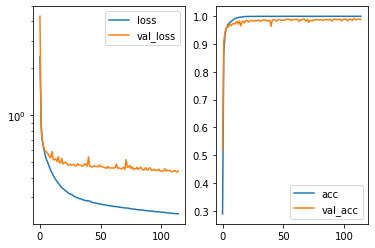

Predicted cell: Normal Probability: [[0.99999905]]
True Cell type: Normal
X [[0.5233489]]
True positional value X 0.5
Y [[0.491627]]
True positional value Y 0.5
H [[0.36301982]]
True positional value H 0.37037037037037035
W [[0.3438812]]
True positional value W 0.3888888888888889


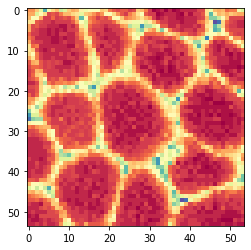

Epoch 116/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2336 - acc: 0.9993 - val_loss: 0.4438 - val_acc: 0.9858

Epoch 00116: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4438200841268908, 'val_acc': 0.9857819967674167, 'loss': 0.23361388525263355, 'acc': 0.9993347384102501, 'lr': 1e-04}


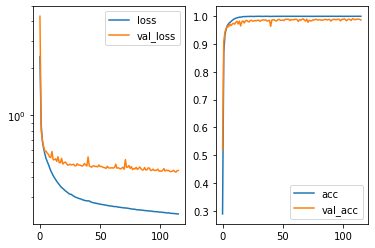

Predicted cell: Normal Probability: [[0.9999751]]
True Cell type: Normal
X [[0.48165676]]
True positional value X 0.5
Y [[0.55554324]]
True positional value Y 0.5
H [[0.4077162]]
True positional value H 0.3148148148148148
W [[0.35948536]]
True positional value W 0.3148148148148148


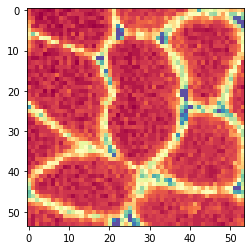

Epoch 117/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2330 - acc: 0.9994 - val_loss: 0.4386 - val_acc: 0.9884

Epoch 00117: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4385698956210341, 'val_acc': 0.9884149652521758, 'loss': 0.23296695092470132, 'acc': 0.9993901768760626, 'lr': 1e-04}


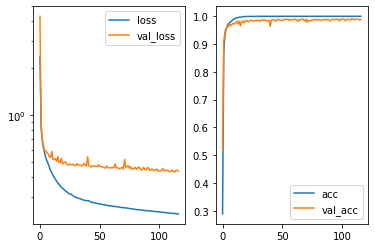

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.48619196]]
True positional value X 0.5
Y [[0.6660515]]
True positional value Y 0.6851851851851852
H [[0.46375728]]
True positional value H 0.46296296296296297
W [[0.47200668]]
True positional value W 0.3888888888888889


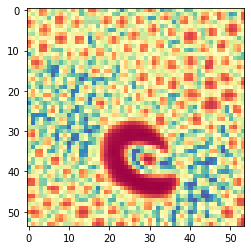

Epoch 118/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2329 - acc: 0.9993 - val_loss: 0.4452 - val_acc: 0.9874

Epoch 00118: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4451731908566202, 'val_acc': 0.9873617803692629, 'loss': 0.2328821532919793, 'acc': 0.9993070191773439, 'lr': 1e-04}


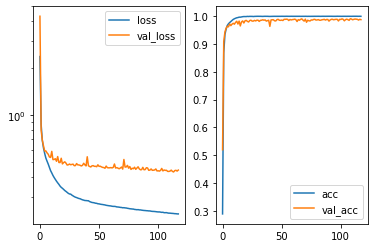

Predicted cell: Normal Probability: [[0.99999356]]
True Cell type: Normal
X [[0.5013414]]
True positional value X 0.5
Y [[0.5271876]]
True positional value Y 0.5
H [[0.16097268]]
True positional value H 0.16666666666666666
W [[0.2554716]]
True positional value W 0.18518518518518517


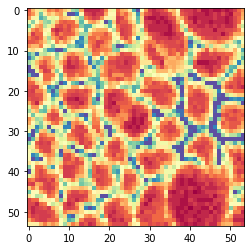

Epoch 119/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2326 - acc: 0.9992 - val_loss: 0.4310 - val_acc: 0.9900

Epoch 00119: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4310306145869913, 'val_acc': 0.9899947425765449, 'loss': 0.23258066728210514, 'acc': 0.999196142245719, 'lr': 1e-04}


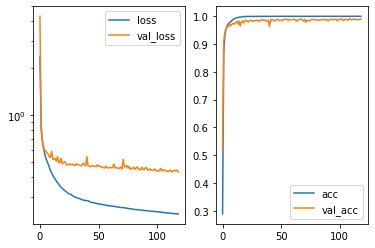

Predicted cell: MatureP1 Probability: [[0.9983181]]
True Cell type: MatureP1
X [[0.3159917]]
True positional value X 0.3148148148148148
Y [[0.5693384]]
True positional value Y 0.5
H [[0.31704444]]
True positional value H 0.2777777777777778
W [[0.33266094]]
True positional value W 0.2962962962962963


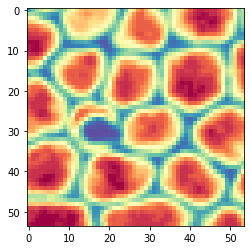

Epoch 120/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2323 - acc: 0.9994 - val_loss: 0.4339 - val_acc: 0.9895

Epoch 00120: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43391149247427124, 'val_acc': 0.9894681501350885, 'loss': 0.23228465304834403, 'acc': 0.9993901768760626, 'lr': 1e-04}


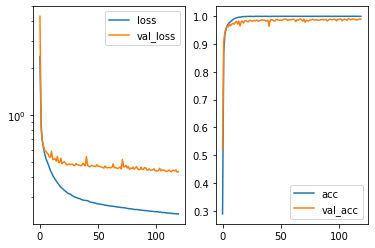

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5098149]]
True positional value X 0.5
Y [[0.5549175]]
True positional value Y 0.5
H [[0.3916667]]
True positional value H 0.42592592592592593
W [[0.35678402]]
True positional value W 0.35185185185185186


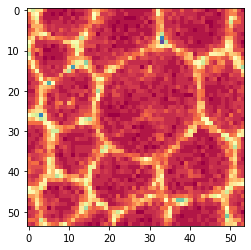

Epoch 121/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2317 - acc: 0.9994 - val_loss: 0.4380 - val_acc: 0.9874

Epoch 00121: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43796477161187003, 'val_acc': 0.9873617772305244, 'loss': 0.23173454077568428, 'acc': 0.9993901768760626, 'lr': 1e-04}


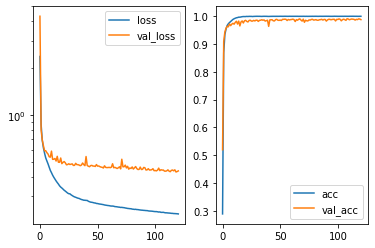

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3037197]]
True positional value X 0.3148148148148148
Y [[0.5128454]]
True positional value Y 0.5
H [[0.5150992]]
True positional value H 0.48148148148148145
W [[0.5511717]]
True positional value W 0.5370370370370371


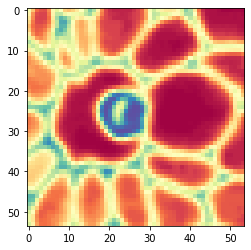

Epoch 122/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2316 - acc: 0.9993 - val_loss: 0.4376 - val_acc: 0.9884

Epoch 00122: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43759488767545557, 'val_acc': 0.9884149621134372, 'loss': 0.23164440938309272, 'acc': 0.9992792999444376, 'lr': 1e-04}


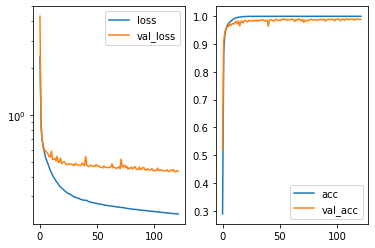

Predicted cell: Normal Probability: [[0.99078065]]
True Cell type: Normal
X [[0.47040525]]
True positional value X 0.5
Y [[0.53202033]]
True positional value Y 0.5
H [[0.42691916]]
True positional value H 0.8518518518518519
W [[0.26623487]]
True positional value W 0.35185185185185186


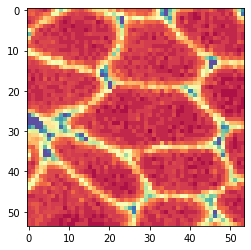

Epoch 123/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2309 - acc: 0.9994 - val_loss: 0.4351 - val_acc: 0.9879

Epoch 00123: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4351382743941915, 'val_acc': 0.9878883728107193, 'loss': 0.2309360154000364, 'acc': 0.9993624576431563, 'lr': 1e-04}


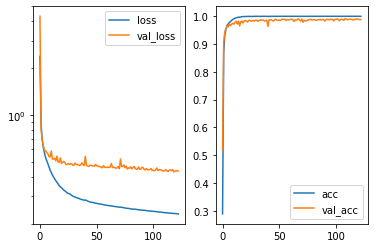

Predicted cell: NonMatureP1 Probability: [[0.99999905]]
True Cell type: NonMatureP1
X [[0.6460735]]
True positional value X 0.6851851851851852
Y [[0.6946262]]
True positional value Y 0.6851851851851852
H [[0.3008536]]
True positional value H 0.2962962962962963
W [[0.3440664]]
True positional value W 0.4074074074074074


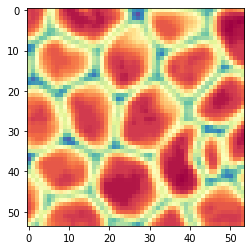

Epoch 124/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2304 - acc: 0.9993 - val_loss: 0.4320 - val_acc: 0.9895

Epoch 00124: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4320218344309758, 'val_acc': 0.98946814699635, 'loss': 0.23039880174036922, 'acc': 0.9993347384102501, 'lr': 1e-04}


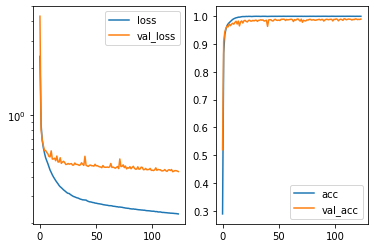

Predicted cell: NonMatureP1 Probability: [[0.9961933]]
True Cell type: NonMatureP1
X [[0.4273681]]
True positional value X 0.5
Y [[0.3903146]]
True positional value Y 0.3148148148148148
H [[0.25680882]]
True positional value H 0.2222222222222222
W [[0.3306801]]
True positional value W 0.4074074074074074


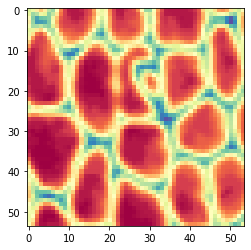

Epoch 125/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2304 - acc: 0.9994 - val_loss: 0.4391 - val_acc: 0.9884

Epoch 00125: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4390827156230611, 'val_acc': 0.9884149610776535, 'loss': 0.23039724476315757, 'acc': 0.9993624576431563, 'lr': 1e-04}


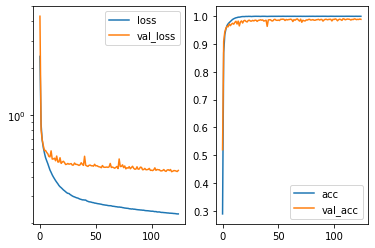

Predicted cell: MacroCheate Probability: [[0.99988496]]
True Cell type: MacroCheate
X [[0.3145734]]
True positional value X 0.3148148148148148
Y [[0.5178002]]
True positional value Y 0.5
H [[0.49912548]]
True positional value H 0.5185185185185185
W [[0.83822703]]
True positional value W 0.8703703703703703


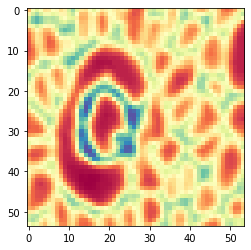

Epoch 126/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2303 - acc: 0.9992 - val_loss: 0.4389 - val_acc: 0.9879

Epoch 00126: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43891564628335916, 'val_acc': 0.9878883696719808, 'loss': 0.23029380239904, 'acc': 0.9991684230128126, 'lr': 1e-04}


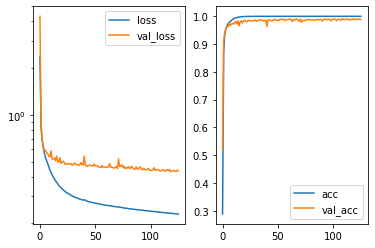

Predicted cell: MatureP1 Probability: [[0.9996012]]
True Cell type: MatureP1
X [[0.47805923]]
True positional value X 0.5
Y [[0.29521024]]
True positional value Y 0.3148148148148148
H [[0.37189156]]
True positional value H 0.35185185185185186
W [[0.32195836]]
True positional value W 0.3148148148148148


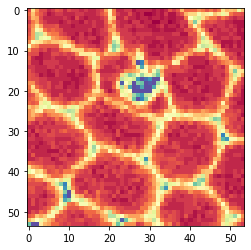

Epoch 127/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2299 - acc: 0.9993 - val_loss: 0.4862 - val_acc: 0.9789

Epoch 00127: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4862383320621593, 'val_acc': 0.9789362887510066, 'loss': 0.22985854259165392, 'acc': 0.9992792999444376, 'lr': 1e-04}


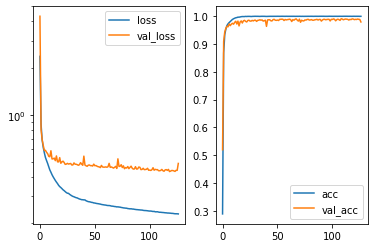

Predicted cell: MatureP1 Probability: [[0.9999956]]
True Cell type: MatureP1
X [[0.72801065]]
True positional value X 0.6851851851851852
Y [[0.71095043]]
True positional value Y 0.6851851851851852
H [[0.42278826]]
True positional value H 0.4074074074074074
W [[0.38604182]]
True positional value W 0.3888888888888889


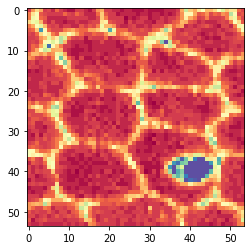

Epoch 128/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2293 - acc: 0.9993 - val_loss: 0.4289 - val_acc: 0.9889

Epoch 00128: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4289347574923025, 'val_acc': 0.9889415576936321, 'loss': 0.22931590585271644, 'acc': 0.9992792999444376, 'lr': 1e-04}


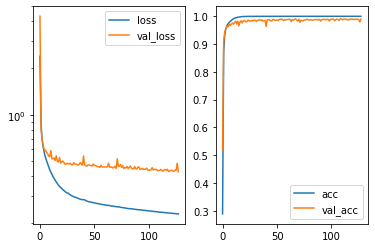

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33643287]]
True positional value X 0.3148148148148148
Y [[0.719395]]
True positional value Y 0.6851851851851852
H [[0.5383625]]
True positional value H 0.5555555555555556
W [[0.39736485]]
True positional value W 0.4444444444444444


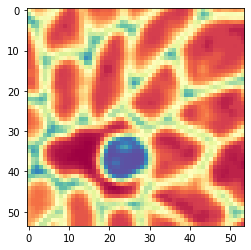

Epoch 129/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2283 - acc: 0.9994 - val_loss: 0.4341 - val_acc: 0.9863

Epoch 00129: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4341399249056253, 'val_acc': 0.9863085954863502, 'loss': 0.22828146326084572, 'acc': 0.9993901768760626, 'lr': 1e-04}


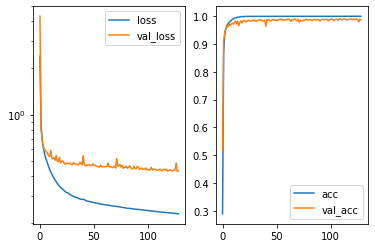

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.55480087]]
True positional value X 0.5
Y [[0.51012194]]
True positional value Y 0.5
H [[0.744566]]
True positional value H 0.7222222222222222
W [[0.4956868]]
True positional value W 0.42592592592592593


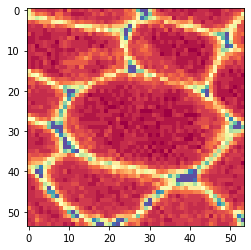

Epoch 130/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2288 - acc: 0.9993 - val_loss: 0.4339 - val_acc: 0.9874

Epoch 00130: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43391695984292494, 'val_acc': 0.9873617772305244, 'loss': 0.22877105279942417, 'acc': 0.9993070191773439, 'lr': 1e-04}


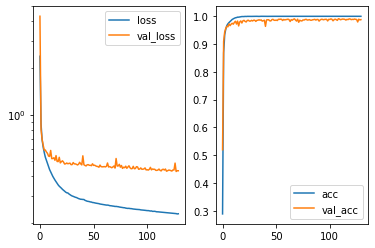

Predicted cell: MacroCheate Probability: [[0.9999993]]
True Cell type: MacroCheate
X [[0.6796819]]
True positional value X 0.6851851851851852
Y [[0.29439133]]
True positional value Y 0.3148148148148148
H [[0.40230748]]
True positional value H 0.46296296296296297
W [[0.8010793]]
True positional value W 0.8333333333333334


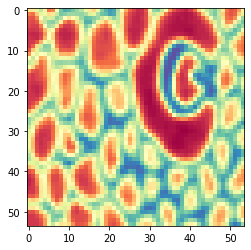

Epoch 131/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2279 - acc: 0.9993 - val_loss: 0.4331 - val_acc: 0.9895

Epoch 00131: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43309579338444854, 'val_acc': 0.9894681501350885, 'loss': 0.22791686495645228, 'acc': 0.9992792999444376, 'lr': 1e-04}


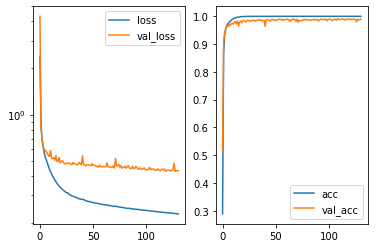

Predicted cell: MacroCheate Probability: [[0.99999225]]
True Cell type: MacroCheate
X [[0.3073911]]
True positional value X 0.3148148148148148
Y [[0.31754798]]
True positional value Y 0.3148148148148148
H [[0.39402872]]
True positional value H 0.4074074074074074
W [[0.50425017]]
True positional value W 0.6111111111111112


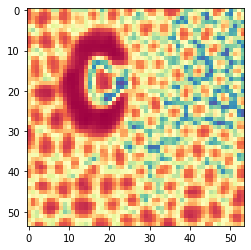

Epoch 132/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2276 - acc: 0.9994 - val_loss: 0.4326 - val_acc: 0.9884

Epoch 00132: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43256109978036544, 'val_acc': 0.9884149621134372, 'loss': 0.22764153497514367, 'acc': 0.9993624576431563, 'lr': 1e-04}


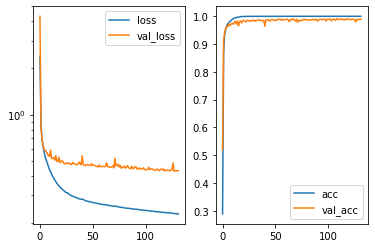

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.28961754]]
True positional value X 0.3148148148148148
Y [[0.66618955]]
True positional value Y 0.6851851851851852
H [[0.5460969]]
True positional value H 0.18518518518518517
W [[0.43649036]]
True positional value W 0.18518518518518517


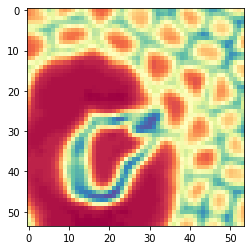

Epoch 133/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2273 - acc: 0.9994 - val_loss: 0.4284 - val_acc: 0.9889

Epoch 00133: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4284043162041052, 'val_acc': 0.9889415576936321, 'loss': 0.22728483603751135, 'acc': 0.9993901768760626, 'lr': 1e-04}


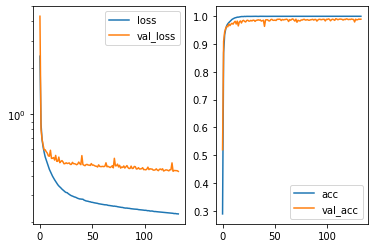

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.457357]]
True positional value X 0.5
Y [[0.537764]]
True positional value Y 0.5
H [[0.21177755]]
True positional value H 0.3148148148148148
W [[0.39279985]]
True positional value W 0.3888888888888889


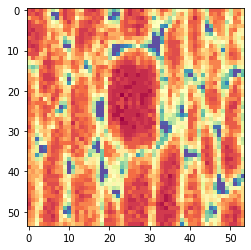

Epoch 134/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2267 - acc: 0.9993 - val_loss: 0.4291 - val_acc: 0.9889

Epoch 00134: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4291338974108754, 'val_acc': 0.9889415545548935, 'loss': 0.22665827965469393, 'acc': 0.9993070191773439, 'lr': 1e-04}


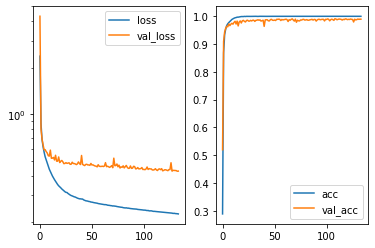

Predicted cell: MatureP1 Probability: [[0.99999523]]
True Cell type: MatureP1
X [[0.67971766]]
True positional value X 0.6851851851851852
Y [[0.67607313]]
True positional value Y 0.6851851851851852
H [[0.41553915]]
True positional value H 0.5
W [[0.43984842]]
True positional value W 0.5


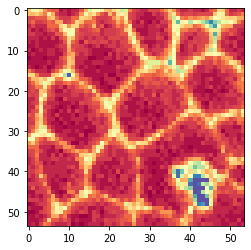

Epoch 135/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2263 - acc: 0.9994 - val_loss: 0.4246 - val_acc: 0.9895

Epoch 00135: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4246058620045598, 'val_acc': 0.9894681501350885, 'loss': 0.22632253127882415, 'acc': 0.9993624576431563, 'lr': 1e-04}


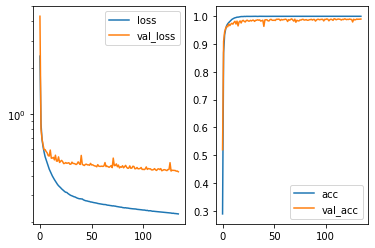

Predicted cell: MatureP1 Probability: [[0.9999902]]
True Cell type: MatureP1
X [[0.699751]]
True positional value X 0.6851851851851852
Y [[0.67708313]]
True positional value Y 0.6851851851851852
H [[0.34970015]]
True positional value H 0.35185185185185186
W [[0.2817384]]
True positional value W 0.3148148148148148


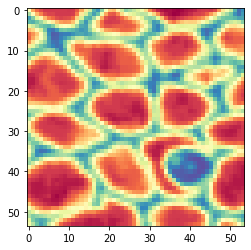

Epoch 136/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2266 - acc: 0.9994 - val_loss: 0.4365 - val_acc: 0.9858

Epoch 00136: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43652440663260367, 'val_acc': 0.9857819967674167, 'loss': 0.22659795761128224, 'acc': 0.9993624576431563, 'lr': 1e-04}


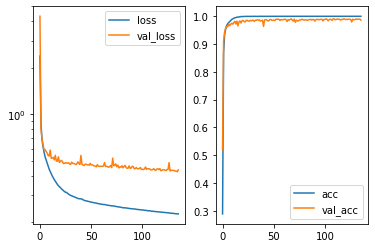

Predicted cell: NonMatureP1 Probability: [[0.9999975]]
True Cell type: NonMatureP1
X [[0.5272101]]
True positional value X 0.5
Y [[0.52228224]]
True positional value Y 0.5
H [[0.41714594]]
True positional value H 0.4074074074074074
W [[0.30728513]]
True positional value W 0.2962962962962963


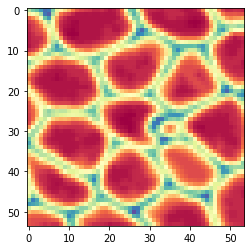

Epoch 137/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2255 - acc: 0.9993 - val_loss: 0.4279 - val_acc: 0.9889

Epoch 00137: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42790674940418605, 'val_acc': 0.9889415566578484, 'loss': 0.22549064630731958, 'acc': 0.9993070191773439, 'lr': 1e-04}


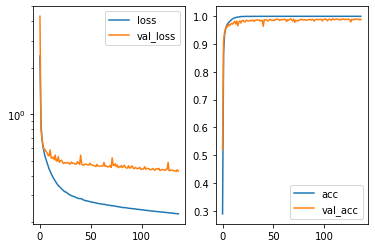

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.5073594]]
True positional value X 0.5
Y [[0.30166298]]
True positional value Y 0.3148148148148148
H [[0.31049222]]
True positional value H 0.2777777777777778
W [[0.38863873]]
True positional value W 0.35185185185185186


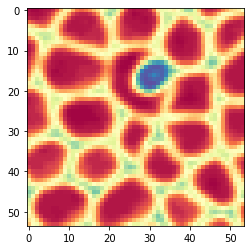

Epoch 138/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2250 - acc: 0.9994 - val_loss: 0.4273 - val_acc: 0.9905

Epoch 00138: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.427250375930983, 'val_acc': 0.9905213350180013, 'loss': 0.22498344643964036, 'acc': 0.9993624576431563, 'lr': 1e-04}


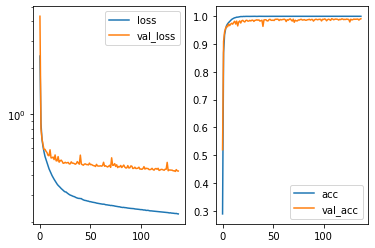

Predicted cell: MatureP1 Probability: [[0.99998975]]
True Cell type: MatureP1
X [[0.5227921]]
True positional value X 0.5
Y [[0.64575803]]
True positional value Y 0.6851851851851852
H [[0.26684633]]
True positional value H 0.37037037037037035
W [[0.34207287]]
True positional value W 0.42592592592592593


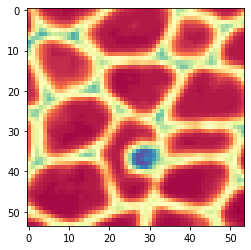

Epoch 139/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2258 - acc: 0.9992 - val_loss: 0.4281 - val_acc: 0.9868

Epoch 00139: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42805471860966976, 'val_acc': 0.9868351879278066, 'loss': 0.2258111639269467, 'acc': 0.9992238614786252, 'lr': 1e-04}


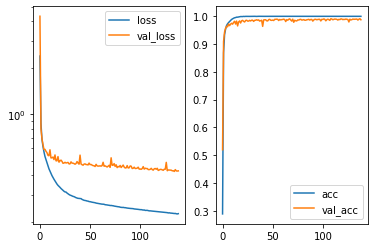

Predicted cell: MatureP1 Probability: [[0.99928075]]
True Cell type: MatureP1
X [[0.66240597]]
True positional value X 0.6851851851851852
Y [[0.39902833]]
True positional value Y 0.3148148148148148
H [[0.46423805]]
True positional value H 0.3333333333333333
W [[0.4495991]]
True positional value W 0.3888888888888889


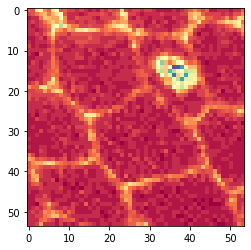

Epoch 140/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2252 - acc: 0.9993 - val_loss: 0.4274 - val_acc: 0.9900

Epoch 00140: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42735989310981226, 'val_acc': 0.9899947425765449, 'loss': 0.22516281447444686, 'acc': 0.9992792999444376, 'lr': 1e-04}


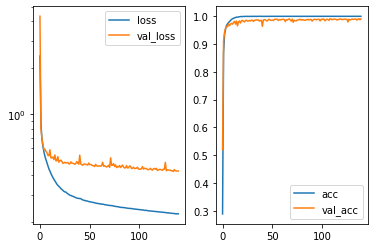

Predicted cell: MatureP1 Probability: [[0.99979097]]
True Cell type: MatureP1
X [[0.6684205]]
True positional value X 0.6851851851851852
Y [[0.39805764]]
True positional value Y 0.3148148148148148
H [[0.46446472]]
True positional value H 0.3333333333333333
W [[0.44773477]]
True positional value W 0.3888888888888889


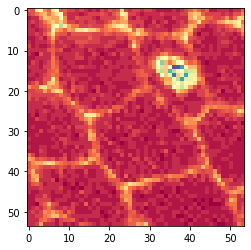

Epoch 141/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2249 - acc: 0.9992 - val_loss: 0.4237 - val_acc: 0.9900

Epoch 00141: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42366292189145605, 'val_acc': 0.9899947425765449, 'loss': 0.22488543425428192, 'acc': 0.999196142245719, 'lr': 1e-04}


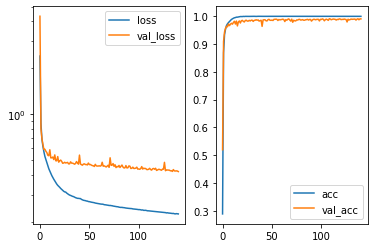

Predicted cell: MatureP1 Probability: [[0.9999975]]
True Cell type: MatureP1
X [[0.6483035]]
True positional value X 0.6851851851851852
Y [[0.46955866]]
True positional value Y 0.5
H [[0.31430522]]
True positional value H 0.37037037037037035
W [[0.32694072]]
True positional value W 0.3148148148148148


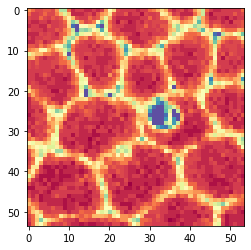

Epoch 142/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2241 - acc: 0.9994 - val_loss: 0.4261 - val_acc: 0.9879

Epoch 00142: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42606214848614293, 'val_acc': 0.9878883696719808, 'loss': 0.22411483118137296, 'acc': 0.9993624575968949, 'lr': 1e-04}


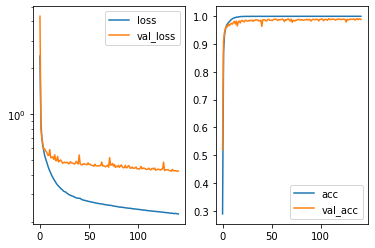

Predicted cell: MatureP1 Probability: [[0.99971133]]
True Cell type: MatureP1
X [[0.33195096]]
True positional value X 0.3148148148148148
Y [[0.6868067]]
True positional value Y 0.6851851851851852
H [[0.33549827]]
True positional value H 0.37037037037037035
W [[0.4563192]]
True positional value W 0.5


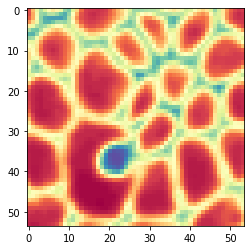

Epoch 143/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2237 - acc: 0.9994 - val_loss: 0.4402 - val_acc: 0.9868

Epoch 00143: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44016247275253545, 'val_acc': 0.9868351816503295, 'loss': 0.2237474168879532, 'acc': 0.9993901768760626, 'lr': 1e-04}


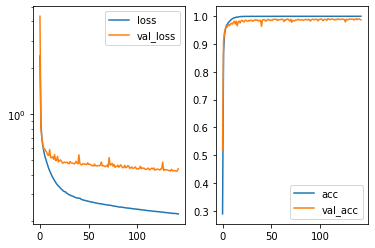

Predicted cell: Normal Probability: [[0.99996126]]
True Cell type: Normal
X [[0.4982919]]
True positional value X 0.5
Y [[0.5237256]]
True positional value Y 0.5
H [[0.22418675]]
True positional value H 0.2037037037037037
W [[0.29290476]]
True positional value W 0.25925925925925924


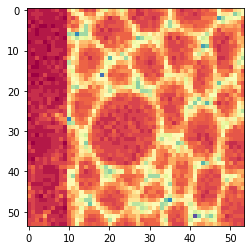

Epoch 144/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2232 - acc: 0.9993 - val_loss: 0.4285 - val_acc: 0.9889

Epoch 00144: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4284851969135881, 'val_acc': 0.9889415545548935, 'loss': 0.2231831039656344, 'acc': 0.9993347384102501, 'lr': 1e-04}


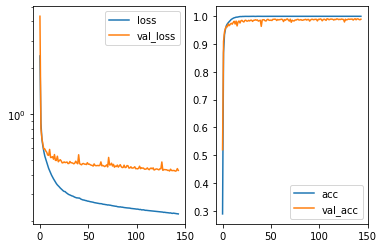

Predicted cell: MatureP1 Probability: [[0.99999464]]
True Cell type: MatureP1
X [[0.68799806]]
True positional value X 0.6851851851851852
Y [[0.54707044]]
True positional value Y 0.5
H [[0.26466766]]
True positional value H 0.2777777777777778
W [[0.27016455]]
True positional value W 0.24074074074074073


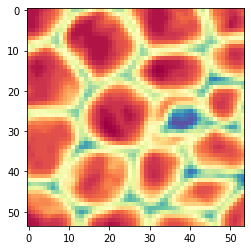

Epoch 145/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2231 - acc: 0.9992 - val_loss: 0.4441 - val_acc: 0.9837

Epoch 00145: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.44413429071804045, 'val_acc': 0.9836756248986364, 'loss': 0.2230706117094746, 'acc': 0.9992238614323636, 'lr': 1e-04}


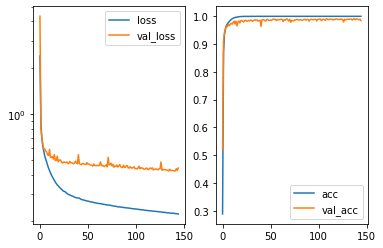

Predicted cell: NonMatureP1 Probability: [[0.9993056]]
True Cell type: NonMatureP1
X [[0.4808986]]
True positional value X 0.5
Y [[0.38801354]]
True positional value Y 0.3148148148148148
H [[0.22781937]]
True positional value H 0.2777777777777778
W [[0.35372332]]
True positional value W 0.42592592592592593


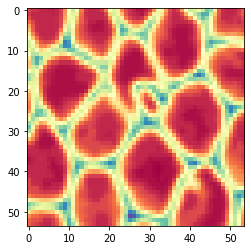

Epoch 146/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2224 - acc: 0.9995 - val_loss: 0.4304 - val_acc: 0.9868

Epoch 00146: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.43039906589905796, 'val_acc': 0.9868351879278066, 'loss': 0.2223523015662167, 'acc': 0.9994733345747814, 'lr': 1e-04}


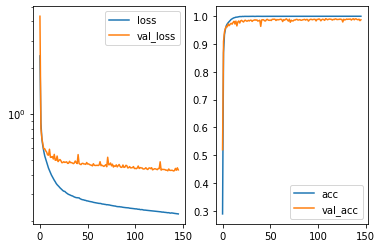

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.693473]]
True positional value X 0.6851851851851852
Y [[0.7025255]]
True positional value Y 0.6851851851851852
H [[0.26045108]]
True positional value H 0.24074074074074073
W [[0.2854659]]
True positional value W 0.3333333333333333


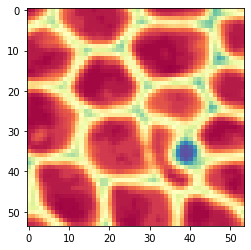

Epoch 147/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2225 - acc: 0.9994 - val_loss: 0.4209 - val_acc: 0.9895

Epoch 00147: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4208895501147577, 'val_acc': 0.9894681501350885, 'loss': 0.22251209112906326, 'acc': 0.9993901768760626, 'lr': 1e-04}


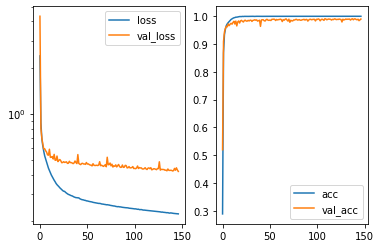

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.46499678]]
True positional value X 0.5
Y [[0.5175632]]
True positional value Y 0.5
H [[0.42623758]]
True positional value H 0.42592592592592593
W [[0.5851498]]
True positional value W 0.6296296296296297


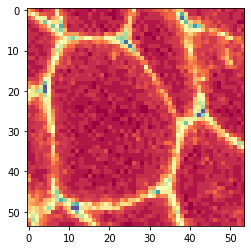

Epoch 148/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2216 - acc: 0.9993 - val_loss: 0.4282 - val_acc: 0.9889

Epoch 00148: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4282365853438696, 'val_acc': 0.9889415576936321, 'loss': 0.221562618404802, 'acc': 0.9993347384102501, 'lr': 1e-04}


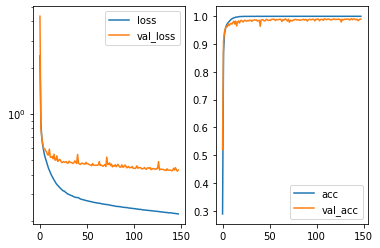

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.28935423]]
True positional value X 0.3148148148148148
Y [[0.67363274]]
True positional value Y 0.6851851851851841
H [[0.61129344]]
True positional value H 0.6111111111111112
W [[0.6952704]]
True positional value W 0.6481481481481481


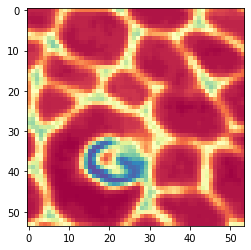

Epoch 149/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2216 - acc: 0.9994 - val_loss: 0.4235 - val_acc: 0.9889

Epoch 00149: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42351988963920106, 'val_acc': 0.9889415545548935, 'loss': 0.22158659564865865, 'acc': 0.9993901768760626, 'lr': 1e-04}


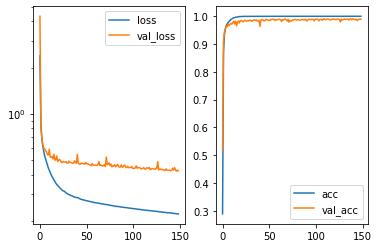

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: Normal
X [[0.33262104]]
True positional value X 0.5
Y [[0.7093576]]
True positional value Y 0.5
H [[0.46208176]]
True positional value H 0.4074074074074074
W [[0.3748101]]
True positional value W 0.2962962962962963


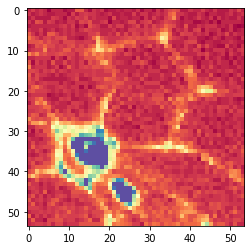

Epoch 150/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2216 - acc: 0.9992 - val_loss: 0.4209 - val_acc: 0.9895

Epoch 00150: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42087745967822804, 'val_acc': 0.9894681501350885, 'loss': 0.22160493578934884, 'acc': 0.9992238614786252, 'lr': 1e-04}


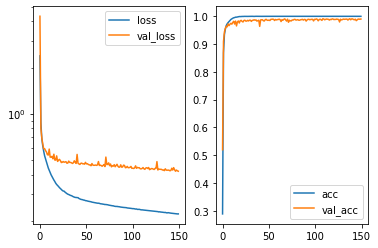

Predicted cell: MacroCheate Probability: [[0.99995625]]
True Cell type: MacroCheate
X [[0.5563813]]
True positional value X 0.5
Y [[0.30231553]]
True positional value Y 0.3148148148148148
H [[0.3470907]]
True positional value H 0.3888888888888889
W [[0.3825406]]
True positional value W 0.3888888888888889


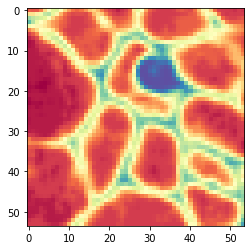

Epoch 151/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2207 - acc: 0.9993 - val_loss: 0.4184 - val_acc: 0.9900

Epoch 00151: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4184404518523927, 'val_acc': 0.9899947425765449, 'loss': 0.22071622532637186, 'acc': 0.9992792999444376, 'lr': 1e-04}


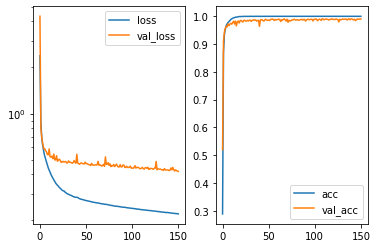

Predicted cell: MatureP1 Probability: [[0.9999683]]
True Cell type: MatureP1
X [[0.32254952]]
True positional value X 0.3148148148148148
Y [[0.6999246]]
True positional value Y 0.6851851851851852
H [[0.33016562]]
True positional value H 0.2777777777777778
W [[0.31708762]]
True positional value W 0.3148148148148148


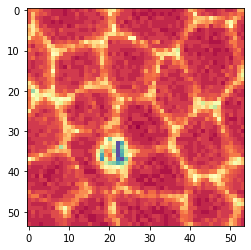

Epoch 152/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2206 - acc: 0.9993 - val_loss: 0.4256 - val_acc: 0.9889

Epoch 00152: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4256024319853137, 'val_acc': 0.9889415576936321, 'loss': 0.22060210845372355, 'acc': 0.9993070191773439, 'lr': 1e-04}


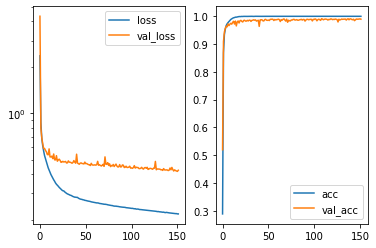

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5106368]]
True positional value X 0.5
Y [[0.53768736]]
True positional value Y 0.5
H [[0.4783526]]
True positional value H 0.48148148148148145
W [[0.45279434]]
True positional value W 0.5740740740740741


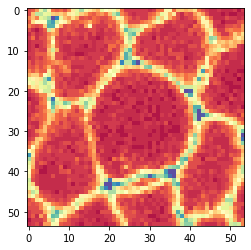

Epoch 153/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2206 - acc: 0.9993 - val_loss: 0.4228 - val_acc: 0.9900

Epoch 00153: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4227709207269881, 'val_acc': 0.9899947425765449, 'loss': 0.22062908188342942, 'acc': 0.9993070191773439, 'lr': 1e-04}


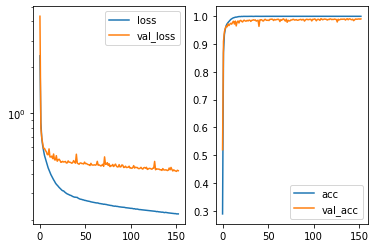

Predicted cell: MatureP1 Probability: [[0.9992478]]
True Cell type: MatureP1
X [[0.35422724]]
True positional value X 0.3148148148148148
Y [[0.34850317]]
True positional value Y 0.3148148148148148
H [[0.5110865]]
True positional value H 0.5370370370370371
W [[0.39314586]]
True positional value W 0.4444444444444444


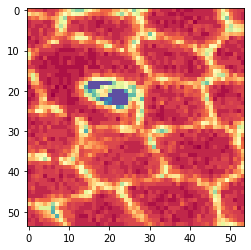

Epoch 154/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2203 - acc: 0.9993 - val_loss: 0.4172 - val_acc: 0.9905

Epoch 00154: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4172056033901317, 'val_acc': 0.9905213350180013, 'loss': 0.22028453754822264, 'acc': 0.9992515807115314, 'lr': 1e-04}


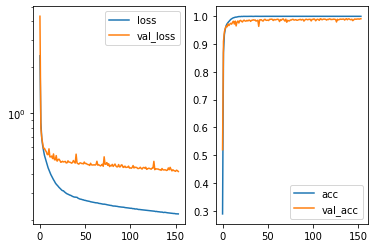

Predicted cell: MatureP1 Probability: [[0.9997882]]
True Cell type: MatureP1
X [[0.49525464]]
True positional value X 0.5
Y [[0.31027764]]
True positional value Y 0.3148148148148148
H [[0.16946712]]
True positional value H 0.09259259259259259
W [[0.1676763]]
True positional value W 0.1111111111111111


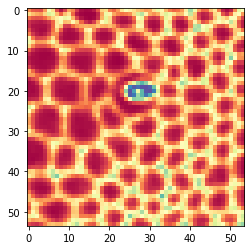

Epoch 155/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2195 - acc: 0.9994 - val_loss: 0.4259 - val_acc: 0.9868

Epoch 00155: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4259409257272095, 'val_acc': 0.9868351879278066, 'loss': 0.21945338094759204, 'acc': 0.9993624576431563, 'lr': 1e-04}


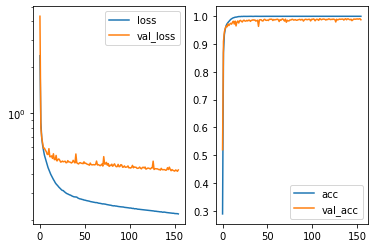

Predicted cell: MatureP1 Probability: [[0.98676205]]
True Cell type: MatureP1
X [[0.35772824]]
True positional value X 0.3148148148148148
Y [[0.3765973]]
True positional value Y 0.3148148148148148
H [[0.2755698]]
True positional value H 0.25925925925925924
W [[0.3392608]]
True positional value W 0.25925925925925924


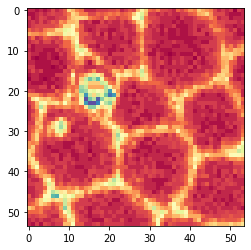

Epoch 156/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2195 - acc: 0.9993 - val_loss: 0.4162 - val_acc: 0.9905

Epoch 00156: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41617786297363757, 'val_acc': 0.9905213350180013, 'loss': 0.21945124801794777, 'acc': 0.9992515807115314, 'lr': 1e-04}


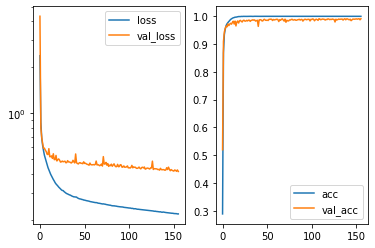

Predicted cell: NonMatureP1 Probability: [[0.9999548]]
True Cell type: NonMatureP1
X [[0.32211]]
True positional value X 0.3148148148148148
Y [[0.32984033]]
True positional value Y 0.3148148148148148
H [[0.35694385]]
True positional value H 0.3888888888888889
W [[0.3247016]]
True positional value W 0.3148148148148148


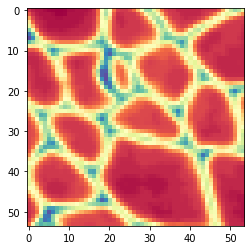

Epoch 157/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2186 - acc: 0.9993 - val_loss: 0.4172 - val_acc: 0.9889

Epoch 00157: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4171520165545869, 'val_acc': 0.9889415545548935, 'loss': 0.21862961009205914, 'acc': 0.9993070191773439, 'lr': 1e-04}


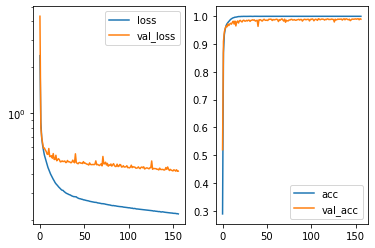

Predicted cell: NonMatureP1 Probability: [[0.99997497]]
True Cell type: NonMatureP1
X [[0.3184882]]
True positional value X 0.3148148148148148
Y [[0.49240136]]
True positional value Y 0.5
H [[0.5180112]]
True positional value H 0.46296296296296297
W [[0.33791897]]
True positional value W 0.3333333333333333


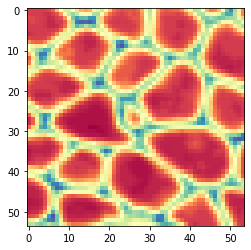

Epoch 158/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2188 - acc: 0.9994 - val_loss: 0.4240 - val_acc: 0.9884

Epoch 00158: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4239886172543456, 'val_acc': 0.988414964216392, 'loss': 0.21878702747562742, 'acc': 0.9993901768760626, 'lr': 1e-04}


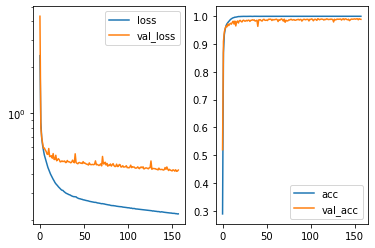

Predicted cell: Normal Probability: [[0.9985258]]
True Cell type: Normal
X [[0.5457015]]
True positional value X 0.5
Y [[0.46386233]]
True positional value Y 0.5
H [[0.22959411]]
True positional value H 0.2962962962962963
W [[0.33574498]]
True positional value W 0.3333333333333333


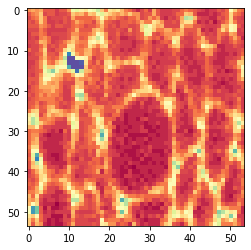

Epoch 159/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2189 - acc: 0.9993 - val_loss: 0.4212 - val_acc: 0.9884

Epoch 00159: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4211687927750803, 'val_acc': 0.9884149652521758, 'loss': 0.21887626304391455, 'acc': 0.9992792999444376, 'lr': 1e-04}


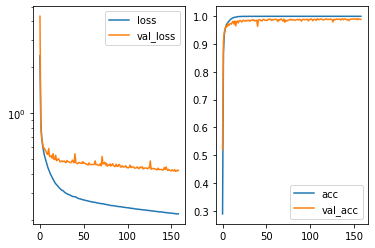

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3049816]]
True positional value X 0.3148148148148148
Y [[0.48907962]]
True positional value Y 0.5
H [[0.35977444]]
True positional value H 0.3888888888888889
W [[0.41438392]]
True positional value W 0.48148148148148145


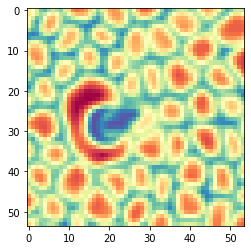

Epoch 160/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2179 - acc: 0.9994 - val_loss: 0.4384 - val_acc: 0.9863

Epoch 00160: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4384241061282196, 'val_acc': 0.9863085933833954, 'loss': 0.21792043493722968, 'acc': 0.9993901768760626, 'lr': 1e-04}


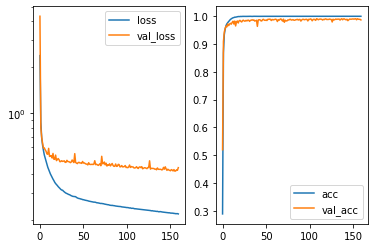

Predicted cell: MacroCheate Probability: [[0.99941003]]
True Cell type: MacroCheate
X [[0.66544604]]
True positional value X 0.6851851851851852
Y [[0.29976094]]
True positional value Y 0.3148148148148148
H [[0.51338714]]
True positional value H 0.6111111111111112
W [[0.4777834]]
True positional value W 0.6111111111111112


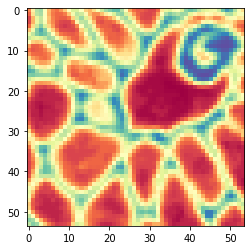

Epoch 161/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2174 - acc: 0.9994 - val_loss: 0.4185 - val_acc: 0.9895

Epoch 00161: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41847951070706174, 'val_acc': 0.98946814699635, 'loss': 0.21738512056843248, 'acc': 0.9994456153418751, 'lr': 1e-04}


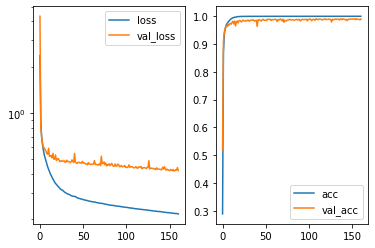

Predicted cell: MatureP1 Probability: [[0.99997306]]
True Cell type: MatureP1
X [[0.2910758]]
True positional value X 0.3148148148148148
Y [[0.32974604]]
True positional value Y 0.3148148148148148
H [[0.25511307]]
True positional value H 0.25925925925925924
W [[0.2234428]]
True positional value W 0.24074074074074073


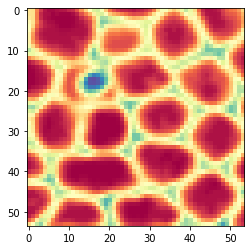

Epoch 162/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2173 - acc: 0.9993 - val_loss: 0.4267 - val_acc: 0.9831

Epoch 00162: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4267327182226397, 'val_acc': 0.9831490314213962, 'loss': 0.21731536078312957, 'acc': 0.9992792999444376, 'lr': 1e-04}


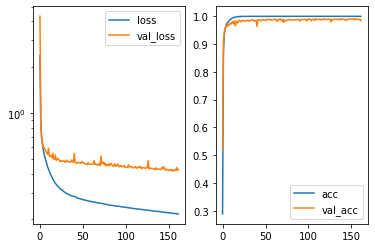

Predicted cell: Normal Probability: [[0.99998796]]
True Cell type: Normal
X [[0.5231467]]
True positional value X 0.5
Y [[0.46820486]]
True positional value Y 0.5
H [[0.26564896]]
True positional value H 0.35185185185185186
W [[0.37558937]]
True positional value W 0.2777777777777778


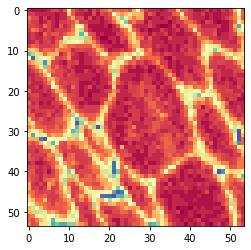

Epoch 163/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2169 - acc: 0.9995 - val_loss: 0.4160 - val_acc: 0.9889

Epoch 00163: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4159544409576876, 'val_acc': 0.9889415576936321, 'loss': 0.2168910201977224, 'acc': 0.9995287730405938, 'lr': 1e-04}


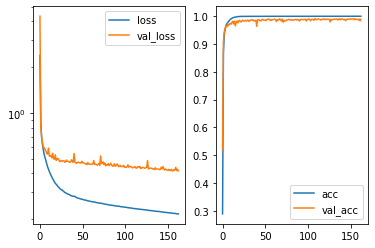

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.5403928]]
True positional value X 0.5
Y [[0.5233221]]
True positional value Y 0.5
H [[0.5995644]]
True positional value H 0.5925925925925926
W [[0.36477813]]
True positional value W 0.3333333333333333


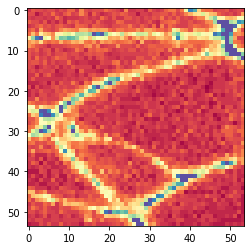

Epoch 164/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2165 - acc: 0.9994 - val_loss: 0.4145 - val_acc: 0.9895

Epoch 00164: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4145367338413813, 'val_acc': 0.9894681501350885, 'loss': 0.21651872508587178, 'acc': 0.9994178961089688, 'lr': 1e-04}


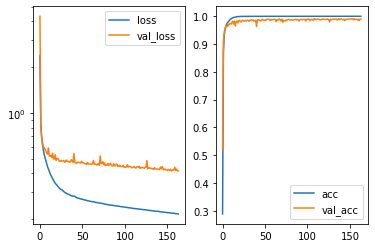

Predicted cell: MatureP1 Probability: [[0.999998]]
True Cell type: MatureP1
X [[0.6794448]]
True positional value X 0.6851851851851852
Y [[0.48758665]]
True positional value Y 0.5
H [[0.38899264]]
True positional value H 0.42592592592592593
W [[0.35626906]]
True positional value W 0.3333333333333333


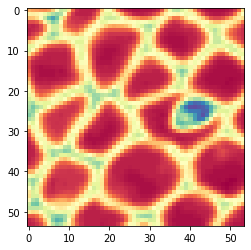

Epoch 165/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2161 - acc: 0.9993 - val_loss: 0.4155 - val_acc: 0.9895

Epoch 00165: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41551008971193204, 'val_acc': 0.98946814699635, 'loss': 0.2160785349156352, 'acc': 0.9992792999444376, 'lr': 1e-04}


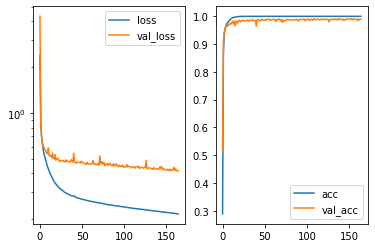

Predicted cell: Normal Probability: [[0.99999714]]
True Cell type: Normal
X [[0.54871833]]
True positional value X 0.5
Y [[0.5082916]]
True positional value Y 0.5
H [[0.16749446]]
True positional value H 0.24074074074074073
W [[0.2942284]]
True positional value W 0.3888888888888889


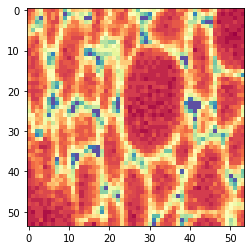

Epoch 166/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2159 - acc: 0.9993 - val_loss: 0.4145 - val_acc: 0.9884

Epoch 00166: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4145096073092882, 'val_acc': 0.9884149621134372, 'loss': 0.2159148587321003, 'acc': 0.9993070191773439, 'lr': 1e-04}


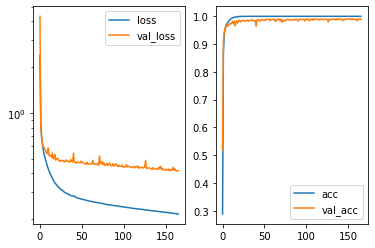

Predicted cell: NonMatureP1 Probability: [[0.99999654]]
True Cell type: NonMatureP1
X [[0.63181835]]
True positional value X 0.6851851851851852
Y [[0.51635045]]
True positional value Y 0.5
H [[0.4050495]]
True positional value H 0.3333333333333333
W [[0.34733152]]
True positional value W 0.3148148148148148


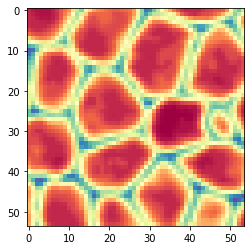

Epoch 167/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2157 - acc: 0.9994 - val_loss: 0.4123 - val_acc: 0.9895

Epoch 00167: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4123175366575182, 'val_acc': 0.9894681501350885, 'loss': 0.2156852327881162, 'acc': 0.9993901768760626, 'lr': 1e-04}


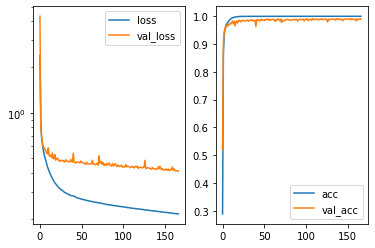

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5019393]]
True positional value X 0.5
Y [[0.59916353]]
True positional value Y 0.5
H [[0.152455]]
True positional value H 0.25925925925925924
W [[0.14744055]]
True positional value W 0.16666666666666666


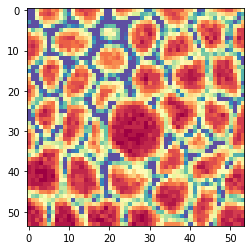

Epoch 168/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2153 - acc: 0.9993 - val_loss: 0.4188 - val_acc: 0.9895

Epoch 00168: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4187647423473015, 'val_acc': 0.9894681459605662, 'loss': 0.2153035188388079, 'acc': 0.9993070191773439, 'lr': 1e-04}


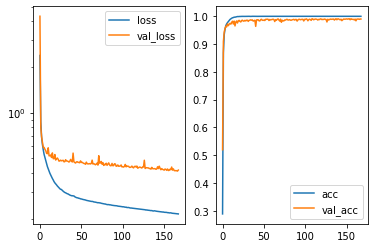

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.684914]]
True positional value X 0.6851851851851852
Y [[0.3634244]]
True positional value Y 0.3148148148148148
H [[0.31422985]]
True positional value H 0.35185185185185186
W [[0.38474166]]
True positional value W 0.42592592592592593


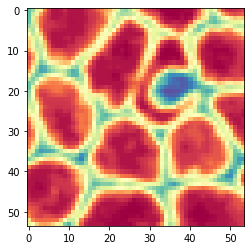

Epoch 169/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2149 - acc: 0.9994 - val_loss: 0.4160 - val_acc: 0.9884

Epoch 00169: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41603447503953184, 'val_acc': 0.9884149652521758, 'loss': 0.21494836943358933, 'acc': 0.9994178961089688, 'lr': 1e-04}


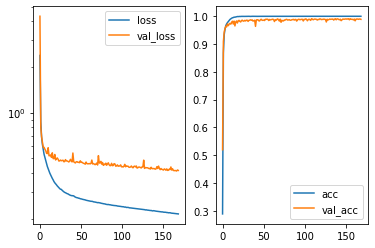

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5078971]]
True positional value X 0.5
Y [[0.48640352]]
True positional value Y 0.5
H [[0.27926332]]
True positional value H 0.25925925925925924
W [[0.34373945]]
True positional value W 0.3888888888888889


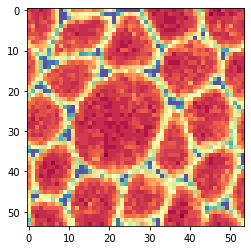

Epoch 170/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2146 - acc: 0.9993 - val_loss: 0.4178 - val_acc: 0.9863

Epoch 00170: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41777423640939676, 'val_acc': 0.9863085923476116, 'loss': 0.21464114123588787, 'acc': 0.9992515807115314, 'lr': 1e-04}


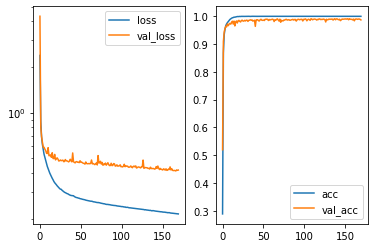

Predicted cell: NonMatureP1 Probability: [[0.9999646]]
True Cell type: NonMatureP1
X [[0.70785385]]
True positional value X 0.6851851851851852
Y [[0.51193786]]
True positional value Y 0.5
H [[0.307242]]
True positional value H 0.37037037037037035
W [[0.22524285]]
True positional value W 0.25925925925925924


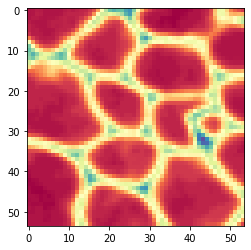

Epoch 171/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2146 - acc: 0.9993 - val_loss: 0.4149 - val_acc: 0.9884

Epoch 00171: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4148985972807494, 'val_acc': 0.9884149621134372, 'loss': 0.21456400926671704, 'acc': 0.9993070191310823, 'lr': 1e-04}


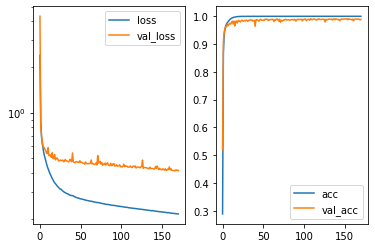

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.54454076]]
True positional value X 0.5
Y [[0.52125597]]
True positional value Y 0.5
H [[0.59842306]]
True positional value H 0.5925925925925926
W [[0.35926202]]
True positional value W 0.3333333333333333


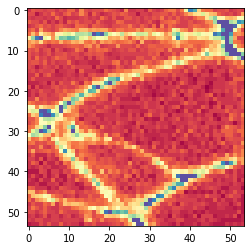

Epoch 172/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2143 - acc: 0.9993 - val_loss: 0.4108 - val_acc: 0.9900

Epoch 00172: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41084507955194083, 'val_acc': 0.9899947425765449, 'loss': 0.2142966828710793, 'acc': 0.9993070191773439, 'lr': 1e-04}


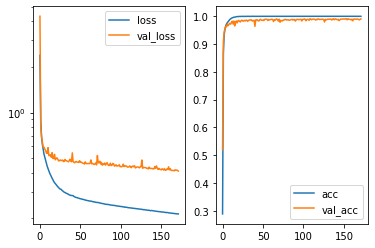

Predicted cell: NonMatureP1 Probability: [[0.99999976]]
True Cell type: NonMatureP1
X [[0.29205817]]
True positional value X 0.3148148148148148
Y [[0.4738562]]
True positional value Y 0.5
H [[0.3470744]]
True positional value H 0.3148148148148148
W [[0.47544193]]
True positional value W 0.4074074074074074


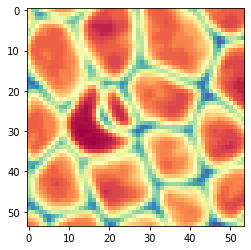

Epoch 173/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2136 - acc: 0.9994 - val_loss: 0.4169 - val_acc: 0.9884

Epoch 00173: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41690700427050836, 'val_acc': 0.9884149652521758, 'loss': 0.21363719649161028, 'acc': 0.9993901768760626, 'lr': 1e-04}


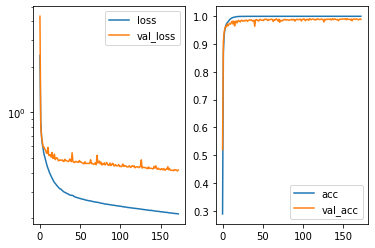

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.722065]]
True positional value X 0.6851851851851852
Y [[0.47822964]]
True positional value Y 0.5
H [[0.45930317]]
True positional value H 0.5
W [[0.81822085]]
True positional value W 0.8703703703703703


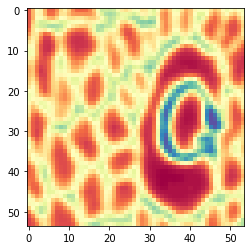

Epoch 174/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2136 - acc: 0.9994 - val_loss: 0.4168 - val_acc: 0.9900

Epoch 00174: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4168368855578577, 'val_acc': 0.9899947425765449, 'loss': 0.21362720705648922, 'acc': 0.9993901768760626, 'lr': 1e-04}


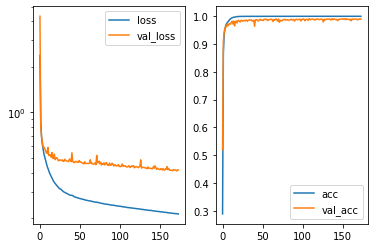

Predicted cell: NonMatureP1 Probability: [[0.9999057]]
True Cell type: NonMatureP1
X [[0.50161004]]
True positional value X 0.5
Y [[0.3110137]]
True positional value Y 0.3148148148148148
H [[0.43015134]]
True positional value H 0.37037037037037035
W [[0.3998909]]
True positional value W 0.4074074074074074


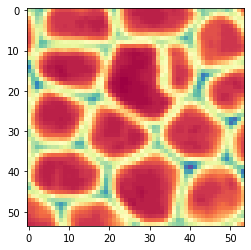

Epoch 175/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2131 - acc: 0.9994 - val_loss: 0.4198 - val_acc: 0.9853

Epoch 00175: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41982579268927067, 'val_acc': 0.9852554043259603, 'loss': 0.21310044574934492, 'acc': 0.9994178961089688, 'lr': 1e-04}


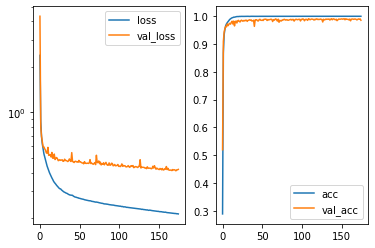

Predicted cell: NonMatureP1 Probability: [[0.99974316]]
True Cell type: NonMatureP1
X [[0.36827198]]
True positional value X 0.3148148148148148
Y [[0.5113169]]
True positional value Y 0.5
H [[0.26804543]]
True positional value H 0.3333333333333333
W [[0.26040402]]
True positional value W 0.2962962962962963


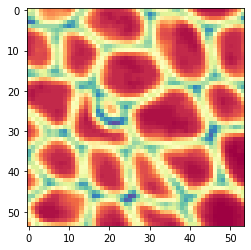

Epoch 176/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2130 - acc: 0.9993 - val_loss: 0.4233 - val_acc: 0.9884

Epoch 00176: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42327894687087614, 'val_acc': 0.9884149621134372, 'loss': 0.21302596352022124, 'acc': 0.9992792999444376, 'lr': 1e-04}


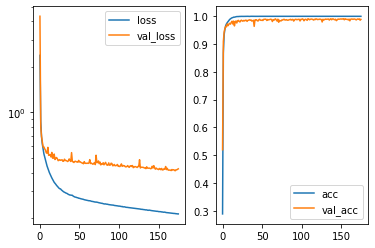

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.500176]]
True positional value X 0.5
Y [[0.72654974]]
True positional value Y 0.6851851851851852
H [[0.29343274]]
True positional value H 0.2777777777777778
W [[0.3474248]]
True positional value W 0.3148148148148148


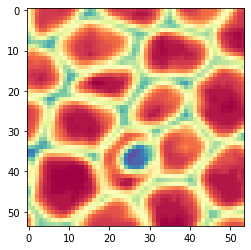

Epoch 177/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2127 - acc: 0.9993 - val_loss: 0.4120 - val_acc: 0.9895

Epoch 00177: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41195421406568633, 'val_acc': 0.9894681501350885, 'loss': 0.2126729675632766, 'acc': 0.9993347384102501, 'lr': 1e-04}


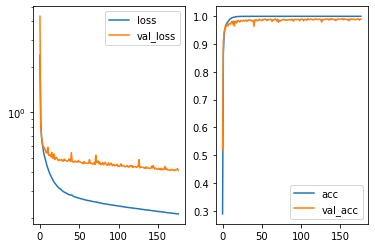

Predicted cell: MacroCheate Probability: [[0.9999858]]
True Cell type: MacroCheate
X [[0.48049197]]
True positional value X 0.5
Y [[0.3294086]]
True positional value Y 0.3148148148148148
H [[0.4253409]]
True positional value H 0.46296296296296297
W [[0.58842015]]
True positional value W 0.5


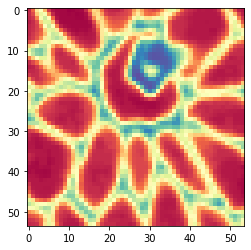

Epoch 178/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2122 - acc: 0.9993 - val_loss: 0.4096 - val_acc: 0.9900

Epoch 00178: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4096182501899876, 'val_acc': 0.9899947425765449, 'loss': 0.2121619005080456, 'acc': 0.9992515807115314, 'lr': 1e-04}


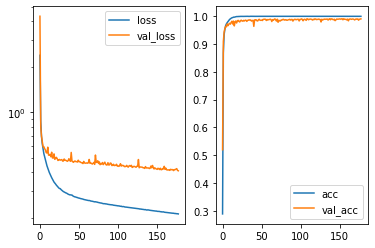

Predicted cell: Normal Probability: [[0.99996805]]
True Cell type: Normal
X [[0.4814384]]
True positional value X 0.5
Y [[0.5575038]]
True positional value Y 0.5
H [[0.41609955]]
True positional value H 0.3148148148148148
W [[0.37510866]]
True positional value W 0.3148148148148148


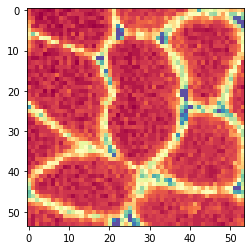

Epoch 179/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2118 - acc: 0.9994 - val_loss: 0.4140 - val_acc: 0.9868

Epoch 00179: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4140374192506028, 'val_acc': 0.9868351816503295, 'loss': 0.21179258575565285, 'acc': 0.9993901768760626, 'lr': 1e-04}


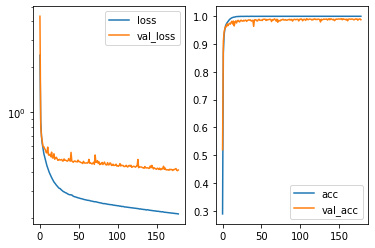

Predicted cell: Normal Probability: [[0.9999858]]
True Cell type: Normal
X [[0.5053839]]
True positional value X 0.5
Y [[0.5117116]]
True positional value Y 0.5
H [[0.44725087]]
True positional value H 0.37037037037037035
W [[0.47724864]]
True positional value W 0.5370370370370371


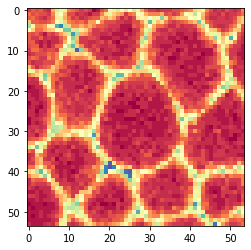

Epoch 180/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2119 - acc: 0.9994 - val_loss: 0.4126 - val_acc: 0.9884

Epoch 00180: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41264849383307484, 'val_acc': 0.9884149621134372, 'loss': 0.21190300600857043, 'acc': 0.9993901768760626, 'lr': 1e-04}


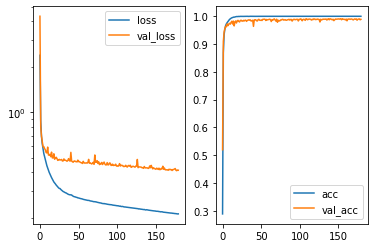

Predicted cell: NonMatureP1 Probability: [[0.9999461]]
True Cell type: NonMatureP1
X [[0.47689724]]
True positional value X 0.5
Y [[0.49339455]]
True positional value Y 0.5
H [[0.30613804]]
True positional value H 0.3333333333333333
W [[0.2951498]]
True positional value W 0.3148148148148148


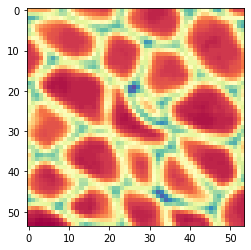

Epoch 181/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2115 - acc: 0.9994 - val_loss: 0.4104 - val_acc: 0.9895

Epoch 00181: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41038556072886456, 'val_acc': 0.98946814699635, 'loss': 0.21154819435033873, 'acc': 0.9993624576431563, 'lr': 1e-04}


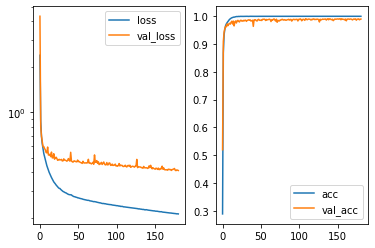

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.47000137]]
True positional value X 0.5
Y [[0.4781244]]
True positional value Y 0.5
H [[0.7103008]]
True positional value H 0.6296296296296297
W [[0.8777195]]
True positional value W 0.9814814814814815


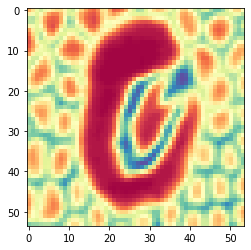

Epoch 182/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2111 - acc: 0.9994 - val_loss: 0.4091 - val_acc: 0.9895

Epoch 00182: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.409139248039799, 'val_acc': 0.9894681501350885, 'loss': 0.21106892459202745, 'acc': 0.9994456153418751, 'lr': 1e-04}


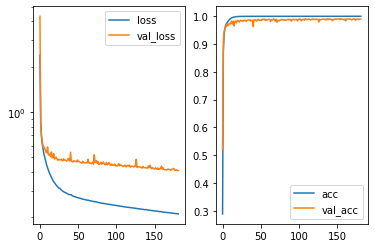

Predicted cell: NonMatureP1 Probability: [[0.9999943]]
True Cell type: NonMatureP1
X [[0.32207784]]
True positional value X 0.3148148148148148
Y [[0.34038657]]
True positional value Y 0.3148148148148148
H [[0.39545086]]
True positional value H 0.42592592592592593
W [[0.421192]]
True positional value W 0.3888888888888889


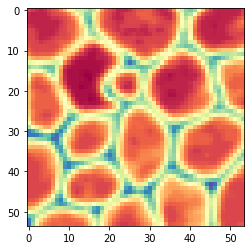

Epoch 183/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2111 - acc: 0.9994 - val_loss: 0.4127 - val_acc: 0.9889

Epoch 00183: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41269389519947586, 'val_acc': 0.9889415535191098, 'loss': 0.2110644541362765, 'acc': 0.9993901768760626, 'lr': 1e-04}


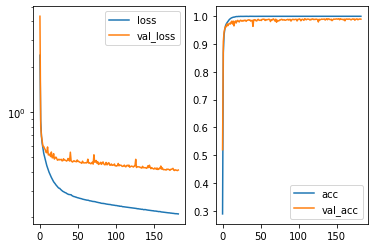

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.50113076]]
True positional value X 0.5
Y [[0.7233702]]
True positional value Y 0.6851851851851852
H [[0.29336345]]
True positional value H 0.2777777777777778
W [[0.35497892]]
True positional value W 0.3148148148148148


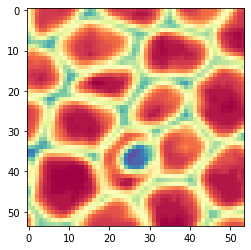

Epoch 184/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2106 - acc: 0.9993 - val_loss: 0.4190 - val_acc: 0.9879

Epoch 00184: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4190346358511685, 'val_acc': 0.9878883717749356, 'loss': 0.2105947886744919, 'acc': 0.9993347384102501, 'lr': 1e-04}


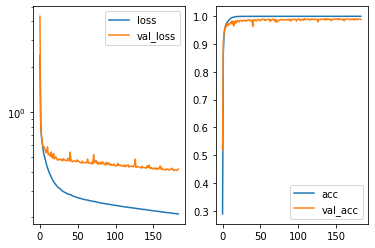

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5256758]]
True positional value X 0.5
Y [[0.32915202]]
True positional value Y 0.3148148148148148
H [[0.648406]]
True positional value H 0.6296296296296297
W [[0.6783307]]
True positional value W 0.6666666666666666


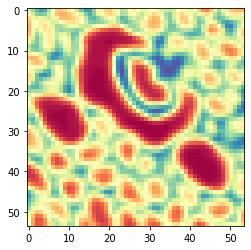

Epoch 185/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2102 - acc: 0.9994 - val_loss: 0.4167 - val_acc: 0.9863

Epoch 00185: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.416653625396379, 'val_acc': 0.9863085923476116, 'loss': 0.21018900910367827, 'acc': 0.9993901768760626, 'lr': 1e-04}


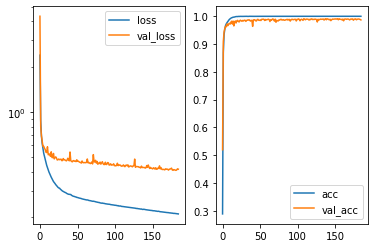

Predicted cell: Normal Probability: [[0.99999845]]
True Cell type: Normal
X [[0.44585276]]
True positional value X 0.5
Y [[0.50930166]]
True positional value Y 0.5
H [[0.3682925]]
True positional value H 0.3333333333333333
W [[0.2935099]]
True positional value W 0.3148148148148148


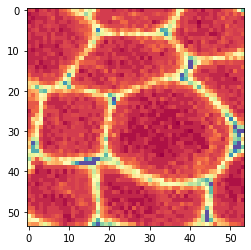

Epoch 186/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2099 - acc: 0.9994 - val_loss: 0.4088 - val_acc: 0.9889

Epoch 00186: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4088128765769354, 'val_acc': 0.9889415576936321, 'loss': 0.20994354764827539, 'acc': 0.9994178961089688, 'lr': 1e-04}


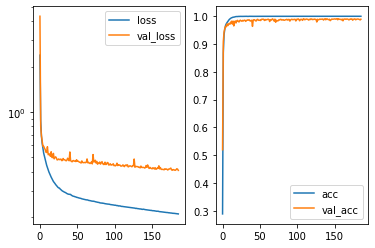

Predicted cell: MacroCheate Probability: [[0.99936825]]
True Cell type: MacroCheate
X [[0.36596915]]
True positional value X 0.3148148148148148
Y [[0.6557385]]
True positional value Y 0.6851851851851852
H [[0.47506413]]
True positional value H 0.4444444444444444
W [[0.47375602]]
True positional value W 0.5185185185185185


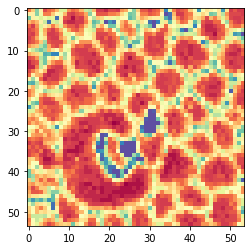

Epoch 187/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2111 - acc: 0.9993 - val_loss: 0.4145 - val_acc: 0.9874

Epoch 00187: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.414476598420226, 'val_acc': 0.9873617793334792, 'loss': 0.21112876847156706, 'acc': 0.9992515807115314, 'lr': 1e-04}


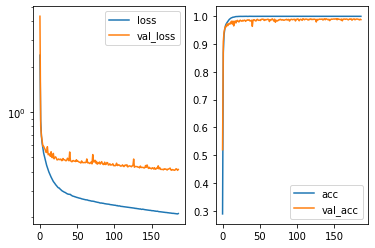

Predicted cell: MatureP1 Probability: [[0.9963186]]
True Cell type: MatureP1
X [[0.5127688]]
True positional value X 0.5
Y [[0.66168565]]
True positional value Y 0.6851851851851852
H [[0.30323118]]
True positional value H 0.18518518518518517
W [[0.20047903]]
True positional value W 0.18518518518518517


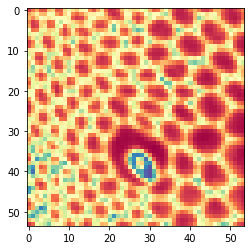

Epoch 188/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2095 - acc: 0.9993 - val_loss: 0.4120 - val_acc: 0.9879

Epoch 00188: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41198891545672867, 'val_acc': 0.9878883728107193, 'loss': 0.20954514759708262, 'acc': 0.9993070191773439, 'lr': 1e-04}


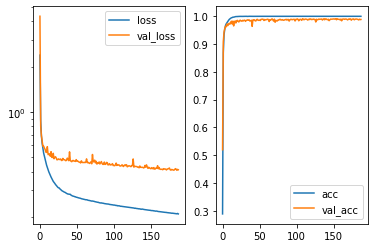

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.33578658]]
True positional value X 0.3148148148148148
Y [[0.5127053]]
True positional value Y 0.5
H [[0.28709877]]
True positional value H 0.3148148148148148
W [[0.3131261]]
True positional value W 0.35185185185185186


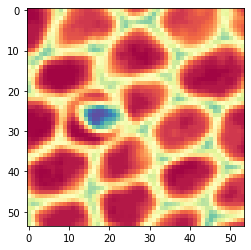

Epoch 189/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2090 - acc: 0.9994 - val_loss: 0.4223 - val_acc: 0.9874

Epoch 00189: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.42234415553506266, 'val_acc': 0.9873617740917858, 'loss': 0.2090489927777193, 'acc': 0.9994178960627074, 'lr': 1e-04}


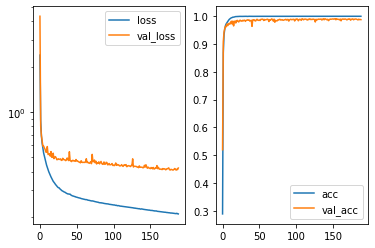

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.5382787]]
True positional value X 0.5
Y [[0.5261296]]
True positional value Y 0.5
H [[0.60707474]]
True positional value H 0.5925925925925926
W [[0.3613848]]
True positional value W 0.3333333333333333


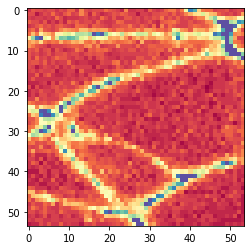

Epoch 190/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2090 - acc: 0.9993 - val_loss: 0.4055 - val_acc: 0.9916

Epoch 00190: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4054805692118554, 'val_acc': 0.991574519900914, 'loss': 0.20897005201674762, 'acc': 0.9992792999444376, 'lr': 1e-04}


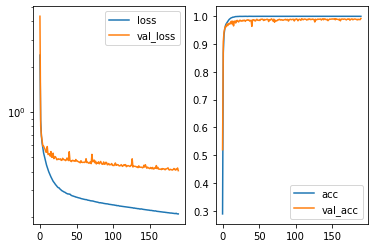

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.49658054]]
True positional value X 0.5
Y [[0.69245684]]
True positional value Y 0.6851851851851852
H [[0.24227545]]
True positional value H 0.2777777777777778
W [[0.22209789]]
True positional value W 0.2222222222222222


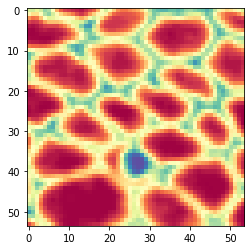

Epoch 191/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2086 - acc: 0.9993 - val_loss: 0.4038 - val_acc: 0.9910

Epoch 00191: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4038279001778085, 'val_acc': 0.9910479274594577, 'loss': 0.20856863335444112, 'acc': 0.9993347384102501, 'lr': 1e-04}


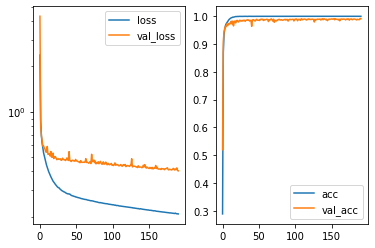

Predicted cell: MatureP1 Probability: [[0.9972108]]
True Cell type: MatureP1
X [[0.30533254]]
True positional value X 0.3148148148148148
Y [[0.33997053]]
True positional value Y 0.3148148148148148
H [[0.39240906]]
True positional value H 0.37037037037037035
W [[0.27372468]]
True positional value W 0.3148148148148148


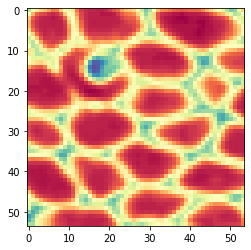

Epoch 192/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2080 - acc: 0.9993 - val_loss: 0.4028 - val_acc: 0.9910

Epoch 00192: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4027858972706375, 'val_acc': 0.9910479274594577, 'loss': 0.20795344559934056, 'acc': 0.9993070191773439, 'lr': 1e-04}


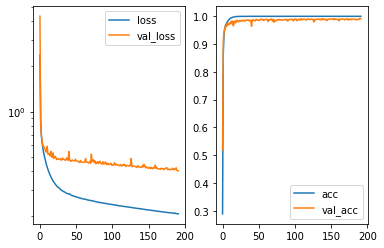

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49879825]]
True positional value X 0.5
Y [[0.56073165]]
True positional value Y 0.5
H [[0.19812839]]
True positional value H 0.18518518518518517
W [[0.25132644]]
True positional value W 0.25925925925925924


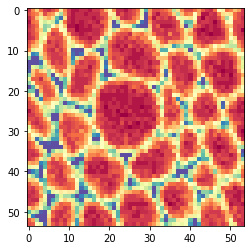

Epoch 193/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2080 - acc: 0.9993 - val_loss: 0.4096 - val_acc: 0.9889

Epoch 00193: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.409645448505031, 'val_acc': 0.9889415545548935, 'loss': 0.20799778777726383, 'acc': 0.9993070191773439, 'lr': 1e-04}


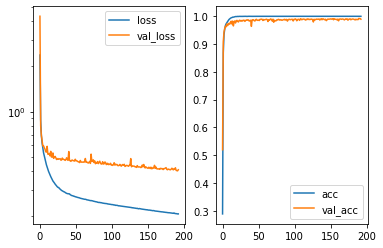

Predicted cell: MatureP1 Probability: [[0.99884063]]
True Cell type: MatureP1
X [[0.7456823]]
True positional value X 0.6851851851851852
Y [[0.3111526]]
True positional value Y 0.3148148148148148
H [[0.35492492]]
True positional value H 0.3888888888888889
W [[0.25423282]]
True positional value W 0.3888888888888889


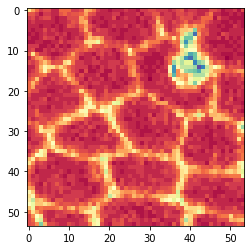

Epoch 194/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2075 - acc: 0.9994 - val_loss: 0.4044 - val_acc: 0.9916

Epoch 00194: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40442642516183375, 'val_acc': 0.991574519900914, 'loss': 0.20747573615567808, 'acc': 0.9994178961089688, 'lr': 1e-04}


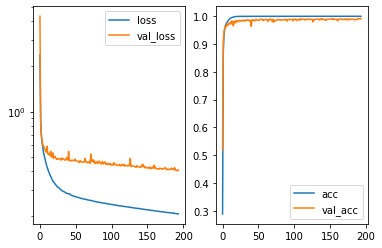

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5517303]]
True positional value X 0.5
Y [[0.37740055]]
True positional value Y 0.3148148148148148
H [[0.4119258]]
True positional value H 0.48148148148148145
W [[0.49853072]]
True positional value W 0.5185185185185185


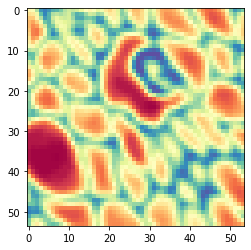

Epoch 195/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2070 - acc: 0.9994 - val_loss: 0.4046 - val_acc: 0.9895

Epoch 00195: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4045774555947041, 'val_acc': 0.9894681501350885, 'loss': 0.20698432353379814, 'acc': 0.9994178961089688, 'lr': 1e-04}


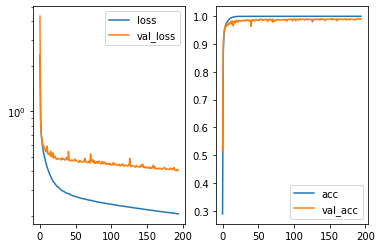

Predicted cell: NonMatureP1 Probability: [[0.9999995]]
True Cell type: NonMatureP1
X [[0.5081146]]
True positional value X 0.5
Y [[0.41803598]]
True positional value Y 0.3148148148148148
H [[0.23678982]]
True positional value H 0.25925925925925924
W [[0.352487]]
True positional value W 0.3333333333333333


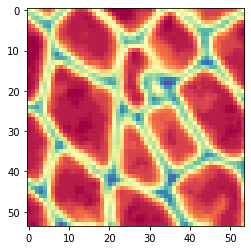

Epoch 196/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2069 - acc: 0.9993 - val_loss: 0.4090 - val_acc: 0.9853

Epoch 00196: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40895398260104526, 'val_acc': 0.9852554043259603, 'loss': 0.20689924846917856, 'acc': 0.9992792999444376, 'lr': 1e-04}


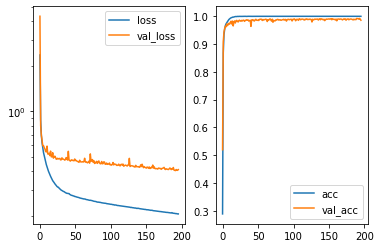

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5150876]]
True positional value X 0.5
Y [[0.3527339]]
True positional value Y 0.3148148148148148
H [[0.6312691]]
True positional value H 0.5
W [[0.68553424]]
True positional value W 0.5


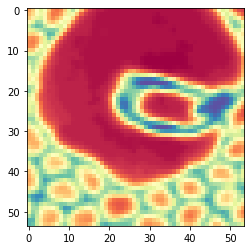

Epoch 197/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2065 - acc: 0.9994 - val_loss: 0.4005 - val_acc: 0.9905

Epoch 00197: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40050806625382784, 'val_acc': 0.9905213350180013, 'loss': 0.2064926738068354, 'acc': 0.9993901768760626, 'lr': 1e-04}


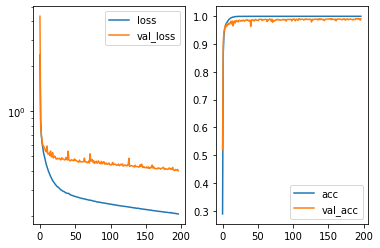

Predicted cell: MatureP1 Probability: [[0.9999708]]
True Cell type: MatureP1
X [[0.49498206]]
True positional value X 0.5
Y [[0.6955184]]
True positional value Y 0.6851851851851862
H [[0.33084983]]
True positional value H 0.3148148148148148
W [[0.24487036]]
True positional value W 0.25925925925925924


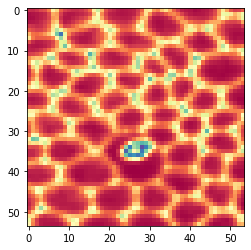

Epoch 198/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2068 - acc: 0.9993 - val_loss: 0.3985 - val_acc: 0.9916

Epoch 00198: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39851861763716123, 'val_acc': 0.991574519900914, 'loss': 0.2068354753554958, 'acc': 0.9992515805463117, 'lr': 1e-04}


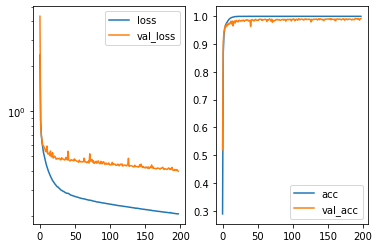

Predicted cell: MacroCheate Probability: [[0.99560285]]
True Cell type: MacroCheate
X [[0.59515756]]
True positional value X 0.6851851851851852
Y [[0.32123667]]
True positional value Y 0.3148148148148148
H [[0.33266786]]
True positional value H 0.2777777777777778
W [[0.33977133]]
True positional value W 0.3148148148148148


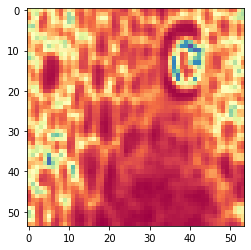

Epoch 199/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2061 - acc: 0.9993 - val_loss: 0.4035 - val_acc: 0.9905

Epoch 00199: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4035118186768888, 'val_acc': 0.9905213350180013, 'loss': 0.20609107350203398, 'acc': 0.9993347384102501, 'lr': 1e-04}


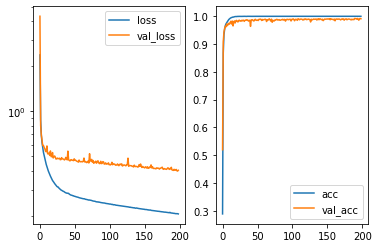

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.7034597]]
True positional value X 0.6851851851851852
Y [[0.6458867]]
True positional value Y 0.6851851851851852
H [[0.24434316]]
True positional value H 0.2962962962962963
W [[0.24269883]]
True positional value W 0.24074074074074073


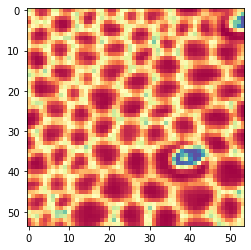

Epoch 200/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2057 - acc: 0.9993 - val_loss: 0.4035 - val_acc: 0.9895

Epoch 00200: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40352694213923934, 'val_acc': 0.9894681501350885, 'loss': 0.20571630210930128, 'acc': 0.9992792999444376, 'lr': 1e-04}


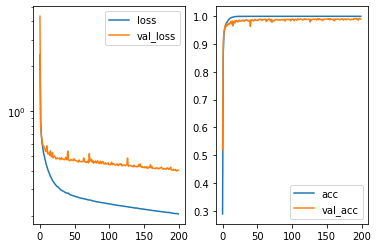

Predicted cell: NonMatureP1 Probability: [[0.9996569]]
True Cell type: NonMatureP1
X [[0.71111846]]
True positional value X 0.6851851851851852
Y [[0.6787218]]
True positional value Y 0.6851851851851852
H [[0.45289692]]
True positional value H 0.46296296296296297
W [[0.4073797]]
True positional value W 0.37037037037037035


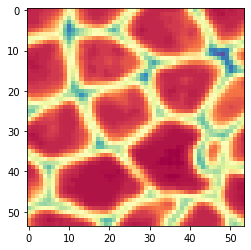

Epoch 201/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.2051 - acc: 0.9994 - val_loss: 0.4036 - val_acc: 0.9895

Epoch 00201: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40357395564022036, 'val_acc': 0.98946814699635, 'loss': 0.20510098610243918, 'acc': 0.9993901768760626, 'lr': 1e-04}


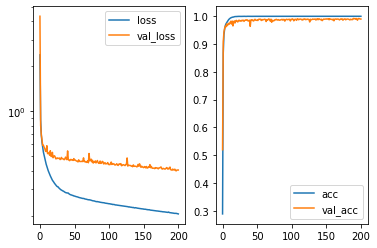

Predicted cell: NonMatureP1 Probability: [[0.9999844]]
True Cell type: NonMatureP1
X [[0.5253395]]
True positional value X 0.5
Y [[0.655629]]
True positional value Y 0.6851851851851852
H [[0.46700495]]
True positional value H 0.4074074074074074
W [[0.38881195]]
True positional value W 0.42592592592592593


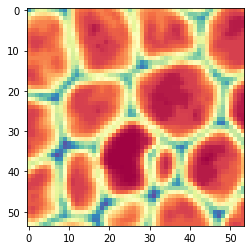

Epoch 202/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2054 - acc: 0.9993 - val_loss: 0.4015 - val_acc: 0.9910

Epoch 00202: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40154451053352214, 'val_acc': 0.9910479274594577, 'loss': 0.2053987978468027, 'acc': 0.9992515807115314, 'lr': 1e-04}


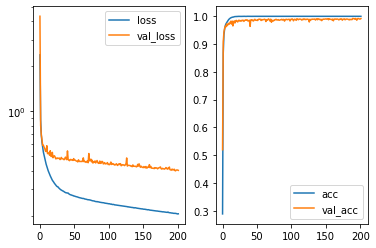

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5042935]]
True positional value X 0.5
Y [[0.4232886]]
True positional value Y 0.5
H [[0.50738895]]
True positional value H 0.46296296296296297
W [[0.8521949]]
True positional value W 0.9814814814814815


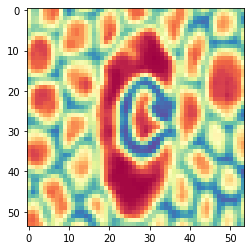

Epoch 203/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2048 - acc: 0.9994 - val_loss: 0.4129 - val_acc: 0.9874

Epoch 00203: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.41287900071950134, 'val_acc': 0.9873617803692629, 'loss': 0.20480222690097508, 'acc': 0.9993624576431563, 'lr': 1e-04}


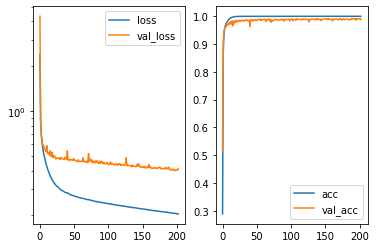

Predicted cell: MatureP1 Probability: [[0.9999993]]
True Cell type: MatureP1
X [[0.6635974]]
True positional value X 0.6851851851851852
Y [[0.29101002]]
True positional value Y 0.3148148148148148
H [[0.21611978]]
True positional value H 0.24074074074074073
W [[0.24416713]]
True positional value W 0.2962962962962963


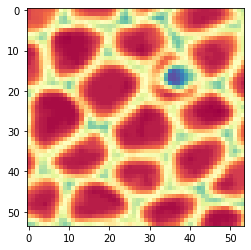

Epoch 204/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2047 - acc: 0.9994 - val_loss: 0.4037 - val_acc: 0.9884

Epoch 00204: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40369444095253504, 'val_acc': 0.9884149652521758, 'loss': 0.20473328768407337, 'acc': 0.9994178961089688, 'lr': 1e-04}


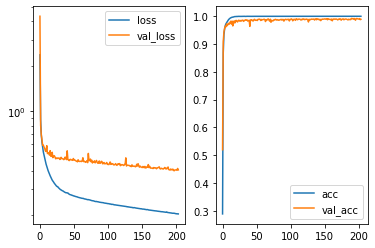

Predicted cell: NonMatureP1 Probability: [[0.80948734]]
True Cell type: Normal
X [[0.49781558]]
True positional value X 0.5
Y [[0.4865567]]
True positional value Y 0.5
H [[0.39157096]]
True positional value H 0.46296296296296297
W [[0.32653797]]
True positional value W 0.3888888888888889


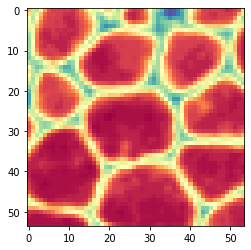

Epoch 205/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2043 - acc: 0.9993 - val_loss: 0.4040 - val_acc: 0.9905

Epoch 00205: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40400197267092924, 'val_acc': 0.9905213318792627, 'loss': 0.20430688695323904, 'acc': 0.9993070191773439, 'lr': 1e-04}


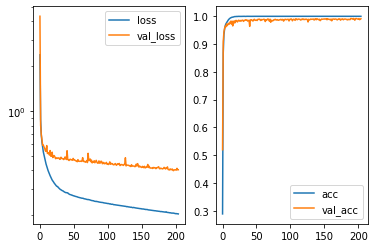

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5245026]]
True positional value X 0.5
Y [[0.48490766]]
True positional value Y 0.5
H [[0.59315985]]
True positional value H 0.5740740740740741
W [[0.3020407]]
True positional value W 0.4074074074074074


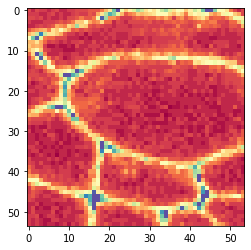

Epoch 206/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2041 - acc: 0.9995 - val_loss: 0.4067 - val_acc: 0.9874

Epoch 00206: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4067086798068785, 'val_acc': 0.9873617761947406, 'loss': 0.20409258079245954, 'acc': 0.9995010538076876, 'lr': 1e-04}


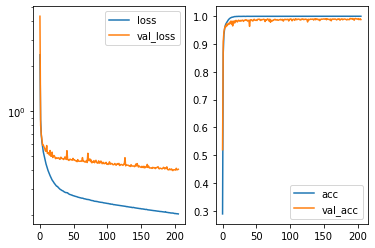

Predicted cell: MatureP1 Probability: [[0.9999994]]
True Cell type: MatureP1
X [[0.67043006]]
True positional value X 0.6851851851851852
Y [[0.3355661]]
True positional value Y 0.3148148148148148
H [[0.33136028]]
True positional value H 0.3333333333333333
W [[0.39452422]]
True positional value W 0.48148148148148145


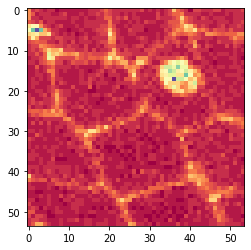

Epoch 207/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2039 - acc: 0.9993 - val_loss: 0.4017 - val_acc: 0.9910

Epoch 00207: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4016518523154477, 'val_acc': 0.9910479274594577, 'loss': 0.2039405202912523, 'acc': 0.9993347384102501, 'lr': 1e-04}


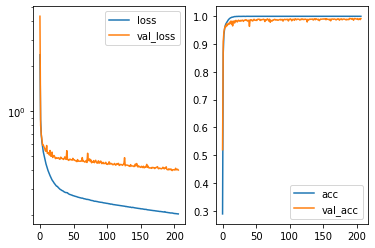

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.66155785]]
True positional value X 0.6851851851851852
Y [[0.2876555]]
True positional value Y 0.3148148148148148
H [[0.21636409]]
True positional value H 0.24074074074074073
W [[0.25219262]]
True positional value W 0.2962962962962963


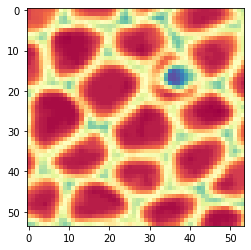

Epoch 208/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2030 - acc: 0.9993 - val_loss: 0.4021 - val_acc: 0.9874

Epoch 00208: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40214043814863515, 'val_acc': 0.9873617803692629, 'loss': 0.20304714887095127, 'acc': 0.9993347384102501, 'lr': 1e-04}


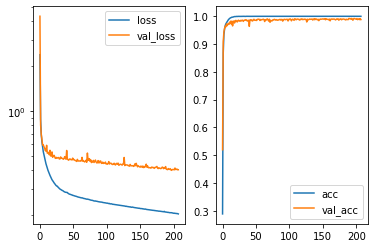

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.51306766]]
True positional value X 0.5
Y [[0.665261]]
True positional value Y 0.6851851851851852
H [[0.4844875]]
True positional value H 0.5185185185185185
W [[0.6379455]]
True positional value W 0.7037037037037037


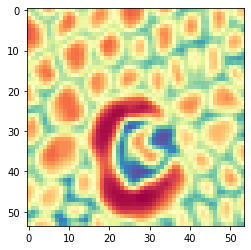

Epoch 209/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2032 - acc: 0.9993 - val_loss: 0.3991 - val_acc: 0.9900

Epoch 00209: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3991221896342819, 'val_acc': 0.9899947425765449, 'loss': 0.20321364593897098, 'acc': 0.9992515806652699, 'lr': 1e-04}


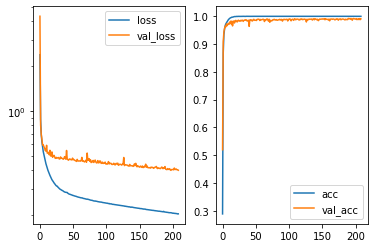

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.51821446]]
True positional value X 0.5
Y [[0.42468262]]
True positional value Y 0.5
H [[0.5148366]]
True positional value H 0.42592592592592593
W [[0.4814088]]
True positional value W 0.3333333333333333


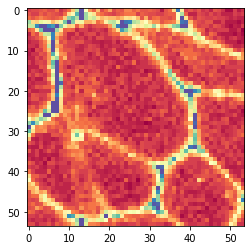

Epoch 210/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2028 - acc: 0.9993 - val_loss: 0.3972 - val_acc: 0.9905

Epoch 00210: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39719698912787277, 'val_acc': 0.9905213350180013, 'loss': 0.20282287846444014, 'acc': 0.9993070191773439, 'lr': 1e-04}


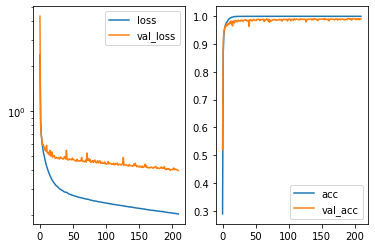

Predicted cell: MacroCheate Probability: [[0.99998987]]
True Cell type: MacroCheate
X [[0.28884542]]
True positional value X 0.3148148148148148
Y [[0.6709462]]
True positional value Y 0.6851851851851852
H [[0.29002836]]
True positional value H 0.3888888888888889
W [[0.3422953]]
True positional value W 0.4074074074074074


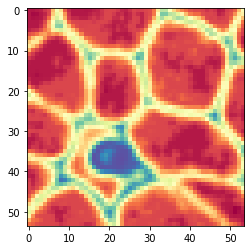

Epoch 211/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2025 - acc: 0.9992 - val_loss: 0.4017 - val_acc: 0.9916

Epoch 00211: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40172167145119897, 'val_acc': 0.991574519900914, 'loss': 0.2024558368487479, 'acc': 0.999196142245719, 'lr': 1e-04}


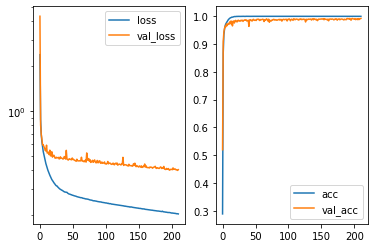

Predicted cell: MatureP1 Probability: [[0.99999833]]
True Cell type: MatureP1
X [[0.29528973]]
True positional value X 0.3148148148148148
Y [[0.2876165]]
True positional value Y 0.3148148148148148
H [[0.29903835]]
True positional value H 0.25925925925925924
W [[0.31398892]]
True positional value W 0.3333333333333333


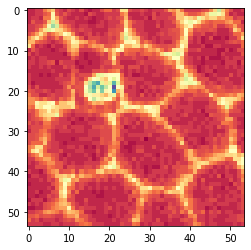

Epoch 212/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2023 - acc: 0.9994 - val_loss: 0.4041 - val_acc: 0.9879

Epoch 00212: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.404103616528162, 'val_acc': 0.9878883728107193, 'loss': 0.2022650720245334, 'acc': 0.9994178961089688, 'lr': 1e-04}


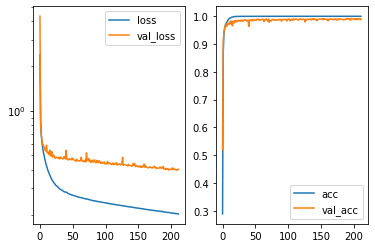

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6743367]]
True positional value X 0.6851851851851852
Y [[0.4836006]]
True positional value Y 0.5
H [[0.49373725]]
True positional value H 0.5
W [[0.85562277]]
True positional value W 0.8148148148148148


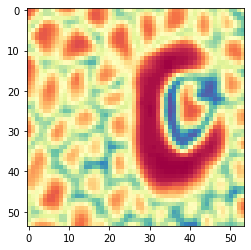

Epoch 213/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.2021 - acc: 0.9993 - val_loss: 0.4079 - val_acc: 0.9889

Epoch 00213: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4078912173308091, 'val_acc': 0.9889415566578484, 'loss': 0.2020669868822068, 'acc': 0.9993347384102501, 'lr': 1e-04}


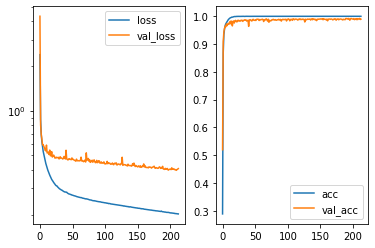

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.67653686]]
True positional value X 0.6851851851851852
Y [[0.33091268]]
True positional value Y 0.3148148148148148
H [[0.4617601]]
True positional value H 0.5
W [[0.8728897]]
True positional value W 0.9074074074074074


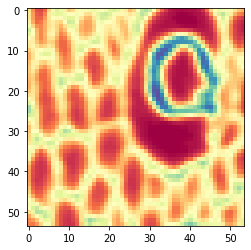

Epoch 214/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2018 - acc: 0.9994 - val_loss: 0.3964 - val_acc: 0.9905

Epoch 00214: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39636386542523644, 'val_acc': 0.9905213350180013, 'loss': 0.20183777482503798, 'acc': 0.9994178961089688, 'lr': 1e-04}


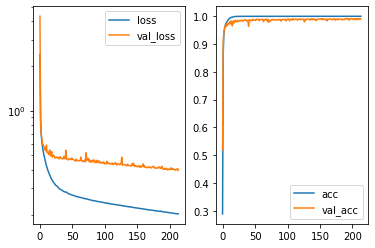

Predicted cell: NonMatureP1 Probability: [[0.9999989]]
True Cell type: NonMatureP1
X [[0.47770548]]
True positional value X 0.5
Y [[0.53562254]]
True positional value Y 0.5
H [[0.3438295]]
True positional value H 0.3888888888888889
W [[0.29022324]]
True positional value W 0.35185185185185186


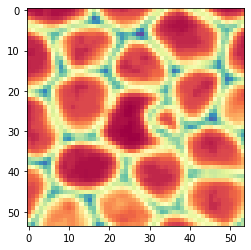

Epoch 215/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2018 - acc: 0.9993 - val_loss: 0.3963 - val_acc: 0.9895

Epoch 00215: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39625039969763676, 'val_acc': 0.9894681501350885, 'loss': 0.20175380752024252, 'acc': 0.9992515807115314, 'lr': 1e-04}


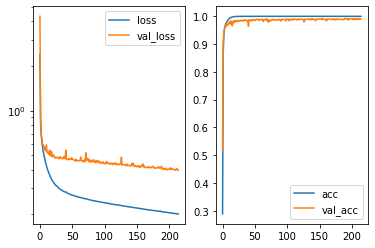

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.49502084]]
True positional value X 0.5
Y [[0.46315902]]
True positional value Y 0.5
H [[0.33766362]]
True positional value H 0.35185185185185186
W [[0.3947428]]
True positional value W 0.42592592592592593


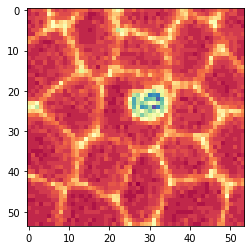

Epoch 216/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2015 - acc: 0.9993 - val_loss: 0.4010 - val_acc: 0.9900

Epoch 00216: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4009579048463079, 'val_acc': 0.9899947425765449, 'loss': 0.20147938402155866, 'acc': 0.9992515807115314, 'lr': 1e-04}


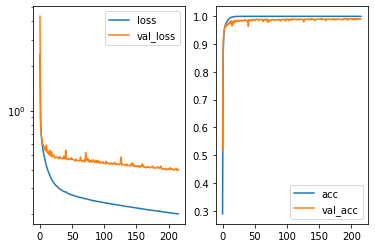

Predicted cell: NonMatureP1 Probability: [[0.999826]]
True Cell type: NonMatureP1
X [[0.51449245]]
True positional value X 0.5
Y [[0.34238568]]
True positional value Y 0.3148148148148148
H [[0.4362296]]
True positional value H 0.42592592592592593
W [[0.3676843]]
True positional value W 0.35185185185185186


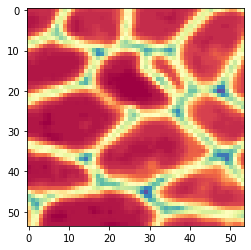

Epoch 217/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.2009 - acc: 0.9993 - val_loss: 0.4359 - val_acc: 0.9768

Epoch 00217: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.4359132016157087, 'val_acc': 0.976829918985181, 'loss': 0.20087320818606574, 'acc': 0.9993347384102501, 'lr': 1e-04}


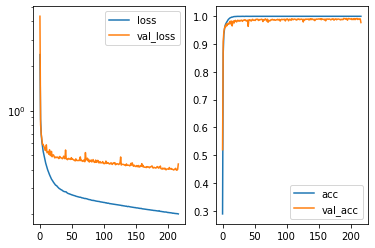

Predicted cell: Normal Probability: [[0.99999917]]
True Cell type: Normal
X [[0.48966813]]
True positional value X 0.5
Y [[0.4523566]]
True positional value Y 0.5
H [[0.31263745]]
True positional value H 0.37037037037037035
W [[0.33017975]]
True positional value W 0.37037037037037035


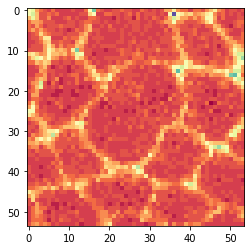

Epoch 218/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.2006 - acc: 0.9994 - val_loss: 0.3992 - val_acc: 0.9884

Epoch 00218: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3991758822923965, 'val_acc': 0.9884149652521758, 'loss': 0.20059399636552583, 'acc': 0.9994456153418751, 'lr': 1e-04}


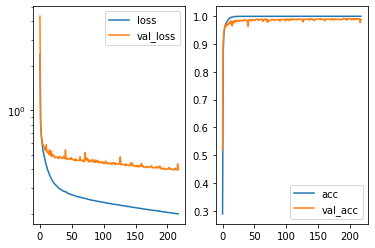

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.69847494]]
True positional value X 0.6851851851851852
Y [[0.30296397]]
True positional value Y 0.3148148148148148
H [[0.3471102]]
True positional value H 0.3148148148148148
W [[0.29754326]]
True positional value W 0.25925925925925924


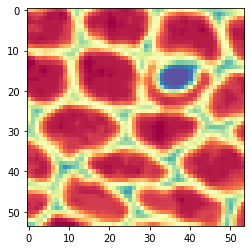

Epoch 219/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.2005 - acc: 0.9992 - val_loss: 0.3986 - val_acc: 0.9874

Epoch 00219: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39857294552887407, 'val_acc': 0.9873617772305244, 'loss': 0.200476306130318, 'acc': 0.9991684230128126, 'lr': 1e-04}


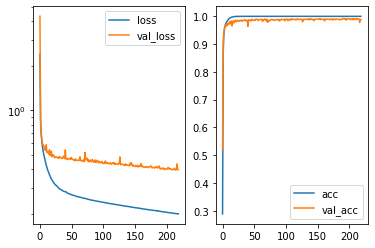

Predicted cell: Normal Probability: [[0.99130625]]
True Cell type: Normal
X [[0.48416993]]
True positional value X 0.5
Y [[0.6238848]]
True positional value Y 0.5
H [[0.22303456]]
True positional value H 0.25925925925925924
W [[0.26801187]]
True positional value W 0.2777777777777778


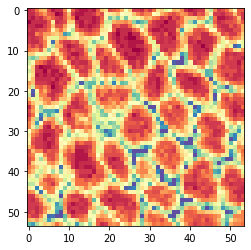

Epoch 220/250
36076/36076 [==============================] - 16s 453us/step - loss: 0.2002 - acc: 0.9994 - val_loss: 0.3948 - val_acc: 0.9910

Epoch 00220: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39484874752711596, 'val_acc': 0.9910479274594577, 'loss': 0.20020391115401825, 'acc': 0.9993901768760626, 'lr': 1e-04}


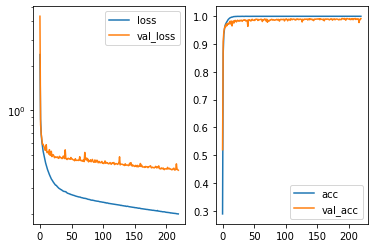

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.51311433]]
True positional value X 0.5
Y [[0.48194176]]
True positional value Y 0.5
H [[0.24019322]]
True positional value H 0.3148148148148148
W [[0.38037163]]
True positional value W 0.3333333333333333


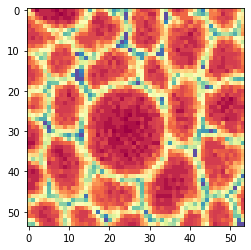

Epoch 221/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.1997 - acc: 0.9994 - val_loss: 0.3940 - val_acc: 0.9910

Epoch 00221: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39401128148957265, 'val_acc': 0.9910479274594577, 'loss': 0.19970815539465786, 'acc': 0.9993901768760626, 'lr': 1e-04}


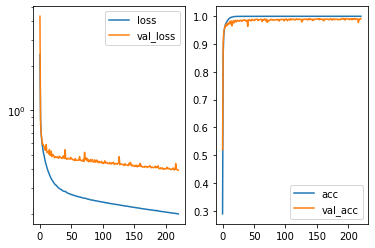

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5326195]]
True positional value X 0.5
Y [[0.51934683]]
True positional value Y 0.5
H [[0.34831387]]
True positional value H 0.3333333333333333
W [[0.45633167]]
True positional value W 0.7222222222222222


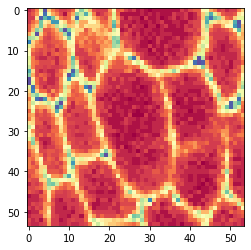

Epoch 222/250
36076/36076 [==============================] - 16s 455us/step - loss: 0.1995 - acc: 0.9993 - val_loss: 0.4028 - val_acc: 0.9895

Epoch 00222: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.40279749677707294, 'val_acc': 0.98946814699635, 'loss': 0.19948468653646062, 'acc': 0.9993347384102501, 'lr': 1e-04}


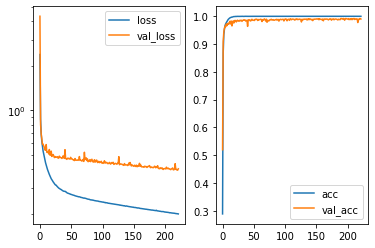

Predicted cell: MacroCheate Probability: [[0.9997098]]
True Cell type: MacroCheate
X [[0.31258565]]
True positional value X 0.3148148148148148
Y [[0.5243466]]
True positional value Y 0.5
H [[0.5054305]]
True positional value H 0.5185185185185185
W [[0.8282435]]
True positional value W 0.8703703703703703


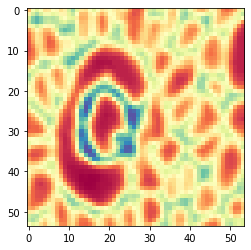

Epoch 223/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.1992 - acc: 0.9993 - val_loss: 0.3966 - val_acc: 0.9905

Epoch 00223: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39661273864019914, 'val_acc': 0.9905213350180013, 'loss': 0.1992012040520444, 'acc': 0.9993347384102501, 'lr': 1e-04}


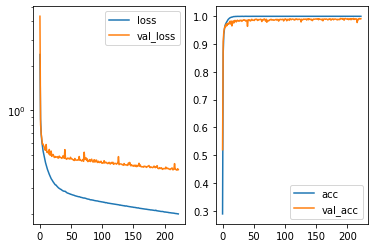

Predicted cell: MatureP1 Probability: [[0.999998]]
True Cell type: MatureP1
X [[0.7068689]]
True positional value X 0.6851851851851852
Y [[0.47715953]]
True positional value Y 0.5
H [[0.34863248]]
True positional value H 0.35185185185185186
W [[0.3004157]]
True positional value W 0.3148148148148148


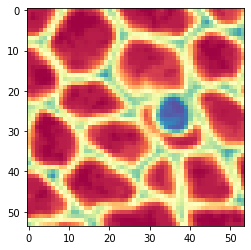

Epoch 224/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.1989 - acc: 0.9993 - val_loss: 0.3948 - val_acc: 0.9905

Epoch 00224: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3948107156049207, 'val_acc': 0.9905213350180013, 'loss': 0.19893079201072003, 'acc': 0.9993070191773439, 'lr': 1e-04}


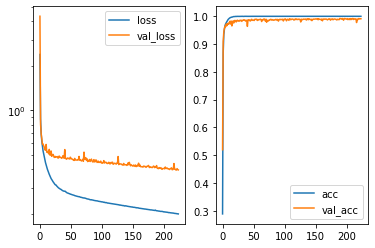

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.5032219]]
True positional value X 0.5
Y [[0.50834227]]
True positional value Y 0.5
H [[0.33930677]]
True positional value H 0.4444444444444444
W [[0.27756244]]
True positional value W 0.35185185185185186


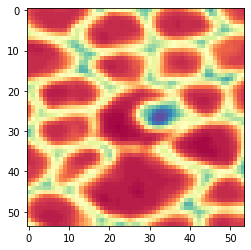

Epoch 225/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1987 - acc: 0.9994 - val_loss: 0.3985 - val_acc: 0.9868

Epoch 00225: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3985031663649581, 'val_acc': 0.9868351879278066, 'loss': 0.19870205474363778, 'acc': 0.9993901768760626, 'lr': 1e-04}


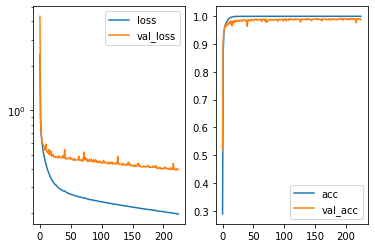

Predicted cell: NonMatureP1 Probability: [[0.99999535]]
True Cell type: NonMatureP1
X [[0.6335965]]
True positional value X 0.6851851851851852
Y [[0.38681144]]
True positional value Y 0.3148148148148148
H [[0.45646906]]
True positional value H 0.5185185185185185
W [[0.35263324]]
True positional value W 0.4444444444444444


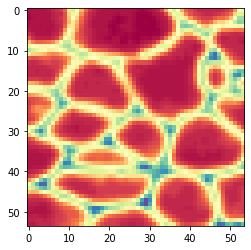

Epoch 226/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1988 - acc: 0.9994 - val_loss: 0.3956 - val_acc: 0.9900

Epoch 00226: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3955639190834532, 'val_acc': 0.9899947425765449, 'loss': 0.1988403647311948, 'acc': 0.9993624576431563, 'lr': 1e-04}


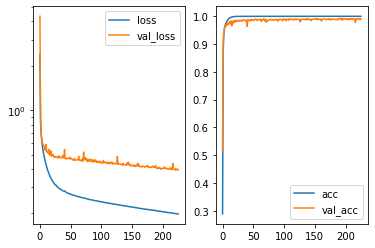

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.665521]]
True positional value X 0.6851851851851852
Y [[0.65401417]]
True positional value Y 0.6851851851851852
H [[0.5978502]]
True positional value H 0.6296296296296297
W [[0.5172924]]
True positional value W 0.5555555555555556


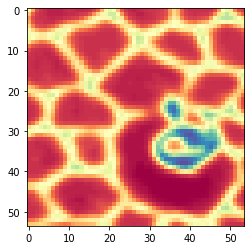

Epoch 227/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.1981 - acc: 0.9994 - val_loss: 0.3946 - val_acc: 0.9900

Epoch 00227: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3945650075409775, 'val_acc': 0.9899947425765449, 'loss': 0.19812011794255385, 'acc': 0.9993624576431563, 'lr': 1e-04}


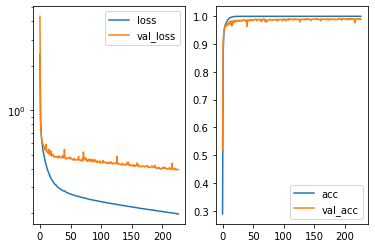

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.66595286]]
True positional value X 0.6851851851851852
Y [[0.7020037]]
True positional value Y 0.6851851851851852
H [[0.50672066]]
True positional value H 0.5370370370370371
W [[0.5723079]]
True positional value W 0.5370370370370371


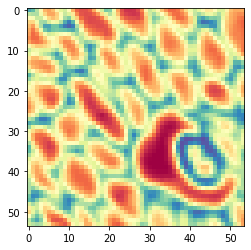

Epoch 228/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1978 - acc: 0.9992 - val_loss: 0.3988 - val_acc: 0.9905

Epoch 00228: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39883493807455184, 'val_acc': 0.9905213318792627, 'loss': 0.19779877795693562, 'acc': 0.999196142245719, 'lr': 1e-04}


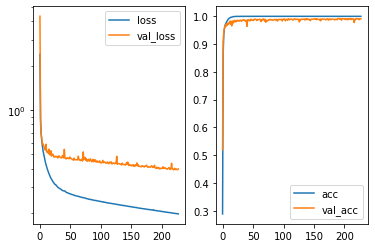

Predicted cell: MacroCheate Probability: [[0.99999475]]
True Cell type: MacroCheate
X [[0.62692094]]
True positional value X 0.6851851851851852
Y [[0.50482184]]
True positional value Y 0.5
H [[0.4226153]]
True positional value H 0.3888888888888889
W [[0.4748147]]
True positional value W 0.46296296296296297


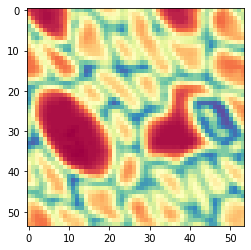

Epoch 229/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1974 - acc: 0.9992 - val_loss: 0.3986 - val_acc: 0.9905

Epoch 00229: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39856949307342276, 'val_acc': 0.9905213318792627, 'loss': 0.19735129881901756, 'acc': 0.9992238614786252, 'lr': 1e-04}


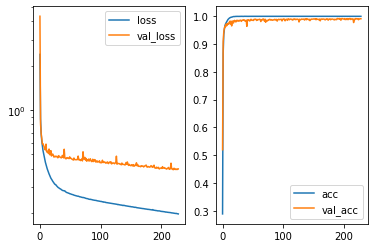

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.6836525]]
True positional value X 0.6851851851851852
Y [[0.7165891]]
True positional value Y 0.6851851851851852
H [[0.4693537]]
True positional value H 0.46296296296296297
W [[0.73673344]]
True positional value W 0.7592592592592593


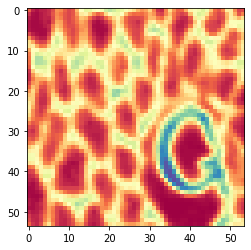

Epoch 230/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1971 - acc: 0.9993 - val_loss: 0.3920 - val_acc: 0.9910

Epoch 00230: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39195608869861964, 'val_acc': 0.9910479274594577, 'loss': 0.1971193087601268, 'acc': 0.9993347384102501, 'lr': 1e-04}


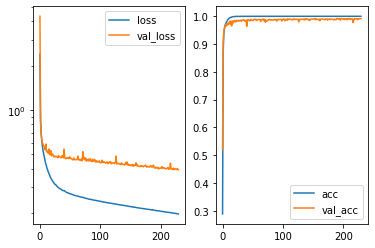

Predicted cell: MacroCheate Probability: [[0.99906474]]
True Cell type: MacroCheate
X [[0.35103303]]
True positional value X 0.3148148148148148
Y [[0.5616527]]
True positional value Y 0.5
H [[0.39077967]]
True positional value H 0.37037037037037035
W [[0.47424024]]
True positional value W 0.48148148148148145


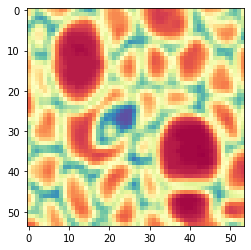

Epoch 231/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1969 - acc: 0.9993 - val_loss: 0.3898 - val_acc: 0.9910

Epoch 00231: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3897514276249651, 'val_acc': 0.9910479274594577, 'loss': 0.19691645338419259, 'acc': 0.9992515807115314, 'lr': 1e-04}


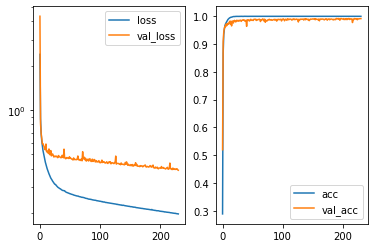

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.29640698]]
True positional value X 0.3148148148148148
Y [[0.32861018]]
True positional value Y 0.3148148148148148
H [[0.5256402]]
True positional value H 0.5370370370370371
W [[0.56337094]]
True positional value W 0.5185185185185185


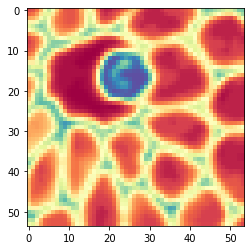

Epoch 232/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.1966 - acc: 0.9993 - val_loss: 0.3906 - val_acc: 0.9900

Epoch 00232: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3906175260828821, 'val_acc': 0.9899947425765449, 'loss': 0.1965654280517064, 'acc': 0.9992515807115314, 'lr': 1e-04}


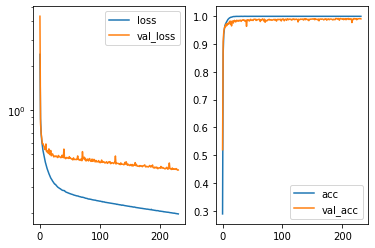

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.31816855]]
True positional value X 0.3148148148148148
Y [[0.7015656]]
True positional value Y 0.6851851851851852
H [[0.45544618]]
True positional value H 0.5185185185185185
W [[0.73848593]]
True positional value W 0.7962962962962963


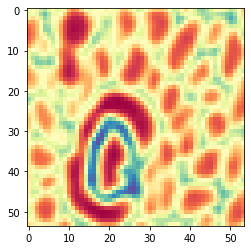

Epoch 233/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.1966 - acc: 0.9993 - val_loss: 0.3914 - val_acc: 0.9900

Epoch 00233: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3914223891644179, 'val_acc': 0.9899947394378064, 'loss': 0.19657800287877342, 'acc': 0.9992792999444376, 'lr': 1e-04}


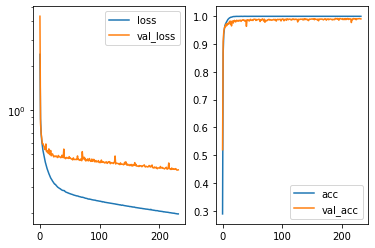

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.3941455]]
True positional value X 0.3148148148148148
Y [[0.33404782]]
True positional value Y 0.3148148148148148
H [[0.45017767]]
True positional value H 0.46296296296296297
W [[0.4646689]]
True positional value W 0.4074074074074074


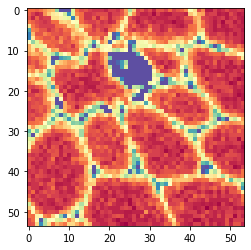

Epoch 234/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.1960 - acc: 0.9993 - val_loss: 0.3969 - val_acc: 0.9900

Epoch 00234: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3968769683060739, 'val_acc': 0.9899947425765449, 'loss': 0.1960157776555646, 'acc': 0.9992792999444376, 'lr': 1e-04}


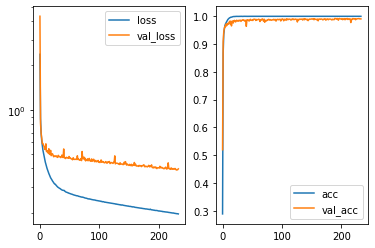

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.47909373]]
True positional value X 0.5
Y [[0.5287687]]
True positional value Y 0.5
H [[0.22940566]]
True positional value H 0.37037037037037035
W [[0.2521175]]
True positional value W 0.2777777777777778


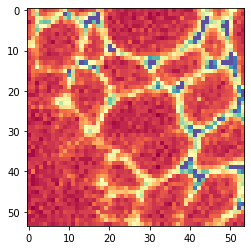

Epoch 235/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.1962 - acc: 0.9993 - val_loss: 0.3999 - val_acc: 0.9884

Epoch 00235: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39988743017509526, 'val_acc': 0.9884149652521758, 'loss': 0.19618567927791217, 'acc': 0.9993070191773439, 'lr': 1e-04}


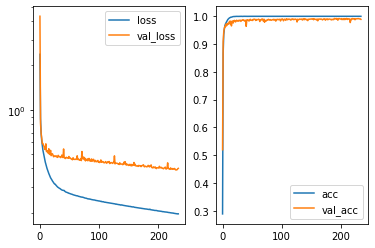

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.50676763]]
True positional value X 0.5
Y [[0.4783203]]
True positional value Y 0.5
H [[0.35784528]]
True positional value H 0.4444444444444444
W [[0.50923294]]
True positional value W 0.6481481481481481


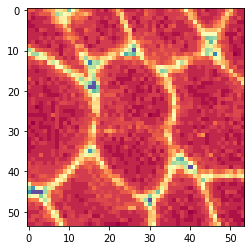

Epoch 236/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1956 - acc: 0.9993 - val_loss: 0.3913 - val_acc: 0.9900

Epoch 00236: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3913037724530088, 'val_acc': 0.9899947425765449, 'loss': 0.19558917648684676, 'acc': 0.9992515807115314, 'lr': 1e-04}


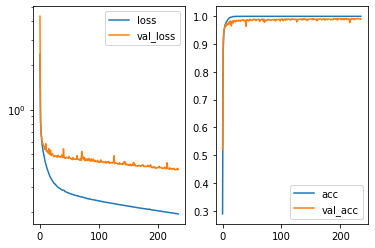

Predicted cell: MatureP1 Probability: [[0.9999994]]
True Cell type: MatureP1
X [[0.5172078]]
True positional value X 0.5
Y [[0.69231343]]
True positional value Y 0.6851851851851852
H [[0.32415795]]
True positional value H 0.2962962962962963
W [[0.27847612]]
True positional value W 0.2962962962962963


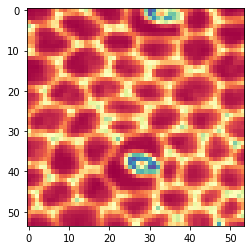

Epoch 237/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.1953 - acc: 0.9993 - val_loss: 0.3894 - val_acc: 0.9895

Epoch 00237: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.38937610943358847, 'val_acc': 0.98946814699635, 'loss': 0.19530736934796367, 'acc': 0.9993347384102501, 'lr': 1e-04}


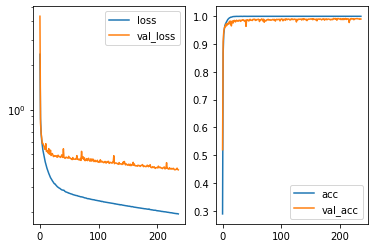

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.51319486]]
True positional value X 0.5
Y [[0.69296896]]
True positional value Y 0.6851851851851852
H [[0.33824328]]
True positional value H 0.2962962962962963
W [[0.2863896]]
True positional value W 0.2962962962962963


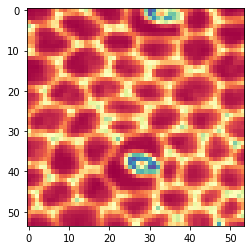

Epoch 238/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.1952 - acc: 0.9995 - val_loss: 0.3915 - val_acc: 0.9905

Epoch 00238: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3915007145483912, 'val_acc': 0.9905213318792627, 'loss': 0.19519777160312612, 'acc': 0.9995287730405938, 'lr': 1e-04}


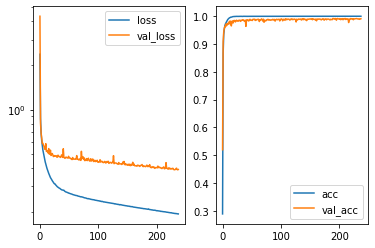

Predicted cell: Normal Probability: [[0.9999981]]
True Cell type: Normal
X [[0.5735459]]
True positional value X 0.5
Y [[0.48719397]]
True positional value Y 0.5
H [[0.39807475]]
True positional value H 0.24074074074074073
W [[0.48911875]]
True positional value W 0.48148148148148145


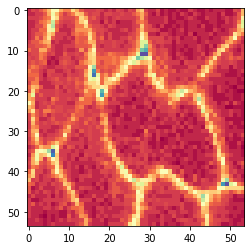

Epoch 239/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.1951 - acc: 0.9994 - val_loss: 0.3963 - val_acc: 0.9879

Epoch 00239: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3962725206793704, 'val_acc': 0.9878883717749356, 'loss': 0.19513859142913748, 'acc': 0.9994456153418751, 'lr': 1e-04}


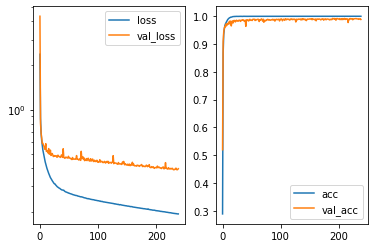

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.5277747]]
True positional value X 0.5
Y [[0.27204177]]
True positional value Y 0.3148148148148148
H [[0.28952304]]
True positional value H 0.3148148148148148
W [[0.29466614]]
True positional value W 0.37037037037037035


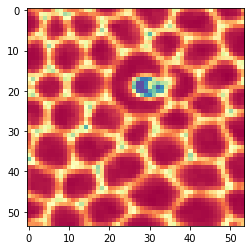

Epoch 240/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.1949 - acc: 0.9993 - val_loss: 0.3975 - val_acc: 0.9889

Epoch 00240: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39750779795609004, 'val_acc': 0.9889415576936321, 'loss': 0.19493898982146005, 'acc': 0.9993347384102501, 'lr': 1e-04}


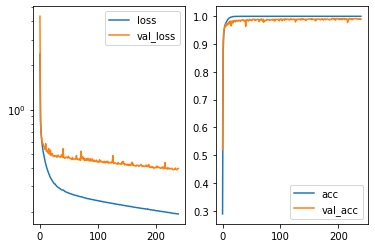

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6798452]]
True positional value X 0.6851851851851852
Y [[0.68706053]]
True positional value Y 0.6851851851851852
H [[0.5026183]]
True positional value H 0.5555555555555556
W [[0.40692765]]
True positional value W 0.42592592592592593


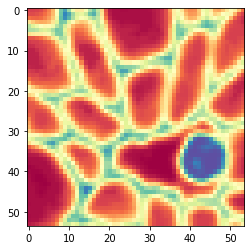

Epoch 241/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.1943 - acc: 0.9994 - val_loss: 0.3896 - val_acc: 0.9900

Epoch 00241: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3896237727747019, 'val_acc': 0.9899947425765449, 'loss': 0.1942951480255699, 'acc': 0.9994178961089688, 'lr': 1e-04}


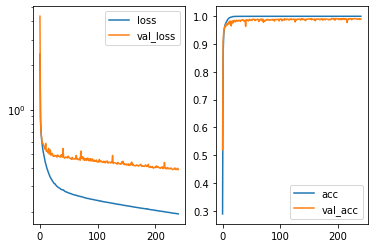

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.5359965]]
True positional value X 0.5
Y [[0.46262348]]
True positional value Y 0.5
H [[0.4124528]]
True positional value H 0.2962962962962963
W [[0.3625903]]
True positional value W 0.25925925925925924


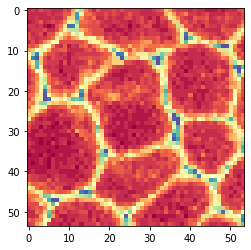

Epoch 242/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.1939 - acc: 0.9994 - val_loss: 0.3875 - val_acc: 0.9905

Epoch 00242: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3874944164415232, 'val_acc': 0.9905213339822175, 'loss': 0.19388424123763667, 'acc': 0.9994178961089688, 'lr': 1e-04}


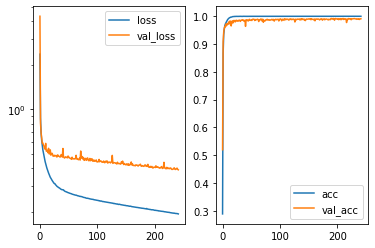

Predicted cell: NonMatureP1 Probability: [[0.9999995]]
True Cell type: NonMatureP1
X [[0.6822289]]
True positional value X 0.6851851851851852
Y [[0.48694515]]
True positional value Y 0.5
H [[0.33560127]]
True positional value H 0.4444444444444444
W [[0.26499438]]
True positional value W 0.3333333333333333


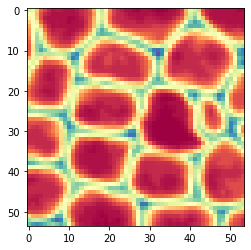

Epoch 243/250
36076/36076 [==============================] - 17s 459us/step - loss: 0.1936 - acc: 0.9993 - val_loss: 0.3895 - val_acc: 0.9905

Epoch 00243: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3894870001244005, 'val_acc': 0.9905213350180013, 'loss': 0.19357939297131999, 'acc': 0.9992792999444376, 'lr': 1e-04}


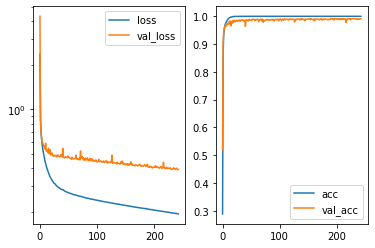

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30356848]]
True positional value X 0.3148148148148148
Y [[0.32366863]]
True positional value Y 0.3148148148148148
H [[0.5150124]]
True positional value H 0.46296296296296297
W [[0.48051155]]
True positional value W 0.42592592592592593


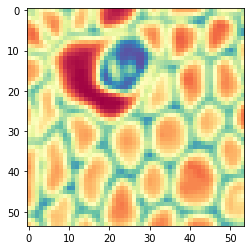

Epoch 244/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1932 - acc: 0.9994 - val_loss: 0.4000 - val_acc: 0.9863

Epoch 00244: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.399957283805583, 'val_acc': 0.9863085954863502, 'loss': 0.19322685656955704, 'acc': 0.9994456153418751, 'lr': 1e-04}


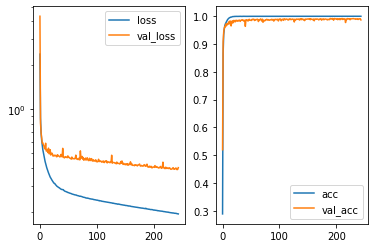

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7398892]]
True positional value X 0.6851851851851852
Y [[0.6897762]]
True positional value Y 0.6851851851851852
H [[0.46279982]]
True positional value H 0.46296296296296297
W [[0.4136764]]
True positional value W 0.3888888888888889


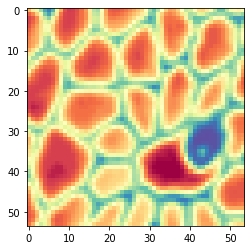

Epoch 245/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.1932 - acc: 0.9994 - val_loss: 0.3887 - val_acc: 0.9900

Epoch 00245: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3886940246384165, 'val_acc': 0.9899947425765449, 'loss': 0.1932121487946716, 'acc': 0.9993624576431563, 'lr': 1e-04}


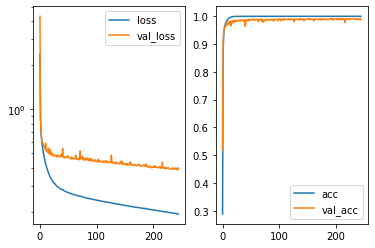

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.51161975]]
True positional value X 0.5
Y [[0.5125098]]
True positional value Y 0.5
H [[0.29806143]]
True positional value H 0.24074074074074073
W [[0.2941553]]
True positional value W 0.3148148148148148


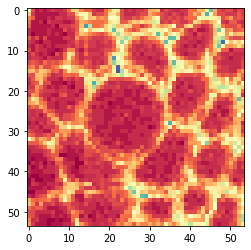

Epoch 246/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.1930 - acc: 0.9995 - val_loss: 0.3914 - val_acc: 0.9900

Epoch 00246: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39139324048433005, 'val_acc': 0.9899947425765449, 'loss': 0.19298072135003025, 'acc': 0.9994733345747814, 'lr': 1e-04}


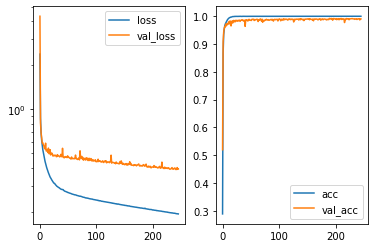

Predicted cell: Normal Probability: [[0.9999937]]
True Cell type: Normal
X [[0.49307764]]
True positional value X 0.5
Y [[0.5358742]]
True positional value Y 0.5
H [[0.28412914]]
True positional value H 0.2222222222222222
W [[0.17750382]]
True positional value W 0.25925925925925924


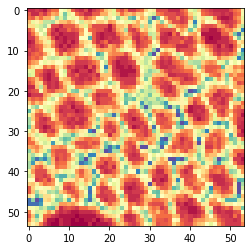

Epoch 247/250
36076/36076 [==============================] - 17s 457us/step - loss: 0.1929 - acc: 0.9993 - val_loss: 0.3862 - val_acc: 0.9900

Epoch 00247: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3861870851844408, 'val_acc': 0.9899947425765449, 'loss': 0.19292579428698114, 'acc': 0.9992792999444376, 'lr': 1e-04}


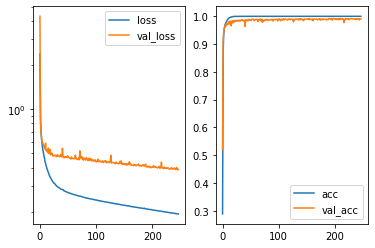

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.67501736]]
True positional value X 0.6851851851851852
Y [[0.65222]]
True positional value Y 0.6851851851851852
H [[0.45917958]]
True positional value H 0.42592592592592593
W [[0.3934622]]
True positional value W 0.3333333333333333


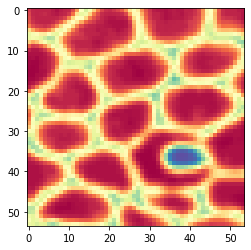

Epoch 248/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.1923 - acc: 0.9993 - val_loss: 0.3854 - val_acc: 0.9916

Epoch 00248: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.38539289222886025, 'val_acc': 0.991574519900914, 'loss': 0.19225159986166643, 'acc': 0.9993070191773439, 'lr': 1e-04}


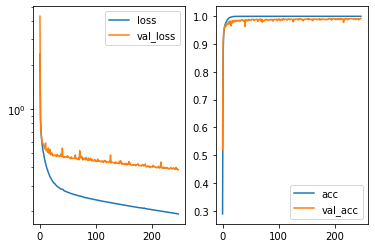

Predicted cell: Normal Probability: [[0.999998]]
True Cell type: Normal
X [[0.49442643]]
True positional value X 0.5
Y [[0.52230567]]
True positional value Y 0.5
H [[0.23250808]]
True positional value H 0.2962962962962963
W [[0.31837514]]
True positional value W 0.2222222222222222


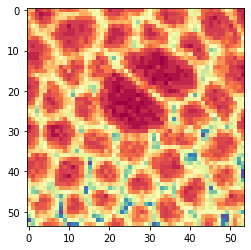

Epoch 249/250
36076/36076 [==============================] - 16s 457us/step - loss: 0.1922 - acc: 0.9994 - val_loss: 0.3903 - val_acc: 0.9895

Epoch 00249: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.39031306281097317, 'val_acc': 0.9894681501350885, 'loss': 0.19221039182635682, 'acc': 0.9993901768760626, 'lr': 1e-04}


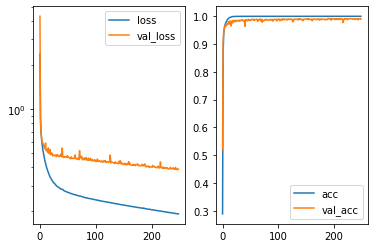

Predicted cell: MacroCheate Probability: [[0.99928075]]
True Cell type: MacroCheate
X [[0.3659943]]
True positional value X 0.3148148148148148
Y [[0.36123562]]
True positional value Y 0.3148148148148148
H [[0.23771197]]
True positional value H 0.18518518518518517
W [[0.24207637]]
True positional value W 0.18518518518518517


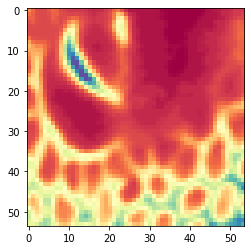

Epoch 250/250
36076/36076 [==============================] - 16s 456us/step - loss: 0.1916 - acc: 0.9994 - val_loss: 0.3888 - val_acc: 0.9900

Epoch 00250: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.38876690084272586, 'val_acc': 0.9899947425765449, 'loss': 0.19163741397215292, 'acc': 0.9994456153418751, 'lr': 1e-04}


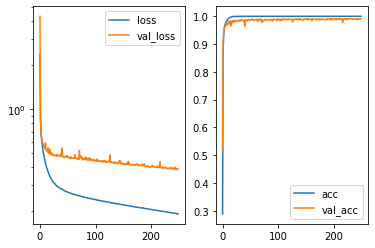

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.69691724]]
True positional value X 0.6851851851851852
Y [[0.6864932]]
True positional value Y 0.6851851851851852
H [[0.3814317]]
True positional value H 0.37037037037037035
W [[0.32741493]]
True positional value W 0.35185185185185186


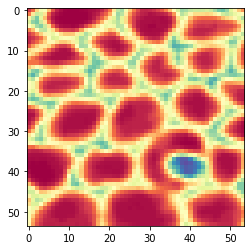

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
